In [1]:
import sys
AUX_PATH =r'D:\OneDrive - Open University of Israel\Machine learning\Kaggle'
sys.path.append(AUX_PATH)

In [2]:
from work.stem_extraction import stem_extract
import pandas as pd
train_path = r'D:\Clarifruit\cherry_stem\data\unet_data\training\2019-10-07_20-12-39\thres_0.4\train'
hist_type='hsv'
train_df= stem_extract.load_data(train_path,hist_type)
train_df.head()

,file_name,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,label
0,81034-64764.png,0.026855,0.014217,0.012637,0.007109,0.026855,0.027645,0.045811,0.054499,0.089252,...,0.001693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001693,D
1,74772-14060.png,0.011012,0.002202,0.000000,0.002202,0.003304,0.001101,0.004405,0.001101,0.005506,...,0.064955,0.074948,0.078280,0.087440,0.115754,0.126580,0.181542,0.223180,0.918535,A
2,75998-60304.png,0.004422,0.005896,0.010317,0.007370,0.038322,0.017687,0.023583,0.038322,0.091383,...,0.081181,0.036901,0.047971,0.051661,0.073801,0.059041,0.081181,0.070111,0.332106,D
3,74898-16403.png,0.001494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013447,...,0.158077,0.164803,0.181620,0.215253,0.225343,0.247205,0.299336,0.269066,0.586901,A
4,38357-47985.png,0.009662,0.001074,0.002147,0.003758,0.001610,0.008052,0.016104,0.003758,0.020935,...,0.093539,0.140309,0.121601,0.106011,0.140309,0.162135,0.109129,0.140309,0.324270,C


In [3]:
train_df['label'] = train_df['label'].cat.codes
#train_df = pd.get_dummies(train_df,columns=['label'])
train_df.head()

,file_name,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,label
0,81034-64764.png,0.026855,0.014217,0.012637,0.007109,0.026855,0.027645,0.045811,0.054499,0.089252,...,0.001693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001693,3
1,74772-14060.png,0.011012,0.002202,0.000000,0.002202,0.003304,0.001101,0.004405,0.001101,0.005506,...,0.064955,0.074948,0.078280,0.087440,0.115754,0.126580,0.181542,0.223180,0.918535,0
2,75998-60304.png,0.004422,0.005896,0.010317,0.007370,0.038322,0.017687,0.023583,0.038322,0.091383,...,0.081181,0.036901,0.047971,0.051661,0.073801,0.059041,0.081181,0.070111,0.332106,3
3,74898-16403.png,0.001494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013447,...,0.158077,0.164803,0.181620,0.215253,0.225343,0.247205,0.299336,0.269066,0.586901,0
4,38357-47985.png,0.009662,0.001074,0.002147,0.003758,0.001610,0.008052,0.016104,0.003758,0.020935,...,0.093539,0.140309,0.121601,0.106011,0.140309,0.162135,0.109129,0.140309,0.324270,2


In [4]:
x = train_df.drop("file_name",axis=1)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,0.026855,0.014217,0.012637,0.007109,0.026855,0.027645,0.045811,0.054499,0.089252,0.074245,...,0.001693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001693,3
1,0.011012,0.002202,0.000000,0.002202,0.003304,0.001101,0.004405,0.001101,0.005506,0.004405,...,0.064955,0.074948,0.078280,0.087440,0.115754,0.126580,0.181542,0.223180,0.918535,0
2,0.004422,0.005896,0.010317,0.007370,0.038322,0.017687,0.023583,0.038322,0.091383,0.094331,...,0.081181,0.036901,0.047971,0.051661,0.073801,0.059041,0.081181,0.070111,0.332106,3
3,0.001494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013447,0.017929,...,0.158077,0.164803,0.181620,0.215253,0.225343,0.247205,0.299336,0.269066,0.586901,0
4,0.009662,0.001074,0.002147,0.003758,0.001610,0.008052,0.016104,0.003758,0.020935,0.020399,...,0.093539,0.140309,0.121601,0.106011,0.140309,0.162135,0.109129,0.140309,0.324270,2


In [5]:
%matplotlib inline

from Auxiliary.preprocessing_funcs import Preproccesing
from Auxiliary.visualization_funcs import Visualizations
from Auxiliary.helper_funcs import Helper
from Auxiliary.modeling_funcs import Modeling

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time
from tqdm import tqdm

print('-'*25)



Python version: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.16.4
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.21.3
-------------------------


In [6]:
#Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

In [7]:
#sklearn algoritems and methods
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import metrics ,model_selection

from xgboost import XGBClassifier


In [8]:

Helper.display_all(x.head().T)

,0,1,2,3,4
0,0.026855,0.011012,0.004422,0.001494,0.009662
1,0.014217,0.002202,0.005896,0.000000,0.001074
2,0.012637,0.000000,0.010317,0.000000,0.002147
3,0.007109,0.002202,0.007370,0.000000,0.003758
4,0.026855,0.003304,0.038322,0.000000,0.001610
5,0.027645,0.001101,0.017687,0.000000,0.008052
6,0.045811,0.004405,0.023583,0.000000,0.016104
7,0.054499,0.001101,0.038322,0.000000,0.003758
8,0.089252,0.005506,0.091383,0.013447,0.020935
9,0.074245,0.004405,0.094331,0.017929,0.020399


In [9]:
target = 'label'

In [10]:
def train_initial_models(clf_list, cv_split, train_df, target, scoring=None,ascending=False):
    X_train = train_df.drop(target, axis=1).copy()
    y_train = train_df[target].copy()

    # create table to compare MLA metrics
    clf_columns = ['Name',
                   'Parameters',
                   'Train Score Mean',
                   'Test Score Mean',
                   'Test Score 3*STD',
                   'Time']

    clf_df = pd.DataFrame(columns=clf_columns)  # a dataframe of the results
    clf_preds = pd.DataFrame()  # a dataframe for saving initial predictions

    for i, clf in tqdm(enumerate(clf_list)):
        # set name and parameters
        if type(clf) == 'sklearn.pipeline.Pipeline':
            clf_name = clf.steps[-1][0]
        else:
            clf_name = clf.__class__.__name__  # will be used for saving preds
        clf_df.loc[i, 'Name'] = clf_name
        clf_df.loc[i, 'Parameters'] = str(clf.get_params())

        # score model with cross validation:
        # http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
        cv_results = sklearn.model_selection.cross_validate(clf, X_train,
                                                            y_train,
                                                            cv=cv_split,
                                                            scoring=scoring,
                                                            return_train_score=True)

        clf_df.loc[i, 'Time'] = cv_results['fit_time'].mean()
        clf_df.loc[i, 'Train Score Mean'] = cv_results['train_score'].mean()
        clf_df.loc[i, 'Test Score Mean'] = cv_results['test_score'].mean()
        # if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
        clf_df.loc[i, 'Test Score 3*STD'] = cv_results[
                                                   'test_score'].std() * 3


        clf.fit(X_train, y_train)
        clf_preds[clf_name] = clf.predict(X_train)

        clf_df.sort_values(by=['Test Score Mean'], ascending=ascending,
                           inplace=True)

    return clf_df, clf_preds

In [11]:
#classifiers Selection and Initialization
clf_list = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(n_estimators=100),
    ensemble.BaggingClassifier(n_estimators=100),
    ensemble.ExtraTreesClassifier(n_estimators=100),
    ensemble.GradientBoostingClassifier(n_estimators=100),
    ensemble.RandomForestClassifier(n_estimators=100),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegression(solver='lbfgs',max_iter=10000),
    linear_model.PassiveAggressiveClassifier(max_iter=1000,tol=1e-3),
    linear_model.RidgeClassifier(),
    linear_model.SGDClassifier(max_iter=1000,tol=1e-3),
    linear_model.Perceptron(max_iter=1000,tol=1e-3),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True,gamma='auto'),
    svm.NuSVC(probability=True,gamma='auto'),
    #svm.LinearSVC(max_iter=100000), fails to converge
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    #discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis(), UserWarning: Variables are collinear warnings.warn("Variables are collinear")

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [12]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
cv_split = sklearn.model_selection.ShuffleSplit(n_splits = 10,
                                                test_size = .3,
                                                train_size = .6,
                                                random_state = 42 ) 
# run model 10x with 60/30 split intentionally leaving out 10%

## K-fold splits

In [14]:
k_split = sklearn.model_selection.KFold(n_splits=5,
                                        shuffle=True,
                                        random_state=42)

In [15]:
clf_df, clf_preds = train_initial_models(clf_list,k_split,x,target)
clf_df

6it [01:12, 10.19s/it]d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warni

,Name,Parameters,Train Score Mean,Test Score Mean,Test Score 3*STD,Time
18,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",1,0.721251,0.0428663,7.82982
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.718952,0.15423,0.134966
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",1,0.718925,0.117958,4.33388
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",1,0.716627,0.131217,0.199352
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.802425,0.709783,0.0909672,0.00841026
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.793206,0.700481,0.116923,0.571822
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",1,0.698262,0.138536,3.95243
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.766133,0.691259,0.0446666,0.648346
8,RidgeClassifier,"{'alpha': 1.0, 'class_weight': None, 'copy_X':...",0.802985,0.68193,0.0996487,0.0149606
7,PassiveAggressiveClassifier,"{'C': 1.0, 'average': False, 'class_weight': N...",0.83756,0.668083,0.144779,0.0938124


In [19]:
def plot_bar_alg_compare(df,X,y):
    sns.barplot(x=X, y=y, data = df, color = 'm')
    plt.title(f'{X} for Diffrent Algorithems \n')
    plt.xlabel(f'{X} (%)')
    plt.ylabel(f'{y}')
    plt.show()

In [20]:
X='Test Score Mean'
y='Name'

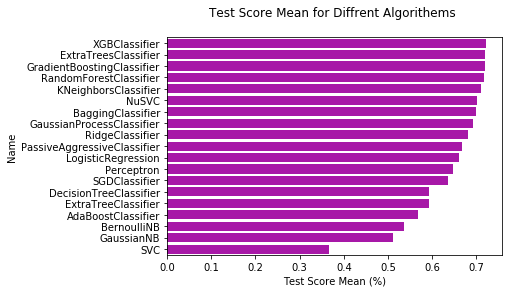

In [21]:
plot_bar_alg_compare(clf_df,X,y)

In [22]:
# using ShuffleSplit
clf_df, clf_preds = train_initial_models(clf_list,cv_split,x,target)
clf_df

6it [01:35, 13.52s/it]d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warni

,Name,Parameters,Train Score Mean,Test Score Mean,Test Score 3*STD,Time
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.715267,0.138564,0.114218
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.796923,0.683969,0.129222,0.00659258
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",1,0.683206,0.16104,0.159304
18,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",1,0.680153,0.0789661,6.44498
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.773846,0.670229,0.0830764,0.375404
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",1,0.665649,0.100242,2.65861
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.798462,0.664122,0.126266,0.31971
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",1,0.662595,0.0970517,3.18578
8,RidgeClassifier,"{'alpha': 1.0, 'class_weight': None, 'copy_X':...",0.821538,0.646565,0.127937,0.0101722
6,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.752308,0.638168,0.114595,0.0641166


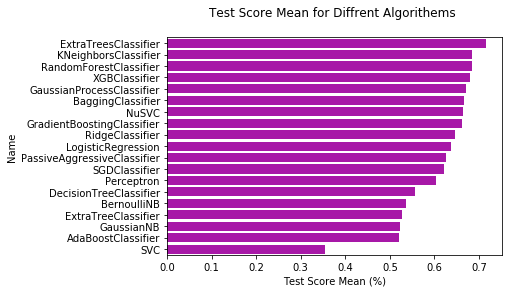

In [23]:
plot_bar_alg_compare(clf_df,X,y)

# GridSearch

In [37]:
# best algorithem is XGBoost - we'll try to optimize it
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [38]:
from sklearn.preprocessing import label_binarize
X_train = x.drop(target, axis=1).copy()
y_train = x[target].copy()
#y_train = label_binarize(y_train, classes=[0, 1, 2, 3])

In [39]:
#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = sklearn.model_selection.GridSearchCV(XGBClassifier(),
                                          param_grid=param_grid,
                                          cv = cv_split)


tune_model.fit(X_train,y_train)


print('AFTER DT Parameters: ', tune_model.best_params_)

print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)



KeyboardInterrupt: 

In [40]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold,ParameterGrid
import xgboost
from sklearn.metrics import mean_squared_error

CLASS = True  # Whether classification or regression
SCORE_MIN = True  # Optimizing score through minimum
k = 5  # Number of folds
best_score = 10
best_params = None
best_iter = None



In [54]:
target1='label'

In [55]:
# CV
X_train1 = x.drop(target, axis=1).copy()
y_train1 = x[target1].copy()
train = np.array(X_train1)
target = np.array(y_train1)  # Changes to Log

print(train.shape,target.shape)

(434, 768) (434,)


In [60]:
if CLASS:
    kfold = StratifiedKFold(k)
    args =[train,target]
    #kfold = [kfold.split(train,target)]

else:
    kfold = KFold(k)
    args = [train]
    #kfold = [kfold.split(train)]

early_stopping = 50

param_grid = [
              {'silent': [1],
               'nthread': [2],
               'eval_metric': ['mlogloss'],
               'eta': [0.03],
               'objective': ['multi:softmax'],              
               'num_class': [4],
               'max_depth': [5, 7],
               'num_round': [1000],
               'subsample': [0.2, 0.4, 0.6],
               'colsample_bytree': [0.3, 0.5, 0.7],
               'n_estimators':[1000]
               }
              ]

In [61]:
# Hyperparmeter grid optimization
for params in ParameterGrid(param_grid):
    print(params)
    # Determine best n_rounds
    xgboost_rounds = []
    for train_index, test_index in kfold.split(*args): # this is generator that needs to be restarted,
        X_train, X_test = train[train_index], train[test_index]
        y_train, y_test = target[train_index], target[test_index]

        xg_train = xgboost.DMatrix(X_train, label=y_train)
        xg_test = xgboost.DMatrix(X_test, label=y_test)

        watchlist = [(xg_train, 'train'), (xg_test, 'test')]

        num_round = params['num_round']
        xgclassifier = xgboost.train(params, xg_train, num_round,
                                     watchlist,
                                     early_stopping_rounds=early_stopping)
        xgboost_rounds.append(xgclassifier.best_iteration)

    num_round = int(np.mean(xgboost_rounds))
    print('The best n_rounds is %d' % num_round)
    # Solve CV
    rmsle_score = []
    for cv_train_index, cv_test_index in kfold.split(*args):
        X_train, X_test = train[cv_train_index, :], train[cv_test_index, :]
        y_train, y_test = target[cv_train_index], target[cv_test_index]

        # train machine learning
        xg_train = xgboost.DMatrix(X_train, label=y_train)
        xg_test = xgboost.DMatrix(X_test, label=y_test)

        watchlist = [(xg_train, 'train'), (xg_test, 'test')]

        xgclassifier = xgboost.train(params, xg_train, num_round);

        # predict
        predicted_results = xgclassifier.predict(xg_test)
        rmsle_score.append(np.sqrt(mean_squared_error(y_test, predicted_results)))

    if SCORE_MIN:
        if best_score > np.mean(rmsle_score):
            print(np.mean(rmsle_score))
            print('new best')
            best_score = np.mean(rmsle_score)
            best_params = params
            best_iter = num_round
    else:
        if best_score < np.mean(rmsle_score):
            print(np.mean(rmsle_score))
            print('new best')
            best_score = np.mean(rmsle_score)
            best_params = params
            best_iter = num_round



{'colsample_bytree': 0.3, 'eta': 0.03, 'eval_metric': 'mlogloss', 'max_depth': 5, 'nthread': 2, 'num_class': 4, 'num_round': 1000, 'objective': 'multi:softmax', 'silent': 1, 'subsample': 0.2}
[0]	train-mlogloss:1.36377	test-mlogloss:1.3678
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.33935	test-mlogloss:1.34864
[2]	train-mlogloss:1.31967	test-mlogloss:1.33101
[3]	train-mlogloss:1.30167	test-mlogloss:1.321
[4]	train-mlogloss:1.28274	test-mlogloss:1.31017
[5]	train-mlogloss:1.26741	test-mlogloss:1.29969
[6]	train-mlogloss:1.24896	test-mlogloss:1.28771
[7]	train-mlogloss:1.23184	test-mlogloss:1.27536
[8]	train-mlogloss:1.21406	test-mlogloss:1.25875
[9]	train-mlogloss:1.19944	test-mlogloss:1.24622
[10]	train-mlogloss:1.18397	test-mlogloss:1.23179
[11]	train-mlogloss:1.16816	test-mlogloss:1.22175
[12]	train-mlogloss:1.15308	test-mlogloss:1.20997
[13]	train-mlogloss:

[153]	train-mlogloss:0.393199	test-mlogloss:0.784789
[154]	train-mlogloss:0.391202	test-mlogloss:0.783613
[155]	train-mlogloss:0.389475	test-mlogloss:0.782645
[156]	train-mlogloss:0.387845	test-mlogloss:0.78124
[157]	train-mlogloss:0.386485	test-mlogloss:0.780358
[158]	train-mlogloss:0.385047	test-mlogloss:0.777878
[159]	train-mlogloss:0.38388	test-mlogloss:0.778876
[160]	train-mlogloss:0.382572	test-mlogloss:0.779403
[161]	train-mlogloss:0.380297	test-mlogloss:0.77723
[162]	train-mlogloss:0.37887	test-mlogloss:0.777646
[163]	train-mlogloss:0.377784	test-mlogloss:0.776031
[164]	train-mlogloss:0.375871	test-mlogloss:0.77475
[165]	train-mlogloss:0.374146	test-mlogloss:0.77441
[166]	train-mlogloss:0.372017	test-mlogloss:0.774638
[167]	train-mlogloss:0.370176	test-mlogloss:0.773783
[168]	train-mlogloss:0.369067	test-mlogloss:0.774096
[169]	train-mlogloss:0.367954	test-mlogloss:0.774975
[170]	train-mlogloss:0.366506	test-mlogloss:0.775988
[171]	train-mlogloss:0.365383	test-mlogloss:0.776667

[0]	train-mlogloss:1.36425	test-mlogloss:1.37182
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.34285	test-mlogloss:1.36119
[2]	train-mlogloss:1.32145	test-mlogloss:1.34837
[3]	train-mlogloss:1.29864	test-mlogloss:1.32927
[4]	train-mlogloss:1.27866	test-mlogloss:1.31739
[5]	train-mlogloss:1.25878	test-mlogloss:1.30461
[6]	train-mlogloss:1.24236	test-mlogloss:1.29164
[7]	train-mlogloss:1.22484	test-mlogloss:1.27947
[8]	train-mlogloss:1.20732	test-mlogloss:1.27071
[9]	train-mlogloss:1.18963	test-mlogloss:1.26216
[10]	train-mlogloss:1.17443	test-mlogloss:1.25126
[11]	train-mlogloss:1.15581	test-mlogloss:1.24061
[12]	train-mlogloss:1.13907	test-mlogloss:1.23178
[13]	train-mlogloss:1.12363	test-mlogloss:1.22144
[14]	train-mlogloss:1.10742	test-mlogloss:1.20847
[15]	train-mlogloss:1.09265	test-mlogloss:1.19689
[16]	train-mlogloss:1.07804	test-mlogloss:1.18733
[17]	trai

[156]	train-mlogloss:0.370693	test-mlogloss:0.841811
[157]	train-mlogloss:0.369332	test-mlogloss:0.841767
[158]	train-mlogloss:0.367805	test-mlogloss:0.843531
[159]	train-mlogloss:0.365554	test-mlogloss:0.841296
[160]	train-mlogloss:0.363233	test-mlogloss:0.842381
[161]	train-mlogloss:0.361278	test-mlogloss:0.841937
[162]	train-mlogloss:0.359182	test-mlogloss:0.841968
[163]	train-mlogloss:0.357807	test-mlogloss:0.841445
[164]	train-mlogloss:0.35606	test-mlogloss:0.841952
[165]	train-mlogloss:0.354179	test-mlogloss:0.841403
[166]	train-mlogloss:0.352587	test-mlogloss:0.842613
[167]	train-mlogloss:0.350865	test-mlogloss:0.841967
[168]	train-mlogloss:0.349059	test-mlogloss:0.841555
[169]	train-mlogloss:0.347533	test-mlogloss:0.843012
[170]	train-mlogloss:0.346602	test-mlogloss:0.843787
[171]	train-mlogloss:0.345551	test-mlogloss:0.845133
[172]	train-mlogloss:0.343174	test-mlogloss:0.844616
[173]	train-mlogloss:0.341279	test-mlogloss:0.844793
[174]	train-mlogloss:0.338948	test-mlogloss:0.8

[75]	train-mlogloss:0.623034	test-mlogloss:0.851624
[76]	train-mlogloss:0.618415	test-mlogloss:0.850209
[77]	train-mlogloss:0.613656	test-mlogloss:0.846575
[78]	train-mlogloss:0.608809	test-mlogloss:0.845761
[79]	train-mlogloss:0.603676	test-mlogloss:0.839652
[80]	train-mlogloss:0.599532	test-mlogloss:0.83854
[81]	train-mlogloss:0.596185	test-mlogloss:0.838749
[82]	train-mlogloss:0.591591	test-mlogloss:0.837131
[83]	train-mlogloss:0.587051	test-mlogloss:0.834948
[84]	train-mlogloss:0.582916	test-mlogloss:0.830406
[85]	train-mlogloss:0.578897	test-mlogloss:0.827875
[86]	train-mlogloss:0.575858	test-mlogloss:0.825472
[87]	train-mlogloss:0.571787	test-mlogloss:0.822479
[88]	train-mlogloss:0.568652	test-mlogloss:0.822671
[89]	train-mlogloss:0.564573	test-mlogloss:0.82035
[90]	train-mlogloss:0.561411	test-mlogloss:0.818945
[91]	train-mlogloss:0.557671	test-mlogloss:0.815725
[92]	train-mlogloss:0.553144	test-mlogloss:0.814262
[93]	train-mlogloss:0.549425	test-mlogloss:0.814115
[94]	train-mlo

[231]	train-mlogloss:0.289133	test-mlogloss:0.72211
[232]	train-mlogloss:0.287978	test-mlogloss:0.723077
[233]	train-mlogloss:0.286906	test-mlogloss:0.722518
[234]	train-mlogloss:0.286231	test-mlogloss:0.72281
[235]	train-mlogloss:0.285078	test-mlogloss:0.722712
[236]	train-mlogloss:0.284215	test-mlogloss:0.722607
[237]	train-mlogloss:0.283499	test-mlogloss:0.723526
[238]	train-mlogloss:0.282701	test-mlogloss:0.72402
[239]	train-mlogloss:0.281074	test-mlogloss:0.723103
[240]	train-mlogloss:0.280208	test-mlogloss:0.723871
[241]	train-mlogloss:0.279532	test-mlogloss:0.724062
[242]	train-mlogloss:0.278541	test-mlogloss:0.723713
[243]	train-mlogloss:0.277393	test-mlogloss:0.72207
[244]	train-mlogloss:0.276227	test-mlogloss:0.723061
[245]	train-mlogloss:0.275353	test-mlogloss:0.721267
[246]	train-mlogloss:0.274012	test-mlogloss:0.719219
[247]	train-mlogloss:0.272914	test-mlogloss:0.716368
[248]	train-mlogloss:0.272283	test-mlogloss:0.715243
[249]	train-mlogloss:0.271242	test-mlogloss:0.7145

[387]	train-mlogloss:0.184173	test-mlogloss:0.680437
[388]	train-mlogloss:0.183661	test-mlogloss:0.680439
[389]	train-mlogloss:0.183093	test-mlogloss:0.679928
[390]	train-mlogloss:0.182601	test-mlogloss:0.680073
[391]	train-mlogloss:0.181985	test-mlogloss:0.679978
[392]	train-mlogloss:0.181357	test-mlogloss:0.679396
[393]	train-mlogloss:0.181002	test-mlogloss:0.680131
[394]	train-mlogloss:0.180726	test-mlogloss:0.678298
[395]	train-mlogloss:0.180193	test-mlogloss:0.678885
[396]	train-mlogloss:0.179678	test-mlogloss:0.678358
[397]	train-mlogloss:0.179153	test-mlogloss:0.678393
[398]	train-mlogloss:0.178749	test-mlogloss:0.679952
[399]	train-mlogloss:0.178411	test-mlogloss:0.679623
[400]	train-mlogloss:0.177858	test-mlogloss:0.680799
[401]	train-mlogloss:0.177392	test-mlogloss:0.680313
[402]	train-mlogloss:0.17693	test-mlogloss:0.681128
[403]	train-mlogloss:0.176519	test-mlogloss:0.681645
[404]	train-mlogloss:0.176051	test-mlogloss:0.68265
[405]	train-mlogloss:0.175461	test-mlogloss:0.68

[96]	train-mlogloss:0.536068	test-mlogloss:0.765924
[97]	train-mlogloss:0.533025	test-mlogloss:0.764598
[98]	train-mlogloss:0.530197	test-mlogloss:0.763685
[99]	train-mlogloss:0.526571	test-mlogloss:0.763291
[100]	train-mlogloss:0.522906	test-mlogloss:0.760201
[101]	train-mlogloss:0.51948	test-mlogloss:0.759701
[102]	train-mlogloss:0.517097	test-mlogloss:0.759157
[103]	train-mlogloss:0.513905	test-mlogloss:0.754636
[104]	train-mlogloss:0.510837	test-mlogloss:0.753751
[105]	train-mlogloss:0.507597	test-mlogloss:0.75068
[106]	train-mlogloss:0.504611	test-mlogloss:0.75119
[107]	train-mlogloss:0.501153	test-mlogloss:0.749085
[108]	train-mlogloss:0.498203	test-mlogloss:0.74614
[109]	train-mlogloss:0.495084	test-mlogloss:0.744295
[110]	train-mlogloss:0.492716	test-mlogloss:0.741662
[111]	train-mlogloss:0.48915	test-mlogloss:0.739
[112]	train-mlogloss:0.486353	test-mlogloss:0.739459
[113]	train-mlogloss:0.482706	test-mlogloss:0.738246
[114]	train-mlogloss:0.480387	test-mlogloss:0.738593
[115]

[252]	train-mlogloss:0.262038	test-mlogloss:0.689561
[253]	train-mlogloss:0.261096	test-mlogloss:0.688659
[254]	train-mlogloss:0.260616	test-mlogloss:0.68867
[255]	train-mlogloss:0.259502	test-mlogloss:0.689562
[256]	train-mlogloss:0.258204	test-mlogloss:0.687654
[257]	train-mlogloss:0.257215	test-mlogloss:0.687001
[258]	train-mlogloss:0.256045	test-mlogloss:0.686463
[259]	train-mlogloss:0.254945	test-mlogloss:0.684847
[260]	train-mlogloss:0.253951	test-mlogloss:0.684694
[261]	train-mlogloss:0.252581	test-mlogloss:0.684494
[262]	train-mlogloss:0.251972	test-mlogloss:0.684954
[263]	train-mlogloss:0.251034	test-mlogloss:0.6845
[264]	train-mlogloss:0.250294	test-mlogloss:0.684982
[265]	train-mlogloss:0.248913	test-mlogloss:0.683791
[266]	train-mlogloss:0.248352	test-mlogloss:0.684541
[267]	train-mlogloss:0.247584	test-mlogloss:0.683888
[268]	train-mlogloss:0.246619	test-mlogloss:0.683274
[269]	train-mlogloss:0.245429	test-mlogloss:0.682706
[270]	train-mlogloss:0.244754	test-mlogloss:0.683

[66]	train-mlogloss:0.67664	test-mlogloss:0.809185
[67]	train-mlogloss:0.670703	test-mlogloss:0.804706
[68]	train-mlogloss:0.665131	test-mlogloss:0.800269
[69]	train-mlogloss:0.659091	test-mlogloss:0.797564
[70]	train-mlogloss:0.654123	test-mlogloss:0.793175
[71]	train-mlogloss:0.6491	test-mlogloss:0.790202
[72]	train-mlogloss:0.644083	test-mlogloss:0.786009
[73]	train-mlogloss:0.638424	test-mlogloss:0.782646
[74]	train-mlogloss:0.634524	test-mlogloss:0.780474
[75]	train-mlogloss:0.630553	test-mlogloss:0.779336
[76]	train-mlogloss:0.626941	test-mlogloss:0.776312
[77]	train-mlogloss:0.622383	test-mlogloss:0.772965
[78]	train-mlogloss:0.618343	test-mlogloss:0.771156
[79]	train-mlogloss:0.613961	test-mlogloss:0.768461
[80]	train-mlogloss:0.609415	test-mlogloss:0.764458
[81]	train-mlogloss:0.605182	test-mlogloss:0.760658
[82]	train-mlogloss:0.601784	test-mlogloss:0.759288
[83]	train-mlogloss:0.598493	test-mlogloss:0.757512
[84]	train-mlogloss:0.593851	test-mlogloss:0.753456
[85]	train-mlog

[223]	train-mlogloss:0.296306	test-mlogloss:0.637081
[224]	train-mlogloss:0.294956	test-mlogloss:0.635134
[225]	train-mlogloss:0.293876	test-mlogloss:0.633792
[226]	train-mlogloss:0.292488	test-mlogloss:0.632146
[227]	train-mlogloss:0.291432	test-mlogloss:0.633698
[228]	train-mlogloss:0.290374	test-mlogloss:0.634322
[229]	train-mlogloss:0.289503	test-mlogloss:0.634202
[230]	train-mlogloss:0.288643	test-mlogloss:0.633954
[231]	train-mlogloss:0.287594	test-mlogloss:0.634815
[232]	train-mlogloss:0.286695	test-mlogloss:0.636124
[233]	train-mlogloss:0.285187	test-mlogloss:0.638068
[234]	train-mlogloss:0.284099	test-mlogloss:0.637839
[235]	train-mlogloss:0.282978	test-mlogloss:0.637878
[236]	train-mlogloss:0.281988	test-mlogloss:0.638003
[237]	train-mlogloss:0.280705	test-mlogloss:0.638835
[238]	train-mlogloss:0.279653	test-mlogloss:0.637147
[239]	train-mlogloss:0.27855	test-mlogloss:0.636822
[240]	train-mlogloss:0.277374	test-mlogloss:0.636208
[241]	train-mlogloss:0.276512	test-mlogloss:0.6

[379]	train-mlogloss:0.183538	test-mlogloss:0.625374
[380]	train-mlogloss:0.183191	test-mlogloss:0.625138
[381]	train-mlogloss:0.182515	test-mlogloss:0.625389
[382]	train-mlogloss:0.181974	test-mlogloss:0.625953
Stopping. Best iteration:
[332]	train-mlogloss:0.207512	test-mlogloss:0.621155

The best n_rounds is 291
0.69439775
new best
{'colsample_bytree': 0.3, 'eta': 0.03, 'eval_metric': 'mlogloss', 'max_depth': 5, 'nthread': 2, 'num_class': 4, 'num_round': 1000, 'objective': 'multi:softmax', 'silent': 1, 'subsample': 0.4}
[0]	train-mlogloss:1.35758	test-mlogloss:1.36609
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.32755	test-mlogloss:1.34662
[2]	train-mlogloss:1.29971	test-mlogloss:1.32929
[3]	train-mlogloss:1.27405	test-mlogloss:1.3136
[4]	train-mlogloss:1.24849	test-mlogloss:1.29701
[5]	train-mlogloss:1.22508	test-mlogloss:1.28255
[6]	train-mlogloss:1.20115	

[146]	train-mlogloss:0.222125	test-mlogloss:0.760911
[147]	train-mlogloss:0.220346	test-mlogloss:0.759292
[148]	train-mlogloss:0.218541	test-mlogloss:0.758564
[149]	train-mlogloss:0.216839	test-mlogloss:0.758058
[150]	train-mlogloss:0.215055	test-mlogloss:0.756766
[151]	train-mlogloss:0.212996	test-mlogloss:0.755276
[152]	train-mlogloss:0.211384	test-mlogloss:0.755169
[153]	train-mlogloss:0.209747	test-mlogloss:0.755638
[154]	train-mlogloss:0.207973	test-mlogloss:0.754667
[155]	train-mlogloss:0.206354	test-mlogloss:0.754871
[156]	train-mlogloss:0.204758	test-mlogloss:0.754053
[157]	train-mlogloss:0.203252	test-mlogloss:0.753634
[158]	train-mlogloss:0.201998	test-mlogloss:0.75343
[159]	train-mlogloss:0.20075	test-mlogloss:0.753366
[160]	train-mlogloss:0.199283	test-mlogloss:0.755015
[161]	train-mlogloss:0.197802	test-mlogloss:0.753403
[162]	train-mlogloss:0.195894	test-mlogloss:0.753547
[163]	train-mlogloss:0.194529	test-mlogloss:0.752725
[164]	train-mlogloss:0.192968	test-mlogloss:0.75

[302]	train-mlogloss:0.086207	test-mlogloss:0.739998
[303]	train-mlogloss:0.085852	test-mlogloss:0.740564
Stopping. Best iteration:
[253]	train-mlogloss:0.108704	test-mlogloss:0.72957

[0]	train-mlogloss:1.35499	test-mlogloss:1.36787
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.32505	test-mlogloss:1.34918
[2]	train-mlogloss:1.29833	test-mlogloss:1.33517
[3]	train-mlogloss:1.26985	test-mlogloss:1.31734
[4]	train-mlogloss:1.24461	test-mlogloss:1.30078
[5]	train-mlogloss:1.22166	test-mlogloss:1.28736
[6]	train-mlogloss:1.19891	test-mlogloss:1.27611
[7]	train-mlogloss:1.1765	test-mlogloss:1.26347
[8]	train-mlogloss:1.1536	test-mlogloss:1.24956
[9]	train-mlogloss:1.13233	test-mlogloss:1.23652
[10]	train-mlogloss:1.11174	test-mlogloss:1.22671
[11]	train-mlogloss:1.09009	test-mlogloss:1.21269
[12]	train-mlogloss:1.06983	test-mlogloss:1.2001
[13]	train-mlogloss:1.05104

[152]	train-mlogloss:0.208672	test-mlogloss:0.829056
[153]	train-mlogloss:0.206753	test-mlogloss:0.827722
[154]	train-mlogloss:0.205247	test-mlogloss:0.829051
[155]	train-mlogloss:0.203646	test-mlogloss:0.828745
[156]	train-mlogloss:0.201788	test-mlogloss:0.829435
[157]	train-mlogloss:0.200639	test-mlogloss:0.829777
[158]	train-mlogloss:0.198973	test-mlogloss:0.829615
[159]	train-mlogloss:0.197314	test-mlogloss:0.828356
[160]	train-mlogloss:0.195579	test-mlogloss:0.828293
[161]	train-mlogloss:0.194033	test-mlogloss:0.827566
[162]	train-mlogloss:0.192343	test-mlogloss:0.826699
[163]	train-mlogloss:0.190756	test-mlogloss:0.826907
[164]	train-mlogloss:0.189406	test-mlogloss:0.826507
[165]	train-mlogloss:0.187966	test-mlogloss:0.826231
[166]	train-mlogloss:0.186574	test-mlogloss:0.826364
[167]	train-mlogloss:0.18493	test-mlogloss:0.825144
[168]	train-mlogloss:0.18376	test-mlogloss:0.824272
[169]	train-mlogloss:0.182251	test-mlogloss:0.825949
[170]	train-mlogloss:0.180925	test-mlogloss:0.82

[87]	train-mlogloss:0.389937	test-mlogloss:0.779913
[88]	train-mlogloss:0.385877	test-mlogloss:0.779175
[89]	train-mlogloss:0.381899	test-mlogloss:0.775856
[90]	train-mlogloss:0.378009	test-mlogloss:0.77305
[91]	train-mlogloss:0.373906	test-mlogloss:0.774026
[92]	train-mlogloss:0.369779	test-mlogloss:0.772023
[93]	train-mlogloss:0.366479	test-mlogloss:0.770124
[94]	train-mlogloss:0.362721	test-mlogloss:0.768058
[95]	train-mlogloss:0.358813	test-mlogloss:0.766166
[96]	train-mlogloss:0.35545	test-mlogloss:0.763713
[97]	train-mlogloss:0.352084	test-mlogloss:0.762125
[98]	train-mlogloss:0.348627	test-mlogloss:0.759592
[99]	train-mlogloss:0.345247	test-mlogloss:0.757534
[100]	train-mlogloss:0.341872	test-mlogloss:0.755175
[101]	train-mlogloss:0.338179	test-mlogloss:0.753806
[102]	train-mlogloss:0.334827	test-mlogloss:0.752189
[103]	train-mlogloss:0.331491	test-mlogloss:0.748465
[104]	train-mlogloss:0.328469	test-mlogloss:0.74694
[105]	train-mlogloss:0.32495	test-mlogloss:0.744428
[106]	trai

[243]	train-mlogloss:0.120127	test-mlogloss:0.678289
[244]	train-mlogloss:0.119466	test-mlogloss:0.678217
[245]	train-mlogloss:0.118762	test-mlogloss:0.678205
[246]	train-mlogloss:0.11798	test-mlogloss:0.678937
[247]	train-mlogloss:0.117313	test-mlogloss:0.677572
[248]	train-mlogloss:0.116721	test-mlogloss:0.677381
[249]	train-mlogloss:0.116108	test-mlogloss:0.676636
[250]	train-mlogloss:0.115478	test-mlogloss:0.677173
[251]	train-mlogloss:0.114741	test-mlogloss:0.676411
[252]	train-mlogloss:0.114015	test-mlogloss:0.675238
[253]	train-mlogloss:0.113348	test-mlogloss:0.67545
[254]	train-mlogloss:0.112777	test-mlogloss:0.674876
[255]	train-mlogloss:0.112262	test-mlogloss:0.673871
[256]	train-mlogloss:0.111703	test-mlogloss:0.673382
[257]	train-mlogloss:0.111154	test-mlogloss:0.674618
[258]	train-mlogloss:0.110505	test-mlogloss:0.673844
[259]	train-mlogloss:0.10985	test-mlogloss:0.674808
[260]	train-mlogloss:0.10935	test-mlogloss:0.674329
[261]	train-mlogloss:0.108796	test-mlogloss:0.6737

[80]	train-mlogloss:0.422391	test-mlogloss:0.767804
[81]	train-mlogloss:0.417866	test-mlogloss:0.763439
[82]	train-mlogloss:0.413515	test-mlogloss:0.760667
[83]	train-mlogloss:0.408748	test-mlogloss:0.757002
[84]	train-mlogloss:0.404271	test-mlogloss:0.754297
[85]	train-mlogloss:0.400257	test-mlogloss:0.752473
[86]	train-mlogloss:0.395408	test-mlogloss:0.752111
[87]	train-mlogloss:0.391936	test-mlogloss:0.748866
[88]	train-mlogloss:0.387958	test-mlogloss:0.746075
[89]	train-mlogloss:0.383451	test-mlogloss:0.74324
[90]	train-mlogloss:0.379649	test-mlogloss:0.741654
[91]	train-mlogloss:0.375562	test-mlogloss:0.739965
[92]	train-mlogloss:0.371044	test-mlogloss:0.739826
[93]	train-mlogloss:0.367248	test-mlogloss:0.738153
[94]	train-mlogloss:0.363669	test-mlogloss:0.736932
[95]	train-mlogloss:0.359872	test-mlogloss:0.735051
[96]	train-mlogloss:0.356464	test-mlogloss:0.733452
[97]	train-mlogloss:0.352629	test-mlogloss:0.729526
[98]	train-mlogloss:0.349411	test-mlogloss:0.727809
[99]	train-ml

[236]	train-mlogloss:0.124607	test-mlogloss:0.652613
[237]	train-mlogloss:0.123891	test-mlogloss:0.651736
[238]	train-mlogloss:0.123143	test-mlogloss:0.651975
[239]	train-mlogloss:0.122406	test-mlogloss:0.653329
[240]	train-mlogloss:0.121785	test-mlogloss:0.652641
[241]	train-mlogloss:0.120859	test-mlogloss:0.652855
[242]	train-mlogloss:0.120343	test-mlogloss:0.652507
[243]	train-mlogloss:0.119903	test-mlogloss:0.654099
[244]	train-mlogloss:0.119184	test-mlogloss:0.653716
[245]	train-mlogloss:0.118482	test-mlogloss:0.653894
[246]	train-mlogloss:0.117833	test-mlogloss:0.654587
[247]	train-mlogloss:0.117152	test-mlogloss:0.654899
[248]	train-mlogloss:0.116649	test-mlogloss:0.654296
[249]	train-mlogloss:0.115936	test-mlogloss:0.655568
[250]	train-mlogloss:0.115489	test-mlogloss:0.655526
[251]	train-mlogloss:0.114771	test-mlogloss:0.655466
[252]	train-mlogloss:0.114212	test-mlogloss:0.655182
[253]	train-mlogloss:0.113511	test-mlogloss:0.654596
[254]	train-mlogloss:0.113102	test-mlogloss:0.

[135]	train-mlogloss:0.250753	test-mlogloss:0.638189
[136]	train-mlogloss:0.24858	test-mlogloss:0.636835
[137]	train-mlogloss:0.246794	test-mlogloss:0.63615
[138]	train-mlogloss:0.244968	test-mlogloss:0.636493
[139]	train-mlogloss:0.24269	test-mlogloss:0.634375
[140]	train-mlogloss:0.240936	test-mlogloss:0.634633
[141]	train-mlogloss:0.238779	test-mlogloss:0.633968
[142]	train-mlogloss:0.236857	test-mlogloss:0.634358
[143]	train-mlogloss:0.234989	test-mlogloss:0.633242
[144]	train-mlogloss:0.232943	test-mlogloss:0.632005
[145]	train-mlogloss:0.230899	test-mlogloss:0.630998
[146]	train-mlogloss:0.228931	test-mlogloss:0.629067
[147]	train-mlogloss:0.227167	test-mlogloss:0.628223
[148]	train-mlogloss:0.225378	test-mlogloss:0.62791
[149]	train-mlogloss:0.223005	test-mlogloss:0.626325
[150]	train-mlogloss:0.221354	test-mlogloss:0.624915
[151]	train-mlogloss:0.219392	test-mlogloss:0.624262
[152]	train-mlogloss:0.217488	test-mlogloss:0.623185
[153]	train-mlogloss:0.215953	test-mlogloss:0.6224

[291]	train-mlogloss:0.092424	test-mlogloss:0.601378
[292]	train-mlogloss:0.091902	test-mlogloss:0.601068
[293]	train-mlogloss:0.091322	test-mlogloss:0.600892
[294]	train-mlogloss:0.090983	test-mlogloss:0.600701
[295]	train-mlogloss:0.09055	test-mlogloss:0.600207
[296]	train-mlogloss:0.090145	test-mlogloss:0.600089
[297]	train-mlogloss:0.089781	test-mlogloss:0.600816
[298]	train-mlogloss:0.089334	test-mlogloss:0.600535
[299]	train-mlogloss:0.089036	test-mlogloss:0.600499
[300]	train-mlogloss:0.088614	test-mlogloss:0.600455
[301]	train-mlogloss:0.088181	test-mlogloss:0.601056
[302]	train-mlogloss:0.087783	test-mlogloss:0.60092
[303]	train-mlogloss:0.087426	test-mlogloss:0.600889
[304]	train-mlogloss:0.087048	test-mlogloss:0.600648
[305]	train-mlogloss:0.086751	test-mlogloss:0.600946
[306]	train-mlogloss:0.08641	test-mlogloss:0.601327
[307]	train-mlogloss:0.085961	test-mlogloss:0.601821
[308]	train-mlogloss:0.085532	test-mlogloss:0.602192
[309]	train-mlogloss:0.08513	test-mlogloss:0.6019

[125]	train-mlogloss:0.183002	test-mlogloss:0.74754
[126]	train-mlogloss:0.181082	test-mlogloss:0.746166
[127]	train-mlogloss:0.179087	test-mlogloss:0.74384
[128]	train-mlogloss:0.176876	test-mlogloss:0.742612
[129]	train-mlogloss:0.175091	test-mlogloss:0.742904
[130]	train-mlogloss:0.173207	test-mlogloss:0.742782
[131]	train-mlogloss:0.171526	test-mlogloss:0.742232
[132]	train-mlogloss:0.169975	test-mlogloss:0.74215
[133]	train-mlogloss:0.168293	test-mlogloss:0.741658
[134]	train-mlogloss:0.166436	test-mlogloss:0.741788
[135]	train-mlogloss:0.164825	test-mlogloss:0.741382
[136]	train-mlogloss:0.163121	test-mlogloss:0.740225
[137]	train-mlogloss:0.161382	test-mlogloss:0.739407
[138]	train-mlogloss:0.159446	test-mlogloss:0.7384
[139]	train-mlogloss:0.15756	test-mlogloss:0.738293
[140]	train-mlogloss:0.155979	test-mlogloss:0.736128
[141]	train-mlogloss:0.154289	test-mlogloss:0.736774
[142]	train-mlogloss:0.152555	test-mlogloss:0.735721
[143]	train-mlogloss:0.151138	test-mlogloss:0.734477

[53]	train-mlogloss:0.482351	test-mlogloss:0.918609
[54]	train-mlogloss:0.474386	test-mlogloss:0.916836
[55]	train-mlogloss:0.467388	test-mlogloss:0.914028
[56]	train-mlogloss:0.459411	test-mlogloss:0.909562
[57]	train-mlogloss:0.45182	test-mlogloss:0.906868
[58]	train-mlogloss:0.44557	test-mlogloss:0.906905
[59]	train-mlogloss:0.438753	test-mlogloss:0.905154
[60]	train-mlogloss:0.432303	test-mlogloss:0.901235
[61]	train-mlogloss:0.425445	test-mlogloss:0.899764
[62]	train-mlogloss:0.418748	test-mlogloss:0.896381
[63]	train-mlogloss:0.412213	test-mlogloss:0.894034
[64]	train-mlogloss:0.40627	test-mlogloss:0.890207
[65]	train-mlogloss:0.400339	test-mlogloss:0.887786
[66]	train-mlogloss:0.394693	test-mlogloss:0.885697
[67]	train-mlogloss:0.388471	test-mlogloss:0.883397
[68]	train-mlogloss:0.38254	test-mlogloss:0.881149
[69]	train-mlogloss:0.376853	test-mlogloss:0.880029
[70]	train-mlogloss:0.371605	test-mlogloss:0.878849
[71]	train-mlogloss:0.365985	test-mlogloss:0.877325
[72]	train-mlogl

[22]	train-mlogloss:0.842724	test-mlogloss:1.03588
[23]	train-mlogloss:0.828729	test-mlogloss:1.02757
[24]	train-mlogloss:0.812548	test-mlogloss:1.01876
[25]	train-mlogloss:0.796716	test-mlogloss:1.01079
[26]	train-mlogloss:0.781875	test-mlogloss:1.00249
[27]	train-mlogloss:0.767799	test-mlogloss:0.994926
[28]	train-mlogloss:0.753354	test-mlogloss:0.98551
[29]	train-mlogloss:0.738966	test-mlogloss:0.975657
[30]	train-mlogloss:0.725591	test-mlogloss:0.968425
[31]	train-mlogloss:0.711969	test-mlogloss:0.961711
[32]	train-mlogloss:0.699435	test-mlogloss:0.955163
[33]	train-mlogloss:0.688753	test-mlogloss:0.947951
[34]	train-mlogloss:0.67642	test-mlogloss:0.93898
[35]	train-mlogloss:0.6648	test-mlogloss:0.933476
[36]	train-mlogloss:0.654273	test-mlogloss:0.92669
[37]	train-mlogloss:0.644009	test-mlogloss:0.920058
[38]	train-mlogloss:0.632932	test-mlogloss:0.913902
[39]	train-mlogloss:0.621085	test-mlogloss:0.907902
[40]	train-mlogloss:0.611186	test-mlogloss:0.901668
[41]	train-mlogloss:0.6

[179]	train-mlogloss:0.111795	test-mlogloss:0.703905
[180]	train-mlogloss:0.110838	test-mlogloss:0.704463
[181]	train-mlogloss:0.109855	test-mlogloss:0.703663
[182]	train-mlogloss:0.109038	test-mlogloss:0.703796
[183]	train-mlogloss:0.108044	test-mlogloss:0.702969
[184]	train-mlogloss:0.107244	test-mlogloss:0.702607
[185]	train-mlogloss:0.106254	test-mlogloss:0.701522
[186]	train-mlogloss:0.105342	test-mlogloss:0.702902
[187]	train-mlogloss:0.104502	test-mlogloss:0.702447
[188]	train-mlogloss:0.10351	test-mlogloss:0.701864
[189]	train-mlogloss:0.10261	test-mlogloss:0.700937
[190]	train-mlogloss:0.101749	test-mlogloss:0.700797
[191]	train-mlogloss:0.100926	test-mlogloss:0.700824
[192]	train-mlogloss:0.100195	test-mlogloss:0.701665
[193]	train-mlogloss:0.099386	test-mlogloss:0.700791
[194]	train-mlogloss:0.098679	test-mlogloss:0.700148
[195]	train-mlogloss:0.097856	test-mlogloss:0.700922
[196]	train-mlogloss:0.097123	test-mlogloss:0.700396
[197]	train-mlogloss:0.096373	test-mlogloss:0.69

[11]	train-mlogloss:1.05349	test-mlogloss:1.16384
[12]	train-mlogloss:1.03202	test-mlogloss:1.15038
[13]	train-mlogloss:1.01112	test-mlogloss:1.13849
[14]	train-mlogloss:0.991806	test-mlogloss:1.12412
[15]	train-mlogloss:0.970185	test-mlogloss:1.10963
[16]	train-mlogloss:0.951645	test-mlogloss:1.10086
[17]	train-mlogloss:0.932525	test-mlogloss:1.08936
[18]	train-mlogloss:0.91509	test-mlogloss:1.07939
[19]	train-mlogloss:0.897406	test-mlogloss:1.06673
[20]	train-mlogloss:0.879968	test-mlogloss:1.05481
[21]	train-mlogloss:0.862279	test-mlogloss:1.0457
[22]	train-mlogloss:0.845449	test-mlogloss:1.0342
[23]	train-mlogloss:0.831262	test-mlogloss:1.02865
[24]	train-mlogloss:0.816016	test-mlogloss:1.01735
[25]	train-mlogloss:0.800924	test-mlogloss:1.00576
[26]	train-mlogloss:0.786592	test-mlogloss:0.999615
[27]	train-mlogloss:0.772513	test-mlogloss:0.991153
[28]	train-mlogloss:0.757903	test-mlogloss:0.983124
[29]	train-mlogloss:0.744791	test-mlogloss:0.974435
[30]	train-mlogloss:0.731984	test

[169]	train-mlogloss:0.12447	test-mlogloss:0.654293
[170]	train-mlogloss:0.123266	test-mlogloss:0.653996
[171]	train-mlogloss:0.122187	test-mlogloss:0.655275
[172]	train-mlogloss:0.121231	test-mlogloss:0.653561
[173]	train-mlogloss:0.120028	test-mlogloss:0.653296
[174]	train-mlogloss:0.118999	test-mlogloss:0.653571
[175]	train-mlogloss:0.117794	test-mlogloss:0.654407
[176]	train-mlogloss:0.116794	test-mlogloss:0.652537
[177]	train-mlogloss:0.115824	test-mlogloss:0.652041
[178]	train-mlogloss:0.114721	test-mlogloss:0.651595
[179]	train-mlogloss:0.113708	test-mlogloss:0.650284
[180]	train-mlogloss:0.112674	test-mlogloss:0.650589
[181]	train-mlogloss:0.11168	test-mlogloss:0.650199
[182]	train-mlogloss:0.110893	test-mlogloss:0.650604
[183]	train-mlogloss:0.109903	test-mlogloss:0.650438
[184]	train-mlogloss:0.108872	test-mlogloss:0.649822
[185]	train-mlogloss:0.108005	test-mlogloss:0.648553
[186]	train-mlogloss:0.10712	test-mlogloss:0.6484
[187]	train-mlogloss:0.106271	test-mlogloss:0.64853

[41]	train-mlogloss:0.603542	test-mlogloss:0.866163
[42]	train-mlogloss:0.593719	test-mlogloss:0.858446
[43]	train-mlogloss:0.584503	test-mlogloss:0.850709
[44]	train-mlogloss:0.575462	test-mlogloss:0.844477
[45]	train-mlogloss:0.566079	test-mlogloss:0.83859
[46]	train-mlogloss:0.557157	test-mlogloss:0.833069
[47]	train-mlogloss:0.548542	test-mlogloss:0.82986
[48]	train-mlogloss:0.540008	test-mlogloss:0.822862
[49]	train-mlogloss:0.530443	test-mlogloss:0.817678
[50]	train-mlogloss:0.522243	test-mlogloss:0.81178
[51]	train-mlogloss:0.51389	test-mlogloss:0.805134
[52]	train-mlogloss:0.505607	test-mlogloss:0.800828
[53]	train-mlogloss:0.497866	test-mlogloss:0.796008
[54]	train-mlogloss:0.49105	test-mlogloss:0.791639
[55]	train-mlogloss:0.483319	test-mlogloss:0.788911
[56]	train-mlogloss:0.475218	test-mlogloss:0.784888
[57]	train-mlogloss:0.467871	test-mlogloss:0.782202
[58]	train-mlogloss:0.461388	test-mlogloss:0.777943
[59]	train-mlogloss:0.454591	test-mlogloss:0.772605
[60]	train-mloglo

[198]	train-mlogloss:0.094295	test-mlogloss:0.603309
[199]	train-mlogloss:0.093552	test-mlogloss:0.602333
[200]	train-mlogloss:0.092805	test-mlogloss:0.602663
[201]	train-mlogloss:0.092036	test-mlogloss:0.601781
[202]	train-mlogloss:0.091373	test-mlogloss:0.601319
[203]	train-mlogloss:0.090629	test-mlogloss:0.601152
[204]	train-mlogloss:0.089952	test-mlogloss:0.601879
[205]	train-mlogloss:0.089297	test-mlogloss:0.60171
[206]	train-mlogloss:0.088624	test-mlogloss:0.601845
[207]	train-mlogloss:0.087967	test-mlogloss:0.601535
[208]	train-mlogloss:0.087278	test-mlogloss:0.601816
[209]	train-mlogloss:0.086597	test-mlogloss:0.601444
[210]	train-mlogloss:0.085954	test-mlogloss:0.601477
[211]	train-mlogloss:0.085299	test-mlogloss:0.601311
[212]	train-mlogloss:0.08465	test-mlogloss:0.601259
[213]	train-mlogloss:0.084114	test-mlogloss:0.601471
[214]	train-mlogloss:0.083492	test-mlogloss:0.60161
[215]	train-mlogloss:0.082866	test-mlogloss:0.601467
[216]	train-mlogloss:0.082269	test-mlogloss:0.601

[64]	train-mlogloss:0.669325	test-mlogloss:0.908404
[65]	train-mlogloss:0.663032	test-mlogloss:0.905435
[66]	train-mlogloss:0.657965	test-mlogloss:0.903074
[67]	train-mlogloss:0.652772	test-mlogloss:0.90012
[68]	train-mlogloss:0.648142	test-mlogloss:0.899157
[69]	train-mlogloss:0.642493	test-mlogloss:0.894919
[70]	train-mlogloss:0.637318	test-mlogloss:0.891003
[71]	train-mlogloss:0.632278	test-mlogloss:0.888922
[72]	train-mlogloss:0.626823	test-mlogloss:0.885237
[73]	train-mlogloss:0.621557	test-mlogloss:0.8815
[74]	train-mlogloss:0.617736	test-mlogloss:0.877829
[75]	train-mlogloss:0.612565	test-mlogloss:0.873715
[76]	train-mlogloss:0.608695	test-mlogloss:0.870841
[77]	train-mlogloss:0.60379	test-mlogloss:0.869607
[78]	train-mlogloss:0.599835	test-mlogloss:0.866613
[79]	train-mlogloss:0.596402	test-mlogloss:0.864126
[80]	train-mlogloss:0.591794	test-mlogloss:0.861813
[81]	train-mlogloss:0.587594	test-mlogloss:0.85999
[82]	train-mlogloss:0.582595	test-mlogloss:0.858894
[83]	train-mloglo

[220]	train-mlogloss:0.294763	test-mlogloss:0.761232
[221]	train-mlogloss:0.29379	test-mlogloss:0.762028
[222]	train-mlogloss:0.292359	test-mlogloss:0.76324
[223]	train-mlogloss:0.291713	test-mlogloss:0.762389
[224]	train-mlogloss:0.290072	test-mlogloss:0.76191
[225]	train-mlogloss:0.288993	test-mlogloss:0.762055
[226]	train-mlogloss:0.287535	test-mlogloss:0.759611
[227]	train-mlogloss:0.286399	test-mlogloss:0.758788
[228]	train-mlogloss:0.285068	test-mlogloss:0.757326
[229]	train-mlogloss:0.284497	test-mlogloss:0.75834
[230]	train-mlogloss:0.283533	test-mlogloss:0.758492
[231]	train-mlogloss:0.282734	test-mlogloss:0.758974
[232]	train-mlogloss:0.281896	test-mlogloss:0.759539
[233]	train-mlogloss:0.280708	test-mlogloss:0.760519
[234]	train-mlogloss:0.27938	test-mlogloss:0.758467
[235]	train-mlogloss:0.27814	test-mlogloss:0.759066
[236]	train-mlogloss:0.27728	test-mlogloss:0.758015
[237]	train-mlogloss:0.275897	test-mlogloss:0.758186
[238]	train-mlogloss:0.274568	test-mlogloss:0.758801


[62]	train-mlogloss:0.669566	test-mlogloss:0.947024
[63]	train-mlogloss:0.663472	test-mlogloss:0.944816
[64]	train-mlogloss:0.656842	test-mlogloss:0.940324
[65]	train-mlogloss:0.6506	test-mlogloss:0.938701
[66]	train-mlogloss:0.644605	test-mlogloss:0.933438
[67]	train-mlogloss:0.638558	test-mlogloss:0.930882
[68]	train-mlogloss:0.634082	test-mlogloss:0.928092
[69]	train-mlogloss:0.629531	test-mlogloss:0.928063
[70]	train-mlogloss:0.624772	test-mlogloss:0.926114
[71]	train-mlogloss:0.620229	test-mlogloss:0.922768
[72]	train-mlogloss:0.617552	test-mlogloss:0.920592
[73]	train-mlogloss:0.612613	test-mlogloss:0.919538
[74]	train-mlogloss:0.608537	test-mlogloss:0.916425
[75]	train-mlogloss:0.604155	test-mlogloss:0.913817
[76]	train-mlogloss:0.598742	test-mlogloss:0.91391
[77]	train-mlogloss:0.593189	test-mlogloss:0.912556
[78]	train-mlogloss:0.589031	test-mlogloss:0.911313
[79]	train-mlogloss:0.584587	test-mlogloss:0.90881
[80]	train-mlogloss:0.581101	test-mlogloss:0.909199
[81]	train-mlogl

[218]	train-mlogloss:0.280692	test-mlogloss:0.854187
[219]	train-mlogloss:0.279771	test-mlogloss:0.853727
[220]	train-mlogloss:0.278673	test-mlogloss:0.853801
[221]	train-mlogloss:0.277655	test-mlogloss:0.854769
[222]	train-mlogloss:0.276442	test-mlogloss:0.853742
[223]	train-mlogloss:0.275753	test-mlogloss:0.853491
[224]	train-mlogloss:0.274784	test-mlogloss:0.853865
[225]	train-mlogloss:0.273256	test-mlogloss:0.852939
[226]	train-mlogloss:0.272502	test-mlogloss:0.853024
[227]	train-mlogloss:0.271523	test-mlogloss:0.852812
[228]	train-mlogloss:0.270494	test-mlogloss:0.852778
[229]	train-mlogloss:0.269462	test-mlogloss:0.851911
[230]	train-mlogloss:0.268826	test-mlogloss:0.851817
[231]	train-mlogloss:0.26764	test-mlogloss:0.852943
[232]	train-mlogloss:0.266053	test-mlogloss:0.852623
[233]	train-mlogloss:0.265067	test-mlogloss:0.851817
[234]	train-mlogloss:0.264355	test-mlogloss:0.852732
[235]	train-mlogloss:0.263377	test-mlogloss:0.852234
[236]	train-mlogloss:0.262229	test-mlogloss:0.8

[135]	train-mlogloss:0.432921	test-mlogloss:0.759164
[136]	train-mlogloss:0.430359	test-mlogloss:0.759562
[137]	train-mlogloss:0.428743	test-mlogloss:0.758559
[138]	train-mlogloss:0.427018	test-mlogloss:0.757996
[139]	train-mlogloss:0.424592	test-mlogloss:0.758318
[140]	train-mlogloss:0.423506	test-mlogloss:0.757831
[141]	train-mlogloss:0.421909	test-mlogloss:0.758796
[142]	train-mlogloss:0.419564	test-mlogloss:0.758812
[143]	train-mlogloss:0.417361	test-mlogloss:0.757215
[144]	train-mlogloss:0.416025	test-mlogloss:0.756741
[145]	train-mlogloss:0.414348	test-mlogloss:0.755943
[146]	train-mlogloss:0.412686	test-mlogloss:0.753522
[147]	train-mlogloss:0.410689	test-mlogloss:0.755291
[148]	train-mlogloss:0.408839	test-mlogloss:0.751706
[149]	train-mlogloss:0.407061	test-mlogloss:0.750429
[150]	train-mlogloss:0.405149	test-mlogloss:0.750141
[151]	train-mlogloss:0.403646	test-mlogloss:0.750003
[152]	train-mlogloss:0.402118	test-mlogloss:0.749286
[153]	train-mlogloss:0.39984	test-mlogloss:0.7

[291]	train-mlogloss:0.237189	test-mlogloss:0.702311
[292]	train-mlogloss:0.23666	test-mlogloss:0.702423
[293]	train-mlogloss:0.235978	test-mlogloss:0.701479
[294]	train-mlogloss:0.235173	test-mlogloss:0.701762
[295]	train-mlogloss:0.23459	test-mlogloss:0.703185
[296]	train-mlogloss:0.233781	test-mlogloss:0.702875
[297]	train-mlogloss:0.233082	test-mlogloss:0.70215
[298]	train-mlogloss:0.232526	test-mlogloss:0.701088
[299]	train-mlogloss:0.231924	test-mlogloss:0.700212
[300]	train-mlogloss:0.230994	test-mlogloss:0.698482
[301]	train-mlogloss:0.230523	test-mlogloss:0.699078
[302]	train-mlogloss:0.229755	test-mlogloss:0.698368
[303]	train-mlogloss:0.228989	test-mlogloss:0.696997
[304]	train-mlogloss:0.228203	test-mlogloss:0.695905
[305]	train-mlogloss:0.227343	test-mlogloss:0.695333
[306]	train-mlogloss:0.226685	test-mlogloss:0.696611
[307]	train-mlogloss:0.225952	test-mlogloss:0.696908
[308]	train-mlogloss:0.225108	test-mlogloss:0.696326
[309]	train-mlogloss:0.224854	test-mlogloss:0.694

[447]	train-mlogloss:0.157215	test-mlogloss:0.69111
Stopping. Best iteration:
[397]	train-mlogloss:0.175738	test-mlogloss:0.68142

[0]	train-mlogloss:1.36685	test-mlogloss:1.37421
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.34611	test-mlogloss:1.35962
[2]	train-mlogloss:1.32759	test-mlogloss:1.34394
[3]	train-mlogloss:1.30824	test-mlogloss:1.32608
[4]	train-mlogloss:1.2905	test-mlogloss:1.31047
[5]	train-mlogloss:1.27242	test-mlogloss:1.29809
[6]	train-mlogloss:1.25365	test-mlogloss:1.28254
[7]	train-mlogloss:1.23772	test-mlogloss:1.27206
[8]	train-mlogloss:1.22413	test-mlogloss:1.25941
[9]	train-mlogloss:1.20672	test-mlogloss:1.24587
[10]	train-mlogloss:1.18914	test-mlogloss:1.2293
[11]	train-mlogloss:1.17365	test-mlogloss:1.21717
[12]	train-mlogloss:1.15545	test-mlogloss:1.20424
[13]	train-mlogloss:1.13989	test-mlogloss:1.19336
[14]	train-mlogloss:1.12423	te

[154]	train-mlogloss:0.39086	test-mlogloss:0.726807
[155]	train-mlogloss:0.38944	test-mlogloss:0.725587
[156]	train-mlogloss:0.386833	test-mlogloss:0.723172
[157]	train-mlogloss:0.385031	test-mlogloss:0.721469
[158]	train-mlogloss:0.383363	test-mlogloss:0.720256
[159]	train-mlogloss:0.381806	test-mlogloss:0.720939
[160]	train-mlogloss:0.380288	test-mlogloss:0.719411
[161]	train-mlogloss:0.378016	test-mlogloss:0.720535
[162]	train-mlogloss:0.37605	test-mlogloss:0.720611
[163]	train-mlogloss:0.374183	test-mlogloss:0.721289
[164]	train-mlogloss:0.37233	test-mlogloss:0.718236
[165]	train-mlogloss:0.370082	test-mlogloss:0.71627
[166]	train-mlogloss:0.368104	test-mlogloss:0.716337
[167]	train-mlogloss:0.36654	test-mlogloss:0.715217
[168]	train-mlogloss:0.365456	test-mlogloss:0.715166
[169]	train-mlogloss:0.364059	test-mlogloss:0.716046
[170]	train-mlogloss:0.362498	test-mlogloss:0.714699
[171]	train-mlogloss:0.361179	test-mlogloss:0.71367
[172]	train-mlogloss:0.360361	test-mlogloss:0.713505


[31]	train-mlogloss:0.931609	test-mlogloss:1.00214
[32]	train-mlogloss:0.921953	test-mlogloss:0.994829
[33]	train-mlogloss:0.911102	test-mlogloss:0.989735
[34]	train-mlogloss:0.901906	test-mlogloss:0.983291
[35]	train-mlogloss:0.89269	test-mlogloss:0.977109
[36]	train-mlogloss:0.884236	test-mlogloss:0.970915
[37]	train-mlogloss:0.87562	test-mlogloss:0.964094
[38]	train-mlogloss:0.867949	test-mlogloss:0.955351
[39]	train-mlogloss:0.859522	test-mlogloss:0.94851
[40]	train-mlogloss:0.850784	test-mlogloss:0.940092
[41]	train-mlogloss:0.841659	test-mlogloss:0.932588
[42]	train-mlogloss:0.833529	test-mlogloss:0.923022
[43]	train-mlogloss:0.824628	test-mlogloss:0.918884
[44]	train-mlogloss:0.815974	test-mlogloss:0.913905
[45]	train-mlogloss:0.80987	test-mlogloss:0.906421
[46]	train-mlogloss:0.802534	test-mlogloss:0.899582
[47]	train-mlogloss:0.794089	test-mlogloss:0.892309
[48]	train-mlogloss:0.787106	test-mlogloss:0.887787
[49]	train-mlogloss:0.77929	test-mlogloss:0.881338
[50]	train-mloglos

[188]	train-mlogloss:0.338381	test-mlogloss:0.645595
[189]	train-mlogloss:0.337499	test-mlogloss:0.645555
[190]	train-mlogloss:0.336061	test-mlogloss:0.644006
[191]	train-mlogloss:0.335074	test-mlogloss:0.643801
[192]	train-mlogloss:0.334049	test-mlogloss:0.642756
[193]	train-mlogloss:0.333046	test-mlogloss:0.644521
[194]	train-mlogloss:0.331238	test-mlogloss:0.643904
[195]	train-mlogloss:0.329907	test-mlogloss:0.643035
[196]	train-mlogloss:0.328856	test-mlogloss:0.641836
[197]	train-mlogloss:0.327654	test-mlogloss:0.642291
[198]	train-mlogloss:0.326677	test-mlogloss:0.641829
[199]	train-mlogloss:0.324848	test-mlogloss:0.641411
[200]	train-mlogloss:0.322797	test-mlogloss:0.639174
[201]	train-mlogloss:0.321066	test-mlogloss:0.6388
[202]	train-mlogloss:0.320061	test-mlogloss:0.640704
[203]	train-mlogloss:0.318803	test-mlogloss:0.640142
[204]	train-mlogloss:0.317661	test-mlogloss:0.639907
[205]	train-mlogloss:0.316551	test-mlogloss:0.639296
[206]	train-mlogloss:0.315113	test-mlogloss:0.63

[344]	train-mlogloss:0.200688	test-mlogloss:0.617079
[345]	train-mlogloss:0.20025	test-mlogloss:0.616691
[346]	train-mlogloss:0.199835	test-mlogloss:0.616974
[347]	train-mlogloss:0.199038	test-mlogloss:0.615552
[348]	train-mlogloss:0.198539	test-mlogloss:0.61601
[349]	train-mlogloss:0.198121	test-mlogloss:0.615956
[350]	train-mlogloss:0.197688	test-mlogloss:0.61658
[351]	train-mlogloss:0.197272	test-mlogloss:0.61619
[352]	train-mlogloss:0.196574	test-mlogloss:0.616773
[353]	train-mlogloss:0.195847	test-mlogloss:0.616383
[354]	train-mlogloss:0.195363	test-mlogloss:0.615689
[355]	train-mlogloss:0.194917	test-mlogloss:0.61526
[356]	train-mlogloss:0.19424	test-mlogloss:0.614112
[357]	train-mlogloss:0.19382	test-mlogloss:0.614841
[358]	train-mlogloss:0.193199	test-mlogloss:0.615657
[359]	train-mlogloss:0.192719	test-mlogloss:0.616327
[360]	train-mlogloss:0.192479	test-mlogloss:0.616352
[361]	train-mlogloss:0.191709	test-mlogloss:0.616522
[362]	train-mlogloss:0.191264	test-mlogloss:0.616544


[50]	train-mlogloss:0.590447	test-mlogloss:0.916617
[51]	train-mlogloss:0.58221	test-mlogloss:0.912751
[52]	train-mlogloss:0.574392	test-mlogloss:0.90927
[53]	train-mlogloss:0.567183	test-mlogloss:0.906081
[54]	train-mlogloss:0.559708	test-mlogloss:0.900832
[55]	train-mlogloss:0.552666	test-mlogloss:0.89652
[56]	train-mlogloss:0.545608	test-mlogloss:0.895491
[57]	train-mlogloss:0.539276	test-mlogloss:0.892782
[58]	train-mlogloss:0.532307	test-mlogloss:0.888449
[59]	train-mlogloss:0.525235	test-mlogloss:0.884848
[60]	train-mlogloss:0.518667	test-mlogloss:0.882376
[61]	train-mlogloss:0.511911	test-mlogloss:0.879482
[62]	train-mlogloss:0.506285	test-mlogloss:0.875067
[63]	train-mlogloss:0.500051	test-mlogloss:0.874344
[64]	train-mlogloss:0.493268	test-mlogloss:0.870933
[65]	train-mlogloss:0.486883	test-mlogloss:0.867445
[66]	train-mlogloss:0.48183	test-mlogloss:0.866975
[67]	train-mlogloss:0.475888	test-mlogloss:0.86395
[68]	train-mlogloss:0.470629	test-mlogloss:0.860419
[69]	train-mloglo

[207]	train-mlogloss:0.138787	test-mlogloss:0.739548
[208]	train-mlogloss:0.137959	test-mlogloss:0.737998
[209]	train-mlogloss:0.13702	test-mlogloss:0.737841
[210]	train-mlogloss:0.136061	test-mlogloss:0.736661
[211]	train-mlogloss:0.135111	test-mlogloss:0.735398
[212]	train-mlogloss:0.134357	test-mlogloss:0.734965
[213]	train-mlogloss:0.133484	test-mlogloss:0.735489
[214]	train-mlogloss:0.132574	test-mlogloss:0.734168
[215]	train-mlogloss:0.131705	test-mlogloss:0.733211
[216]	train-mlogloss:0.130711	test-mlogloss:0.733676
[217]	train-mlogloss:0.129935	test-mlogloss:0.733706
[218]	train-mlogloss:0.12914	test-mlogloss:0.734074
[219]	train-mlogloss:0.128297	test-mlogloss:0.732264
[220]	train-mlogloss:0.127369	test-mlogloss:0.7311
[221]	train-mlogloss:0.126565	test-mlogloss:0.731395
[222]	train-mlogloss:0.125767	test-mlogloss:0.731954
[223]	train-mlogloss:0.12502	test-mlogloss:0.732813
[224]	train-mlogloss:0.124189	test-mlogloss:0.73202
[225]	train-mlogloss:0.123395	test-mlogloss:0.731252

[49]	train-mlogloss:0.587255	test-mlogloss:0.96226
[50]	train-mlogloss:0.577993	test-mlogloss:0.957673
[51]	train-mlogloss:0.569529	test-mlogloss:0.953182
[52]	train-mlogloss:0.561457	test-mlogloss:0.948651
[53]	train-mlogloss:0.553104	test-mlogloss:0.944881
[54]	train-mlogloss:0.545414	test-mlogloss:0.941726
[55]	train-mlogloss:0.539019	test-mlogloss:0.939967
[56]	train-mlogloss:0.53158	test-mlogloss:0.936718
[57]	train-mlogloss:0.524189	test-mlogloss:0.93413
[58]	train-mlogloss:0.517198	test-mlogloss:0.932529
[59]	train-mlogloss:0.510875	test-mlogloss:0.930065
[60]	train-mlogloss:0.504721	test-mlogloss:0.926065
[61]	train-mlogloss:0.498356	test-mlogloss:0.922956
[62]	train-mlogloss:0.491618	test-mlogloss:0.920382
[63]	train-mlogloss:0.48535	test-mlogloss:0.916212
[64]	train-mlogloss:0.479251	test-mlogloss:0.912309
[65]	train-mlogloss:0.473401	test-mlogloss:0.910925
[66]	train-mlogloss:0.46684	test-mlogloss:0.907892
[67]	train-mlogloss:0.460154	test-mlogloss:0.904798
[68]	train-mloglo

[17]	train-mlogloss:0.98615	test-mlogloss:1.12096
[18]	train-mlogloss:0.969335	test-mlogloss:1.10917
[19]	train-mlogloss:0.952528	test-mlogloss:1.09556
[20]	train-mlogloss:0.936609	test-mlogloss:1.08651
[21]	train-mlogloss:0.922189	test-mlogloss:1.07444
[22]	train-mlogloss:0.90603	test-mlogloss:1.06812
[23]	train-mlogloss:0.892236	test-mlogloss:1.05954
[24]	train-mlogloss:0.877792	test-mlogloss:1.05279
[25]	train-mlogloss:0.862646	test-mlogloss:1.04223
[26]	train-mlogloss:0.849031	test-mlogloss:1.03593
[27]	train-mlogloss:0.835487	test-mlogloss:1.02581
[28]	train-mlogloss:0.821127	test-mlogloss:1.01649
[29]	train-mlogloss:0.80861	test-mlogloss:1.00991
[30]	train-mlogloss:0.795922	test-mlogloss:0.998667
[31]	train-mlogloss:0.783719	test-mlogloss:0.993693
[32]	train-mlogloss:0.771043	test-mlogloss:0.986354
[33]	train-mlogloss:0.759639	test-mlogloss:0.982493
[34]	train-mlogloss:0.74859	test-mlogloss:0.975756
[35]	train-mlogloss:0.738603	test-mlogloss:0.970402
[36]	train-mlogloss:0.729058	

[175]	train-mlogloss:0.175165	test-mlogloss:0.695264
[176]	train-mlogloss:0.173939	test-mlogloss:0.695165
[177]	train-mlogloss:0.172874	test-mlogloss:0.694888
[178]	train-mlogloss:0.171784	test-mlogloss:0.694771
[179]	train-mlogloss:0.170378	test-mlogloss:0.694323
[180]	train-mlogloss:0.169132	test-mlogloss:0.693794
[181]	train-mlogloss:0.167975	test-mlogloss:0.694426
[182]	train-mlogloss:0.167167	test-mlogloss:0.694328
[183]	train-mlogloss:0.166003	test-mlogloss:0.692934
[184]	train-mlogloss:0.164804	test-mlogloss:0.692448
[185]	train-mlogloss:0.163478	test-mlogloss:0.690863
[186]	train-mlogloss:0.162418	test-mlogloss:0.692288
[187]	train-mlogloss:0.16137	test-mlogloss:0.692018
[188]	train-mlogloss:0.160227	test-mlogloss:0.691827
[189]	train-mlogloss:0.159066	test-mlogloss:0.691509
[190]	train-mlogloss:0.157984	test-mlogloss:0.691411
[191]	train-mlogloss:0.157089	test-mlogloss:0.693169
[192]	train-mlogloss:0.156045	test-mlogloss:0.694375
[193]	train-mlogloss:0.155074	test-mlogloss:0.6

[10]	train-mlogloss:1.11185	test-mlogloss:1.19747
[11]	train-mlogloss:1.09031	test-mlogloss:1.18294
[12]	train-mlogloss:1.0697	test-mlogloss:1.16923
[13]	train-mlogloss:1.04903	test-mlogloss:1.15671
[14]	train-mlogloss:1.03074	test-mlogloss:1.14352
[15]	train-mlogloss:1.01241	test-mlogloss:1.1316
[16]	train-mlogloss:0.993954	test-mlogloss:1.11885
[17]	train-mlogloss:0.979198	test-mlogloss:1.10811
[18]	train-mlogloss:0.962848	test-mlogloss:1.09787
[19]	train-mlogloss:0.944825	test-mlogloss:1.08498
[20]	train-mlogloss:0.92785	test-mlogloss:1.07415
[21]	train-mlogloss:0.913407	test-mlogloss:1.06556
[22]	train-mlogloss:0.899591	test-mlogloss:1.05754
[23]	train-mlogloss:0.884887	test-mlogloss:1.05098
[24]	train-mlogloss:0.870029	test-mlogloss:1.03603
[25]	train-mlogloss:0.857064	test-mlogloss:1.02572
[26]	train-mlogloss:0.843271	test-mlogloss:1.01928
[27]	train-mlogloss:0.830013	test-mlogloss:1.0126
[28]	train-mlogloss:0.816967	test-mlogloss:1.00469
[29]	train-mlogloss:0.804144	test-mloglos

[168]	train-mlogloss:0.184988	test-mlogloss:0.649485
[169]	train-mlogloss:0.183492	test-mlogloss:0.648827
[170]	train-mlogloss:0.18193	test-mlogloss:0.649722
[171]	train-mlogloss:0.180677	test-mlogloss:0.650744
[172]	train-mlogloss:0.17961	test-mlogloss:0.650227
[173]	train-mlogloss:0.178305	test-mlogloss:0.650502
[174]	train-mlogloss:0.177016	test-mlogloss:0.650255
[175]	train-mlogloss:0.175733	test-mlogloss:0.649676
[176]	train-mlogloss:0.17441	test-mlogloss:0.648532
[177]	train-mlogloss:0.17305	test-mlogloss:0.648786
[178]	train-mlogloss:0.17181	test-mlogloss:0.64988
[179]	train-mlogloss:0.170522	test-mlogloss:0.649187
[180]	train-mlogloss:0.169185	test-mlogloss:0.647291
[181]	train-mlogloss:0.167967	test-mlogloss:0.648659
[182]	train-mlogloss:0.167223	test-mlogloss:0.649273
[183]	train-mlogloss:0.166112	test-mlogloss:0.649293
[184]	train-mlogloss:0.16493	test-mlogloss:0.648583
[185]	train-mlogloss:0.163689	test-mlogloss:0.648691
[186]	train-mlogloss:0.162344	test-mlogloss:0.647488


[47]	train-mlogloss:0.625596	test-mlogloss:0.8481
[48]	train-mlogloss:0.616779	test-mlogloss:0.840951
[49]	train-mlogloss:0.607932	test-mlogloss:0.835182
[50]	train-mlogloss:0.599423	test-mlogloss:0.827655
[51]	train-mlogloss:0.591805	test-mlogloss:0.824021
[52]	train-mlogloss:0.583725	test-mlogloss:0.817828
[53]	train-mlogloss:0.576627	test-mlogloss:0.813564
[54]	train-mlogloss:0.568096	test-mlogloss:0.806427
[55]	train-mlogloss:0.561123	test-mlogloss:0.802359
[56]	train-mlogloss:0.553681	test-mlogloss:0.796816
[57]	train-mlogloss:0.545569	test-mlogloss:0.79107
[58]	train-mlogloss:0.538383	test-mlogloss:0.786734
[59]	train-mlogloss:0.530836	test-mlogloss:0.781028
[60]	train-mlogloss:0.523881	test-mlogloss:0.777578
[61]	train-mlogloss:0.517016	test-mlogloss:0.772063
[62]	train-mlogloss:0.509683	test-mlogloss:0.769948
[63]	train-mlogloss:0.503971	test-mlogloss:0.766225
[64]	train-mlogloss:0.497562	test-mlogloss:0.762098
[65]	train-mlogloss:0.491092	test-mlogloss:0.759508
[66]	train-mlog

[204]	train-mlogloss:0.141371	test-mlogloss:0.60707
[205]	train-mlogloss:0.140534	test-mlogloss:0.607169
[206]	train-mlogloss:0.139712	test-mlogloss:0.606692
[207]	train-mlogloss:0.138859	test-mlogloss:0.607493
[208]	train-mlogloss:0.137876	test-mlogloss:0.607291
[209]	train-mlogloss:0.13719	test-mlogloss:0.605874
[210]	train-mlogloss:0.136388	test-mlogloss:0.605718
[211]	train-mlogloss:0.135467	test-mlogloss:0.605289
[212]	train-mlogloss:0.134692	test-mlogloss:0.604859
[213]	train-mlogloss:0.13387	test-mlogloss:0.603703
[214]	train-mlogloss:0.13303	test-mlogloss:0.603067
[215]	train-mlogloss:0.132111	test-mlogloss:0.603133
[216]	train-mlogloss:0.131456	test-mlogloss:0.604428
[217]	train-mlogloss:0.130756	test-mlogloss:0.603294
[218]	train-mlogloss:0.129873	test-mlogloss:0.602325
[219]	train-mlogloss:0.12897	test-mlogloss:0.602387
[220]	train-mlogloss:0.1283	test-mlogloss:0.601591
[221]	train-mlogloss:0.127425	test-mlogloss:0.601289
[222]	train-mlogloss:0.126637	test-mlogloss:0.601022


[19]	train-mlogloss:0.87154	test-mlogloss:1.09111
[20]	train-mlogloss:0.854797	test-mlogloss:1.07959
[21]	train-mlogloss:0.837846	test-mlogloss:1.07202
[22]	train-mlogloss:0.820027	test-mlogloss:1.06168
[23]	train-mlogloss:0.803172	test-mlogloss:1.04901
[24]	train-mlogloss:0.787513	test-mlogloss:1.0399
[25]	train-mlogloss:0.771577	test-mlogloss:1.031
[26]	train-mlogloss:0.757713	test-mlogloss:1.02253
[27]	train-mlogloss:0.743397	test-mlogloss:1.01369
[28]	train-mlogloss:0.727998	test-mlogloss:1.0055
[29]	train-mlogloss:0.714317	test-mlogloss:0.997725
[30]	train-mlogloss:0.700942	test-mlogloss:0.990924
[31]	train-mlogloss:0.686464	test-mlogloss:0.985244
[32]	train-mlogloss:0.673041	test-mlogloss:0.979453
[33]	train-mlogloss:0.66057	test-mlogloss:0.973684
[34]	train-mlogloss:0.648257	test-mlogloss:0.967039
[35]	train-mlogloss:0.636006	test-mlogloss:0.961089
[36]	train-mlogloss:0.623922	test-mlogloss:0.9549
[37]	train-mlogloss:0.612861	test-mlogloss:0.95035
[38]	train-mlogloss:0.600867	te

[176]	train-mlogloss:0.097265	test-mlogloss:0.726589
[177]	train-mlogloss:0.096448	test-mlogloss:0.726679
[178]	train-mlogloss:0.095548	test-mlogloss:0.727135
[179]	train-mlogloss:0.09495	test-mlogloss:0.727902
[180]	train-mlogloss:0.094108	test-mlogloss:0.728558
[181]	train-mlogloss:0.093309	test-mlogloss:0.729111
[182]	train-mlogloss:0.092478	test-mlogloss:0.729714
[183]	train-mlogloss:0.091697	test-mlogloss:0.729272
[184]	train-mlogloss:0.090929	test-mlogloss:0.730088
[185]	train-mlogloss:0.090218	test-mlogloss:0.730634
[186]	train-mlogloss:0.089504	test-mlogloss:0.730721
[187]	train-mlogloss:0.088767	test-mlogloss:0.731465
[188]	train-mlogloss:0.088046	test-mlogloss:0.731631
[189]	train-mlogloss:0.087361	test-mlogloss:0.73146
[190]	train-mlogloss:0.086743	test-mlogloss:0.731682
[191]	train-mlogloss:0.086003	test-mlogloss:0.731388
[192]	train-mlogloss:0.08531	test-mlogloss:0.732126
[193]	train-mlogloss:0.084662	test-mlogloss:0.731337
[194]	train-mlogloss:0.083925	test-mlogloss:0.730

[103]	train-mlogloss:0.21281	test-mlogloss:0.832138
[104]	train-mlogloss:0.210152	test-mlogloss:0.831086
[105]	train-mlogloss:0.20757	test-mlogloss:0.831449
[106]	train-mlogloss:0.204851	test-mlogloss:0.830718
[107]	train-mlogloss:0.202279	test-mlogloss:0.830012
[108]	train-mlogloss:0.199828	test-mlogloss:0.829696
[109]	train-mlogloss:0.197114	test-mlogloss:0.829637
[110]	train-mlogloss:0.194703	test-mlogloss:0.828595
[111]	train-mlogloss:0.192111	test-mlogloss:0.827772
[112]	train-mlogloss:0.189883	test-mlogloss:0.828676
[113]	train-mlogloss:0.187468	test-mlogloss:0.829295
[114]	train-mlogloss:0.185264	test-mlogloss:0.82885
[115]	train-mlogloss:0.18293	test-mlogloss:0.82697
[116]	train-mlogloss:0.180454	test-mlogloss:0.826999
[117]	train-mlogloss:0.178336	test-mlogloss:0.825008
[118]	train-mlogloss:0.176152	test-mlogloss:0.825501
[119]	train-mlogloss:0.174186	test-mlogloss:0.825225
[120]	train-mlogloss:0.172003	test-mlogloss:0.825366
[121]	train-mlogloss:0.169941	test-mlogloss:0.82546

[71]	train-mlogloss:0.344766	test-mlogloss:0.790147
[72]	train-mlogloss:0.339764	test-mlogloss:0.786846
[73]	train-mlogloss:0.33467	test-mlogloss:0.783443
[74]	train-mlogloss:0.329617	test-mlogloss:0.782075
[75]	train-mlogloss:0.32458	test-mlogloss:0.780044
[76]	train-mlogloss:0.319811	test-mlogloss:0.778356
[77]	train-mlogloss:0.314784	test-mlogloss:0.777066
[78]	train-mlogloss:0.310136	test-mlogloss:0.774753
[79]	train-mlogloss:0.30562	test-mlogloss:0.773711
[80]	train-mlogloss:0.301442	test-mlogloss:0.771384
[81]	train-mlogloss:0.297316	test-mlogloss:0.769398
[82]	train-mlogloss:0.293093	test-mlogloss:0.767363
[83]	train-mlogloss:0.28881	test-mlogloss:0.76619
[84]	train-mlogloss:0.284643	test-mlogloss:0.765087
[85]	train-mlogloss:0.28039	test-mlogloss:0.762444
[86]	train-mlogloss:0.276435	test-mlogloss:0.761649
[87]	train-mlogloss:0.272316	test-mlogloss:0.758874
[88]	train-mlogloss:0.268395	test-mlogloss:0.7569
[89]	train-mlogloss:0.264334	test-mlogloss:0.755776
[90]	train-mlogloss:

[227]	train-mlogloss:0.068743	test-mlogloss:0.695776
[228]	train-mlogloss:0.068338	test-mlogloss:0.695428
[229]	train-mlogloss:0.067861	test-mlogloss:0.694797
[230]	train-mlogloss:0.067469	test-mlogloss:0.694822
[231]	train-mlogloss:0.067015	test-mlogloss:0.694831
[232]	train-mlogloss:0.066548	test-mlogloss:0.694325
[233]	train-mlogloss:0.066139	test-mlogloss:0.693613
[234]	train-mlogloss:0.065719	test-mlogloss:0.693511
[235]	train-mlogloss:0.06533	test-mlogloss:0.693644
[236]	train-mlogloss:0.064886	test-mlogloss:0.69301
[237]	train-mlogloss:0.064476	test-mlogloss:0.693486
[238]	train-mlogloss:0.064101	test-mlogloss:0.693592
[239]	train-mlogloss:0.0637	test-mlogloss:0.693525
[240]	train-mlogloss:0.063337	test-mlogloss:0.69344
[241]	train-mlogloss:0.062973	test-mlogloss:0.69367
[242]	train-mlogloss:0.062667	test-mlogloss:0.693386
[243]	train-mlogloss:0.06233	test-mlogloss:0.693422
[244]	train-mlogloss:0.061981	test-mlogloss:0.693198
[245]	train-mlogloss:0.061613	test-mlogloss:0.693418


[60]	train-mlogloss:0.414318	test-mlogloss:0.792865
[61]	train-mlogloss:0.408005	test-mlogloss:0.78796
[62]	train-mlogloss:0.400952	test-mlogloss:0.783303
[63]	train-mlogloss:0.393657	test-mlogloss:0.778122
[64]	train-mlogloss:0.387284	test-mlogloss:0.774234
[65]	train-mlogloss:0.381037	test-mlogloss:0.768741
[66]	train-mlogloss:0.3751	test-mlogloss:0.765436
[67]	train-mlogloss:0.36923	test-mlogloss:0.762003
[68]	train-mlogloss:0.363572	test-mlogloss:0.760162
[69]	train-mlogloss:0.357594	test-mlogloss:0.756778
[70]	train-mlogloss:0.352316	test-mlogloss:0.752917
[71]	train-mlogloss:0.346627	test-mlogloss:0.750452
[72]	train-mlogloss:0.341202	test-mlogloss:0.749194
[73]	train-mlogloss:0.335878	test-mlogloss:0.745338
[74]	train-mlogloss:0.330578	test-mlogloss:0.744587
[75]	train-mlogloss:0.325577	test-mlogloss:0.742682
[76]	train-mlogloss:0.32054	test-mlogloss:0.740189
[77]	train-mlogloss:0.31517	test-mlogloss:0.737238
[78]	train-mlogloss:0.310257	test-mlogloss:0.733623
[79]	train-mloglos

[217]	train-mlogloss:0.073373	test-mlogloss:0.645585
[218]	train-mlogloss:0.072897	test-mlogloss:0.645618
[219]	train-mlogloss:0.07239	test-mlogloss:0.64456
[220]	train-mlogloss:0.071985	test-mlogloss:0.644335
[221]	train-mlogloss:0.071465	test-mlogloss:0.6444
[222]	train-mlogloss:0.070966	test-mlogloss:0.644674
[223]	train-mlogloss:0.070428	test-mlogloss:0.644786
[224]	train-mlogloss:0.070046	test-mlogloss:0.644681
[225]	train-mlogloss:0.069613	test-mlogloss:0.645258
[226]	train-mlogloss:0.069181	test-mlogloss:0.645616
[227]	train-mlogloss:0.068738	test-mlogloss:0.645485
[228]	train-mlogloss:0.068336	test-mlogloss:0.645732
[229]	train-mlogloss:0.067866	test-mlogloss:0.644526
[230]	train-mlogloss:0.06746	test-mlogloss:0.64381
[231]	train-mlogloss:0.067088	test-mlogloss:0.644122
[232]	train-mlogloss:0.066659	test-mlogloss:0.64421
[233]	train-mlogloss:0.066254	test-mlogloss:0.644126
[234]	train-mlogloss:0.065859	test-mlogloss:0.643975
[235]	train-mlogloss:0.065503	test-mlogloss:0.643795


[49]	train-mlogloss:0.497926	test-mlogloss:0.814108
[50]	train-mlogloss:0.489409	test-mlogloss:0.808115
[51]	train-mlogloss:0.480981	test-mlogloss:0.802332
[52]	train-mlogloss:0.472772	test-mlogloss:0.798165
[53]	train-mlogloss:0.464726	test-mlogloss:0.791886
[54]	train-mlogloss:0.457284	test-mlogloss:0.787715
[55]	train-mlogloss:0.449879	test-mlogloss:0.783651
[56]	train-mlogloss:0.442226	test-mlogloss:0.779562
[57]	train-mlogloss:0.434971	test-mlogloss:0.776476
[58]	train-mlogloss:0.427992	test-mlogloss:0.773357
[59]	train-mlogloss:0.421183	test-mlogloss:0.769884
[60]	train-mlogloss:0.414257	test-mlogloss:0.765449
[61]	train-mlogloss:0.40714	test-mlogloss:0.76164
[62]	train-mlogloss:0.400351	test-mlogloss:0.756793
[63]	train-mlogloss:0.393886	test-mlogloss:0.753021
[64]	train-mlogloss:0.38773	test-mlogloss:0.750355
[65]	train-mlogloss:0.381455	test-mlogloss:0.744691
[66]	train-mlogloss:0.37532	test-mlogloss:0.741631
[67]	train-mlogloss:0.369797	test-mlogloss:0.737821
[68]	train-mlogl

[206]	train-mlogloss:0.078549	test-mlogloss:0.594128
[207]	train-mlogloss:0.078004	test-mlogloss:0.594045
[208]	train-mlogloss:0.07747	test-mlogloss:0.593852
[209]	train-mlogloss:0.076881	test-mlogloss:0.593856
[210]	train-mlogloss:0.076295	test-mlogloss:0.593747
[211]	train-mlogloss:0.075739	test-mlogloss:0.593585
[212]	train-mlogloss:0.075215	test-mlogloss:0.593991
[213]	train-mlogloss:0.074781	test-mlogloss:0.593932
[214]	train-mlogloss:0.074241	test-mlogloss:0.593918
[215]	train-mlogloss:0.073674	test-mlogloss:0.594108
[216]	train-mlogloss:0.073177	test-mlogloss:0.594178
[217]	train-mlogloss:0.072644	test-mlogloss:0.593594
[218]	train-mlogloss:0.072117	test-mlogloss:0.592983
[219]	train-mlogloss:0.071614	test-mlogloss:0.592792
[220]	train-mlogloss:0.071117	test-mlogloss:0.59291
[221]	train-mlogloss:0.070647	test-mlogloss:0.593011
[222]	train-mlogloss:0.070177	test-mlogloss:0.592694
[223]	train-mlogloss:0.069709	test-mlogloss:0.592984
[224]	train-mlogloss:0.06923	test-mlogloss:0.592

[81]	train-mlogloss:0.592432	test-mlogloss:0.859775
[82]	train-mlogloss:0.58785	test-mlogloss:0.858801
[83]	train-mlogloss:0.583851	test-mlogloss:0.856808
[84]	train-mlogloss:0.579914	test-mlogloss:0.855779
[85]	train-mlogloss:0.575335	test-mlogloss:0.853771
[86]	train-mlogloss:0.57015	test-mlogloss:0.852276
[87]	train-mlogloss:0.56584	test-mlogloss:0.848477
[88]	train-mlogloss:0.561117	test-mlogloss:0.847836
[89]	train-mlogloss:0.557437	test-mlogloss:0.846683
[90]	train-mlogloss:0.554855	test-mlogloss:0.845619
[91]	train-mlogloss:0.550182	test-mlogloss:0.842674
[92]	train-mlogloss:0.546788	test-mlogloss:0.839663
[93]	train-mlogloss:0.543963	test-mlogloss:0.838997
[94]	train-mlogloss:0.539932	test-mlogloss:0.838166
[95]	train-mlogloss:0.535216	test-mlogloss:0.836536
[96]	train-mlogloss:0.532474	test-mlogloss:0.834971
[97]	train-mlogloss:0.529291	test-mlogloss:0.835036
[98]	train-mlogloss:0.525719	test-mlogloss:0.833044
[99]	train-mlogloss:0.522455	test-mlogloss:0.832185
[100]	train-mlo

[237]	train-mlogloss:0.271573	test-mlogloss:0.776588
[238]	train-mlogloss:0.270311	test-mlogloss:0.77549
[239]	train-mlogloss:0.269065	test-mlogloss:0.777556
[240]	train-mlogloss:0.268433	test-mlogloss:0.77845
[241]	train-mlogloss:0.268029	test-mlogloss:0.778888
[242]	train-mlogloss:0.266972	test-mlogloss:0.778079
[243]	train-mlogloss:0.265652	test-mlogloss:0.776787
[244]	train-mlogloss:0.264629	test-mlogloss:0.776814
[245]	train-mlogloss:0.263508	test-mlogloss:0.775577
[246]	train-mlogloss:0.262477	test-mlogloss:0.77403
[247]	train-mlogloss:0.261661	test-mlogloss:0.774564
[248]	train-mlogloss:0.260744	test-mlogloss:0.773996
[249]	train-mlogloss:0.260041	test-mlogloss:0.774788
[250]	train-mlogloss:0.259281	test-mlogloss:0.776736
[251]	train-mlogloss:0.258069	test-mlogloss:0.776501
[252]	train-mlogloss:0.257062	test-mlogloss:0.775584
[253]	train-mlogloss:0.255619	test-mlogloss:0.773948
[254]	train-mlogloss:0.25489	test-mlogloss:0.773918
[255]	train-mlogloss:0.254061	test-mlogloss:0.7715

[27]	train-mlogloss:0.936112	test-mlogloss:1.10818
[28]	train-mlogloss:0.924233	test-mlogloss:1.10309
[29]	train-mlogloss:0.914872	test-mlogloss:1.0973
[30]	train-mlogloss:0.904381	test-mlogloss:1.09058
[31]	train-mlogloss:0.894626	test-mlogloss:1.08457
[32]	train-mlogloss:0.883889	test-mlogloss:1.07533
[33]	train-mlogloss:0.875999	test-mlogloss:1.06803
[34]	train-mlogloss:0.867994	test-mlogloss:1.06031
[35]	train-mlogloss:0.859989	test-mlogloss:1.05489
[36]	train-mlogloss:0.851068	test-mlogloss:1.04723
[37]	train-mlogloss:0.842593	test-mlogloss:1.04137
[38]	train-mlogloss:0.833762	test-mlogloss:1.03599
[39]	train-mlogloss:0.824988	test-mlogloss:1.03337
[40]	train-mlogloss:0.81493	test-mlogloss:1.02828
[41]	train-mlogloss:0.805823	test-mlogloss:1.02424
[42]	train-mlogloss:0.797113	test-mlogloss:1.02209
[43]	train-mlogloss:0.790753	test-mlogloss:1.01885
[44]	train-mlogloss:0.782691	test-mlogloss:1.01333
[45]	train-mlogloss:0.77453	test-mlogloss:1.00791
[46]	train-mlogloss:0.767534	test-

[184]	train-mlogloss:0.315833	test-mlogloss:0.834368
[185]	train-mlogloss:0.314816	test-mlogloss:0.835204
[186]	train-mlogloss:0.31324	test-mlogloss:0.834696
[187]	train-mlogloss:0.311787	test-mlogloss:0.83467
[188]	train-mlogloss:0.310455	test-mlogloss:0.835884
[189]	train-mlogloss:0.308845	test-mlogloss:0.832999
[190]	train-mlogloss:0.307498	test-mlogloss:0.835092
[191]	train-mlogloss:0.306202	test-mlogloss:0.835663
[192]	train-mlogloss:0.304681	test-mlogloss:0.83618
[193]	train-mlogloss:0.303174	test-mlogloss:0.837189
[194]	train-mlogloss:0.301467	test-mlogloss:0.83827
[195]	train-mlogloss:0.300654	test-mlogloss:0.837963
[196]	train-mlogloss:0.299067	test-mlogloss:0.838466
[197]	train-mlogloss:0.297803	test-mlogloss:0.839408
[198]	train-mlogloss:0.2969	test-mlogloss:0.840081
[199]	train-mlogloss:0.295041	test-mlogloss:0.840115
[200]	train-mlogloss:0.292812	test-mlogloss:0.839743
[201]	train-mlogloss:0.291921	test-mlogloss:0.840319
[202]	train-mlogloss:0.291152	test-mlogloss:0.839343

[99]	train-mlogloss:0.532979	test-mlogloss:0.8456
[100]	train-mlogloss:0.52965	test-mlogloss:0.842397
[101]	train-mlogloss:0.525607	test-mlogloss:0.838898
[102]	train-mlogloss:0.523078	test-mlogloss:0.836602
[103]	train-mlogloss:0.518577	test-mlogloss:0.835893
[104]	train-mlogloss:0.515434	test-mlogloss:0.834838
[105]	train-mlogloss:0.512186	test-mlogloss:0.83587
[106]	train-mlogloss:0.509104	test-mlogloss:0.833413
[107]	train-mlogloss:0.506034	test-mlogloss:0.832098
[108]	train-mlogloss:0.50269	test-mlogloss:0.831632
[109]	train-mlogloss:0.499979	test-mlogloss:0.830398
[110]	train-mlogloss:0.497467	test-mlogloss:0.829142
[111]	train-mlogloss:0.494731	test-mlogloss:0.829085
[112]	train-mlogloss:0.49245	test-mlogloss:0.827501
[113]	train-mlogloss:0.489536	test-mlogloss:0.827329
[114]	train-mlogloss:0.487395	test-mlogloss:0.826802
[115]	train-mlogloss:0.484579	test-mlogloss:0.824599
[116]	train-mlogloss:0.481732	test-mlogloss:0.823631
[117]	train-mlogloss:0.47924	test-mlogloss:0.822219
[

[255]	train-mlogloss:0.262676	test-mlogloss:0.747787
[256]	train-mlogloss:0.261799	test-mlogloss:0.74842
[257]	train-mlogloss:0.260527	test-mlogloss:0.746114
[258]	train-mlogloss:0.259585	test-mlogloss:0.74546
[259]	train-mlogloss:0.258438	test-mlogloss:0.745235
[260]	train-mlogloss:0.257566	test-mlogloss:0.744656
[261]	train-mlogloss:0.256519	test-mlogloss:0.742853
[262]	train-mlogloss:0.255691	test-mlogloss:0.742456
[263]	train-mlogloss:0.255049	test-mlogloss:0.741713
[264]	train-mlogloss:0.254002	test-mlogloss:0.742926
[265]	train-mlogloss:0.2528	test-mlogloss:0.740997
[266]	train-mlogloss:0.252179	test-mlogloss:0.74126
[267]	train-mlogloss:0.251367	test-mlogloss:0.742046
[268]	train-mlogloss:0.250126	test-mlogloss:0.74118
[269]	train-mlogloss:0.249011	test-mlogloss:0.740154
[270]	train-mlogloss:0.248431	test-mlogloss:0.740212
[271]	train-mlogloss:0.247738	test-mlogloss:0.739635
[272]	train-mlogloss:0.246971	test-mlogloss:0.739412
[273]	train-mlogloss:0.246351	test-mlogloss:0.739181

[49]	train-mlogloss:0.767689	test-mlogloss:0.932504
[50]	train-mlogloss:0.760633	test-mlogloss:0.925396
[51]	train-mlogloss:0.75483	test-mlogloss:0.924438
[52]	train-mlogloss:0.747663	test-mlogloss:0.91656
[53]	train-mlogloss:0.740439	test-mlogloss:0.909322
[54]	train-mlogloss:0.734128	test-mlogloss:0.902921
[55]	train-mlogloss:0.72844	test-mlogloss:0.89844
[56]	train-mlogloss:0.722505	test-mlogloss:0.894296
[57]	train-mlogloss:0.715339	test-mlogloss:0.888251
[58]	train-mlogloss:0.708264	test-mlogloss:0.88484
[59]	train-mlogloss:0.703345	test-mlogloss:0.882913
[60]	train-mlogloss:0.69895	test-mlogloss:0.880467
[61]	train-mlogloss:0.692616	test-mlogloss:0.875079
[62]	train-mlogloss:0.685756	test-mlogloss:0.869878
[63]	train-mlogloss:0.67847	test-mlogloss:0.865082
[64]	train-mlogloss:0.673131	test-mlogloss:0.860986
[65]	train-mlogloss:0.667223	test-mlogloss:0.857271
[66]	train-mlogloss:0.660626	test-mlogloss:0.85334
[67]	train-mlogloss:0.654196	test-mlogloss:0.851125
[68]	train-mlogloss:

[206]	train-mlogloss:0.309939	test-mlogloss:0.696009
[207]	train-mlogloss:0.308941	test-mlogloss:0.696298
[208]	train-mlogloss:0.307304	test-mlogloss:0.694773
[209]	train-mlogloss:0.306848	test-mlogloss:0.696947
[210]	train-mlogloss:0.305989	test-mlogloss:0.698978
[211]	train-mlogloss:0.304304	test-mlogloss:0.699285
[212]	train-mlogloss:0.303203	test-mlogloss:0.698657
[213]	train-mlogloss:0.301934	test-mlogloss:0.696904
[214]	train-mlogloss:0.300951	test-mlogloss:0.696936
[215]	train-mlogloss:0.299721	test-mlogloss:0.69725
[216]	train-mlogloss:0.298222	test-mlogloss:0.696224
[217]	train-mlogloss:0.296814	test-mlogloss:0.695945
[218]	train-mlogloss:0.295224	test-mlogloss:0.696643
[219]	train-mlogloss:0.294	test-mlogloss:0.695416
[220]	train-mlogloss:0.293351	test-mlogloss:0.69692
[221]	train-mlogloss:0.292226	test-mlogloss:0.696982
[222]	train-mlogloss:0.291321	test-mlogloss:0.694993
[223]	train-mlogloss:0.290096	test-mlogloss:0.694478
[224]	train-mlogloss:0.289263	test-mlogloss:0.69487

[362]	train-mlogloss:0.186867	test-mlogloss:0.689484
[363]	train-mlogloss:0.186554	test-mlogloss:0.688216
[364]	train-mlogloss:0.186297	test-mlogloss:0.688552
[365]	train-mlogloss:0.185792	test-mlogloss:0.688763
[366]	train-mlogloss:0.185438	test-mlogloss:0.688696
[367]	train-mlogloss:0.185005	test-mlogloss:0.688802
[368]	train-mlogloss:0.1847	test-mlogloss:0.689624
[369]	train-mlogloss:0.18412	test-mlogloss:0.690424
[370]	train-mlogloss:0.183377	test-mlogloss:0.690088
[371]	train-mlogloss:0.182835	test-mlogloss:0.690693
[372]	train-mlogloss:0.182518	test-mlogloss:0.690019
[373]	train-mlogloss:0.181912	test-mlogloss:0.690682
[374]	train-mlogloss:0.181356	test-mlogloss:0.689725
[375]	train-mlogloss:0.181104	test-mlogloss:0.690006
[376]	train-mlogloss:0.18066	test-mlogloss:0.689405
[377]	train-mlogloss:0.18023	test-mlogloss:0.689318
[378]	train-mlogloss:0.179779	test-mlogloss:0.690269
[379]	train-mlogloss:0.179444	test-mlogloss:0.689914
[380]	train-mlogloss:0.178983	test-mlogloss:0.68872

[133]	train-mlogloss:0.437475	test-mlogloss:0.68433
[134]	train-mlogloss:0.435411	test-mlogloss:0.681341
[135]	train-mlogloss:0.432569	test-mlogloss:0.68023
[136]	train-mlogloss:0.430628	test-mlogloss:0.6788
[137]	train-mlogloss:0.427999	test-mlogloss:0.677666
[138]	train-mlogloss:0.425967	test-mlogloss:0.67707
[139]	train-mlogloss:0.422965	test-mlogloss:0.675415
[140]	train-mlogloss:0.42097	test-mlogloss:0.675177
[141]	train-mlogloss:0.419064	test-mlogloss:0.673975
[142]	train-mlogloss:0.416771	test-mlogloss:0.674194
[143]	train-mlogloss:0.414873	test-mlogloss:0.673882
[144]	train-mlogloss:0.412383	test-mlogloss:0.673144
[145]	train-mlogloss:0.410638	test-mlogloss:0.672822
[146]	train-mlogloss:0.408266	test-mlogloss:0.67179
[147]	train-mlogloss:0.406411	test-mlogloss:0.670669
[148]	train-mlogloss:0.404835	test-mlogloss:0.670248
[149]	train-mlogloss:0.402317	test-mlogloss:0.669951
[150]	train-mlogloss:0.4006	test-mlogloss:0.666674
[151]	train-mlogloss:0.398269	test-mlogloss:0.666948
[1

[289]	train-mlogloss:0.230012	test-mlogloss:0.615117
[290]	train-mlogloss:0.229402	test-mlogloss:0.616237
[291]	train-mlogloss:0.228495	test-mlogloss:0.616202
[292]	train-mlogloss:0.227576	test-mlogloss:0.61575
[293]	train-mlogloss:0.226893	test-mlogloss:0.615466
[294]	train-mlogloss:0.226313	test-mlogloss:0.614
[295]	train-mlogloss:0.225496	test-mlogloss:0.613258
[296]	train-mlogloss:0.22488	test-mlogloss:0.612298
[297]	train-mlogloss:0.22404	test-mlogloss:0.612193
[298]	train-mlogloss:0.223173	test-mlogloss:0.611116
[299]	train-mlogloss:0.222879	test-mlogloss:0.611838
[300]	train-mlogloss:0.222277	test-mlogloss:0.611119
[301]	train-mlogloss:0.221621	test-mlogloss:0.610989
[302]	train-mlogloss:0.220739	test-mlogloss:0.611788
[303]	train-mlogloss:0.219612	test-mlogloss:0.611064
[304]	train-mlogloss:0.21862	test-mlogloss:0.610665
[305]	train-mlogloss:0.217952	test-mlogloss:0.610246
[306]	train-mlogloss:0.217585	test-mlogloss:0.61158
[307]	train-mlogloss:0.217215	test-mlogloss:0.613201
[

[83]	train-mlogloss:0.393615	test-mlogloss:0.813099
[84]	train-mlogloss:0.38849	test-mlogloss:0.810639
[85]	train-mlogloss:0.384457	test-mlogloss:0.808511
[86]	train-mlogloss:0.38067	test-mlogloss:0.80605
[87]	train-mlogloss:0.376252	test-mlogloss:0.803638
[88]	train-mlogloss:0.372126	test-mlogloss:0.802567
[89]	train-mlogloss:0.368159	test-mlogloss:0.799576
[90]	train-mlogloss:0.36449	test-mlogloss:0.799213
[91]	train-mlogloss:0.360507	test-mlogloss:0.796429
[92]	train-mlogloss:0.356986	test-mlogloss:0.794284
[93]	train-mlogloss:0.352931	test-mlogloss:0.793402
[94]	train-mlogloss:0.348861	test-mlogloss:0.789845
[95]	train-mlogloss:0.345066	test-mlogloss:0.788952
[96]	train-mlogloss:0.341358	test-mlogloss:0.78562
[97]	train-mlogloss:0.337417	test-mlogloss:0.784241
[98]	train-mlogloss:0.333719	test-mlogloss:0.781522
[99]	train-mlogloss:0.330428	test-mlogloss:0.780945
[100]	train-mlogloss:0.327174	test-mlogloss:0.778414
[101]	train-mlogloss:0.324024	test-mlogloss:0.777134
[102]	train-mlo

[239]	train-mlogloss:0.113151	test-mlogloss:0.715844
[240]	train-mlogloss:0.112455	test-mlogloss:0.714912
[241]	train-mlogloss:0.111921	test-mlogloss:0.715261
[242]	train-mlogloss:0.111309	test-mlogloss:0.715117
[243]	train-mlogloss:0.110563	test-mlogloss:0.714554
[244]	train-mlogloss:0.109834	test-mlogloss:0.715345
[245]	train-mlogloss:0.109315	test-mlogloss:0.715584
[246]	train-mlogloss:0.108518	test-mlogloss:0.715612
[247]	train-mlogloss:0.107934	test-mlogloss:0.715998
[248]	train-mlogloss:0.107429	test-mlogloss:0.715541
[249]	train-mlogloss:0.106925	test-mlogloss:0.716278
[250]	train-mlogloss:0.106413	test-mlogloss:0.714689
[251]	train-mlogloss:0.105792	test-mlogloss:0.714288
[252]	train-mlogloss:0.105167	test-mlogloss:0.713806
[253]	train-mlogloss:0.104645	test-mlogloss:0.712936
[254]	train-mlogloss:0.104223	test-mlogloss:0.713769
[255]	train-mlogloss:0.103706	test-mlogloss:0.713136
[256]	train-mlogloss:0.103296	test-mlogloss:0.713425
[257]	train-mlogloss:0.102666	test-mlogloss:0.

[67]	train-mlogloss:0.461773	test-mlogloss:0.923488
[68]	train-mlogloss:0.455928	test-mlogloss:0.920013
[69]	train-mlogloss:0.450334	test-mlogloss:0.917779
[70]	train-mlogloss:0.445186	test-mlogloss:0.916185
[71]	train-mlogloss:0.440128	test-mlogloss:0.915079
[72]	train-mlogloss:0.435536	test-mlogloss:0.913482
[73]	train-mlogloss:0.430232	test-mlogloss:0.909884
[74]	train-mlogloss:0.42598	test-mlogloss:0.90667
[75]	train-mlogloss:0.421097	test-mlogloss:0.904042
[76]	train-mlogloss:0.415664	test-mlogloss:0.90269
[77]	train-mlogloss:0.411013	test-mlogloss:0.900384
[78]	train-mlogloss:0.405972	test-mlogloss:0.899765
[79]	train-mlogloss:0.40212	test-mlogloss:0.898932
[80]	train-mlogloss:0.397743	test-mlogloss:0.897484
[81]	train-mlogloss:0.39309	test-mlogloss:0.897148
[82]	train-mlogloss:0.388707	test-mlogloss:0.896106
[83]	train-mlogloss:0.384215	test-mlogloss:0.894209
[84]	train-mlogloss:0.380257	test-mlogloss:0.89429
[85]	train-mlogloss:0.376412	test-mlogloss:0.892262
[86]	train-mloglos

[14]	train-mlogloss:1.0333	test-mlogloss:1.15966
[15]	train-mlogloss:1.01533	test-mlogloss:1.14981
[16]	train-mlogloss:0.998322	test-mlogloss:1.13705
[17]	train-mlogloss:0.982978	test-mlogloss:1.12601
[18]	train-mlogloss:0.965143	test-mlogloss:1.11194
[19]	train-mlogloss:0.948602	test-mlogloss:1.09933
[20]	train-mlogloss:0.932068	test-mlogloss:1.09106
[21]	train-mlogloss:0.918135	test-mlogloss:1.0822
[22]	train-mlogloss:0.90215	test-mlogloss:1.07437
[23]	train-mlogloss:0.88722	test-mlogloss:1.0645
[24]	train-mlogloss:0.873045	test-mlogloss:1.05572
[25]	train-mlogloss:0.86	test-mlogloss:1.04695
[26]	train-mlogloss:0.846075	test-mlogloss:1.03919
[27]	train-mlogloss:0.832983	test-mlogloss:1.03072
[28]	train-mlogloss:0.820507	test-mlogloss:1.02379
[29]	train-mlogloss:0.808128	test-mlogloss:1.0164
[30]	train-mlogloss:0.795422	test-mlogloss:1.00739
[31]	train-mlogloss:0.783709	test-mlogloss:1.00192
[32]	train-mlogloss:0.771801	test-mlogloss:0.995229
[33]	train-mlogloss:0.760947	test-mlogloss

[172]	train-mlogloss:0.179353	test-mlogloss:0.717816
[173]	train-mlogloss:0.177926	test-mlogloss:0.717872
[174]	train-mlogloss:0.176482	test-mlogloss:0.717668
[175]	train-mlogloss:0.175279	test-mlogloss:0.717375
[176]	train-mlogloss:0.174122	test-mlogloss:0.716887
[177]	train-mlogloss:0.172952	test-mlogloss:0.71538
[178]	train-mlogloss:0.171792	test-mlogloss:0.713869
[179]	train-mlogloss:0.170313	test-mlogloss:0.71378
[180]	train-mlogloss:0.169062	test-mlogloss:0.71347
[181]	train-mlogloss:0.167691	test-mlogloss:0.714058
[182]	train-mlogloss:0.166929	test-mlogloss:0.714364
[183]	train-mlogloss:0.165816	test-mlogloss:0.71265
[184]	train-mlogloss:0.16438	test-mlogloss:0.712439
[185]	train-mlogloss:0.163202	test-mlogloss:0.711286
[186]	train-mlogloss:0.161888	test-mlogloss:0.711549
[187]	train-mlogloss:0.160741	test-mlogloss:0.712046
[188]	train-mlogloss:0.159557	test-mlogloss:0.711714
[189]	train-mlogloss:0.158451	test-mlogloss:0.71154
[190]	train-mlogloss:0.157493	test-mlogloss:0.712524

[1]	train-mlogloss:1.32855	test-mlogloss:1.34786
[2]	train-mlogloss:1.2992	test-mlogloss:1.32818
[3]	train-mlogloss:1.27316	test-mlogloss:1.30996
[4]	train-mlogloss:1.24792	test-mlogloss:1.2915
[5]	train-mlogloss:1.22356	test-mlogloss:1.27562
[6]	train-mlogloss:1.19849	test-mlogloss:1.2576
[7]	train-mlogloss:1.17729	test-mlogloss:1.24213
[8]	train-mlogloss:1.15487	test-mlogloss:1.22843
[9]	train-mlogloss:1.13267	test-mlogloss:1.20872
[10]	train-mlogloss:1.11229	test-mlogloss:1.19555
[11]	train-mlogloss:1.09183	test-mlogloss:1.18036
[12]	train-mlogloss:1.07252	test-mlogloss:1.16629
[13]	train-mlogloss:1.05216	test-mlogloss:1.15089
[14]	train-mlogloss:1.03429	test-mlogloss:1.14174
[15]	train-mlogloss:1.015	test-mlogloss:1.12947
[16]	train-mlogloss:0.998215	test-mlogloss:1.11806
[17]	train-mlogloss:0.983141	test-mlogloss:1.10977
[18]	train-mlogloss:0.967063	test-mlogloss:1.10045
[19]	train-mlogloss:0.95121	test-mlogloss:1.08978
[20]	train-mlogloss:0.935918	test-mlogloss:1.07797
[21]	train

[159]	train-mlogloss:0.203095	test-mlogloss:0.669851
[160]	train-mlogloss:0.20104	test-mlogloss:0.668112
[161]	train-mlogloss:0.199662	test-mlogloss:0.667852
[162]	train-mlogloss:0.198175	test-mlogloss:0.666719
[163]	train-mlogloss:0.196722	test-mlogloss:0.664913
[164]	train-mlogloss:0.195314	test-mlogloss:0.66425
[165]	train-mlogloss:0.193707	test-mlogloss:0.664449
[166]	train-mlogloss:0.192228	test-mlogloss:0.662985
[167]	train-mlogloss:0.190816	test-mlogloss:0.662941
[168]	train-mlogloss:0.189438	test-mlogloss:0.661659
[169]	train-mlogloss:0.187789	test-mlogloss:0.66137
[170]	train-mlogloss:0.18609	test-mlogloss:0.661211
[171]	train-mlogloss:0.184704	test-mlogloss:0.660714
[172]	train-mlogloss:0.183547	test-mlogloss:0.660647
[173]	train-mlogloss:0.182108	test-mlogloss:0.661127
[174]	train-mlogloss:0.180742	test-mlogloss:0.659949
[175]	train-mlogloss:0.179143	test-mlogloss:0.657364
[176]	train-mlogloss:0.177945	test-mlogloss:0.656898
[177]	train-mlogloss:0.176411	test-mlogloss:0.6575

[31]	train-mlogloss:0.786659	test-mlogloss:0.953205
[32]	train-mlogloss:0.774004	test-mlogloss:0.945613
[33]	train-mlogloss:0.76265	test-mlogloss:0.936966
[34]	train-mlogloss:0.751949	test-mlogloss:0.931694
[35]	train-mlogloss:0.741485	test-mlogloss:0.924775
[36]	train-mlogloss:0.730727	test-mlogloss:0.917554
[37]	train-mlogloss:0.719726	test-mlogloss:0.910863
[38]	train-mlogloss:0.70878	test-mlogloss:0.902829
[39]	train-mlogloss:0.699008	test-mlogloss:0.89625
[40]	train-mlogloss:0.688618	test-mlogloss:0.889387
[41]	train-mlogloss:0.679459	test-mlogloss:0.883852
[42]	train-mlogloss:0.668664	test-mlogloss:0.872869
[43]	train-mlogloss:0.658579	test-mlogloss:0.86518
[44]	train-mlogloss:0.649321	test-mlogloss:0.859068
[45]	train-mlogloss:0.640635	test-mlogloss:0.853843
[46]	train-mlogloss:0.630991	test-mlogloss:0.847336
[47]	train-mlogloss:0.622822	test-mlogloss:0.840537
[48]	train-mlogloss:0.613771	test-mlogloss:0.833444
[49]	train-mlogloss:0.605363	test-mlogloss:0.829682
[50]	train-mlogl

[188]	train-mlogloss:0.15837	test-mlogloss:0.598297
[189]	train-mlogloss:0.157266	test-mlogloss:0.597815
[190]	train-mlogloss:0.155983	test-mlogloss:0.598704
[191]	train-mlogloss:0.154844	test-mlogloss:0.599062
[192]	train-mlogloss:0.153783	test-mlogloss:0.598621
[193]	train-mlogloss:0.152898	test-mlogloss:0.598721
[194]	train-mlogloss:0.151911	test-mlogloss:0.598564
[195]	train-mlogloss:0.151062	test-mlogloss:0.59831
[196]	train-mlogloss:0.149771	test-mlogloss:0.598683
[197]	train-mlogloss:0.148665	test-mlogloss:0.598938
[198]	train-mlogloss:0.14781	test-mlogloss:0.598932
[199]	train-mlogloss:0.146685	test-mlogloss:0.598234
[200]	train-mlogloss:0.145768	test-mlogloss:0.598168
[201]	train-mlogloss:0.144781	test-mlogloss:0.598077
[202]	train-mlogloss:0.143963	test-mlogloss:0.597418
[203]	train-mlogloss:0.142883	test-mlogloss:0.597356
[204]	train-mlogloss:0.141805	test-mlogloss:0.597653
[205]	train-mlogloss:0.141022	test-mlogloss:0.597441
[206]	train-mlogloss:0.13996	test-mlogloss:0.5966

[21]	train-mlogloss:0.852959	test-mlogloss:1.07611
[22]	train-mlogloss:0.834506	test-mlogloss:1.0654
[23]	train-mlogloss:0.818192	test-mlogloss:1.05462
[24]	train-mlogloss:0.803564	test-mlogloss:1.04751
[25]	train-mlogloss:0.787988	test-mlogloss:1.04066
[26]	train-mlogloss:0.774417	test-mlogloss:1.03228
[27]	train-mlogloss:0.759847	test-mlogloss:1.02323
[28]	train-mlogloss:0.745219	test-mlogloss:1.01288
[29]	train-mlogloss:0.731644	test-mlogloss:1.00388
[30]	train-mlogloss:0.718415	test-mlogloss:0.995982
[31]	train-mlogloss:0.704403	test-mlogloss:0.989088
[32]	train-mlogloss:0.69133	test-mlogloss:0.981175
[33]	train-mlogloss:0.679562	test-mlogloss:0.975009
[34]	train-mlogloss:0.666704	test-mlogloss:0.969192
[35]	train-mlogloss:0.65514	test-mlogloss:0.962337
[36]	train-mlogloss:0.643337	test-mlogloss:0.954223
[37]	train-mlogloss:0.632134	test-mlogloss:0.950315
[38]	train-mlogloss:0.620402	test-mlogloss:0.945592
[39]	train-mlogloss:0.608394	test-mlogloss:0.93895
[40]	train-mlogloss:0.596

[178]	train-mlogloss:0.102435	test-mlogloss:0.707925
[179]	train-mlogloss:0.101681	test-mlogloss:0.707963
[180]	train-mlogloss:0.100777	test-mlogloss:0.707522
[181]	train-mlogloss:0.099884	test-mlogloss:0.707634
[182]	train-mlogloss:0.098966	test-mlogloss:0.707752
[183]	train-mlogloss:0.098081	test-mlogloss:0.706748
[184]	train-mlogloss:0.097214	test-mlogloss:0.706585
[185]	train-mlogloss:0.096394	test-mlogloss:0.706703
[186]	train-mlogloss:0.095666	test-mlogloss:0.70629
[187]	train-mlogloss:0.094834	test-mlogloss:0.706622
[188]	train-mlogloss:0.094121	test-mlogloss:0.706415
[189]	train-mlogloss:0.093334	test-mlogloss:0.706267
[190]	train-mlogloss:0.092633	test-mlogloss:0.705881
[191]	train-mlogloss:0.091849	test-mlogloss:0.705978
[192]	train-mlogloss:0.091001	test-mlogloss:0.705879
[193]	train-mlogloss:0.090233	test-mlogloss:0.705713
[194]	train-mlogloss:0.089461	test-mlogloss:0.704829
[195]	train-mlogloss:0.088852	test-mlogloss:0.704658
[196]	train-mlogloss:0.088219	test-mlogloss:0.7

[3]	train-mlogloss:1.25259	test-mlogloss:1.32022
[4]	train-mlogloss:1.22177	test-mlogloss:1.30556
[5]	train-mlogloss:1.19308	test-mlogloss:1.2896
[6]	train-mlogloss:1.16485	test-mlogloss:1.27321
[7]	train-mlogloss:1.13721	test-mlogloss:1.2597
[8]	train-mlogloss:1.11031	test-mlogloss:1.24452
[9]	train-mlogloss:1.08552	test-mlogloss:1.23385
[10]	train-mlogloss:1.06157	test-mlogloss:1.2182
[11]	train-mlogloss:1.03845	test-mlogloss:1.2064
[12]	train-mlogloss:1.01584	test-mlogloss:1.19367
[13]	train-mlogloss:0.993338	test-mlogloss:1.18149
[14]	train-mlogloss:0.971865	test-mlogloss:1.16889
[15]	train-mlogloss:0.952047	test-mlogloss:1.15622
[16]	train-mlogloss:0.931998	test-mlogloss:1.14522
[17]	train-mlogloss:0.911994	test-mlogloss:1.13482
[18]	train-mlogloss:0.893898	test-mlogloss:1.12202
[19]	train-mlogloss:0.875139	test-mlogloss:1.11263
[20]	train-mlogloss:0.856833	test-mlogloss:1.1019
[21]	train-mlogloss:0.84039	test-mlogloss:1.09342
[22]	train-mlogloss:0.823673	test-mlogloss:1.08616
[23

[162]	train-mlogloss:0.118965	test-mlogloss:0.836452
[163]	train-mlogloss:0.117798	test-mlogloss:0.837488
[164]	train-mlogloss:0.116715	test-mlogloss:0.83833
[165]	train-mlogloss:0.115633	test-mlogloss:0.838332
[166]	train-mlogloss:0.114569	test-mlogloss:0.839049
[167]	train-mlogloss:0.113384	test-mlogloss:0.839298
[168]	train-mlogloss:0.11237	test-mlogloss:0.839194
[169]	train-mlogloss:0.11122	test-mlogloss:0.838909
[170]	train-mlogloss:0.110211	test-mlogloss:0.839665
[171]	train-mlogloss:0.109147	test-mlogloss:0.840527
[172]	train-mlogloss:0.10813	test-mlogloss:0.84028
[173]	train-mlogloss:0.107081	test-mlogloss:0.840739
[174]	train-mlogloss:0.105965	test-mlogloss:0.840914
[175]	train-mlogloss:0.104991	test-mlogloss:0.840303
[176]	train-mlogloss:0.10399	test-mlogloss:0.839249
[177]	train-mlogloss:0.103017	test-mlogloss:0.840683
[178]	train-mlogloss:0.101955	test-mlogloss:0.841152
[179]	train-mlogloss:0.10117	test-mlogloss:0.840973
[180]	train-mlogloss:0.100273	test-mlogloss:0.840911


[128]	train-mlogloss:0.175221	test-mlogloss:0.713305
[129]	train-mlogloss:0.173137	test-mlogloss:0.713283
[130]	train-mlogloss:0.171123	test-mlogloss:0.713479
[131]	train-mlogloss:0.169324	test-mlogloss:0.712169
[132]	train-mlogloss:0.167581	test-mlogloss:0.711603
[133]	train-mlogloss:0.165599	test-mlogloss:0.711931
[134]	train-mlogloss:0.163838	test-mlogloss:0.712297
[135]	train-mlogloss:0.162077	test-mlogloss:0.712361
[136]	train-mlogloss:0.160079	test-mlogloss:0.711983
[137]	train-mlogloss:0.158269	test-mlogloss:0.711093
[138]	train-mlogloss:0.156838	test-mlogloss:0.709853
[139]	train-mlogloss:0.155227	test-mlogloss:0.709544
[140]	train-mlogloss:0.1538	test-mlogloss:0.709946
[141]	train-mlogloss:0.152079	test-mlogloss:0.707626
[142]	train-mlogloss:0.150377	test-mlogloss:0.707581
[143]	train-mlogloss:0.148852	test-mlogloss:0.706978
[144]	train-mlogloss:0.147346	test-mlogloss:0.706882
[145]	train-mlogloss:0.14584	test-mlogloss:0.706657
[146]	train-mlogloss:0.144351	test-mlogloss:0.706

[284]	train-mlogloss:0.051089	test-mlogloss:0.677302
[285]	train-mlogloss:0.05084	test-mlogloss:0.677375
[286]	train-mlogloss:0.050625	test-mlogloss:0.677483
[287]	train-mlogloss:0.05037	test-mlogloss:0.677973
[288]	train-mlogloss:0.050121	test-mlogloss:0.678055
[289]	train-mlogloss:0.049832	test-mlogloss:0.677321
[290]	train-mlogloss:0.049565	test-mlogloss:0.677972
[291]	train-mlogloss:0.049306	test-mlogloss:0.6784
[292]	train-mlogloss:0.049077	test-mlogloss:0.678722
[293]	train-mlogloss:0.048855	test-mlogloss:0.678853
[294]	train-mlogloss:0.048603	test-mlogloss:0.677683
[295]	train-mlogloss:0.048369	test-mlogloss:0.678639
[296]	train-mlogloss:0.048121	test-mlogloss:0.678769
[297]	train-mlogloss:0.047855	test-mlogloss:0.678748
[298]	train-mlogloss:0.047617	test-mlogloss:0.679392
[299]	train-mlogloss:0.04742	test-mlogloss:0.679334
[300]	train-mlogloss:0.047205	test-mlogloss:0.679342
[301]	train-mlogloss:0.046946	test-mlogloss:0.679226
[302]	train-mlogloss:0.046754	test-mlogloss:0.67991

[103]	train-mlogloss:0.24148	test-mlogloss:0.685431
[104]	train-mlogloss:0.238462	test-mlogloss:0.685308
[105]	train-mlogloss:0.23572	test-mlogloss:0.684902
[106]	train-mlogloss:0.232656	test-mlogloss:0.683176
[107]	train-mlogloss:0.229905	test-mlogloss:0.682253
[108]	train-mlogloss:0.227166	test-mlogloss:0.680598
[109]	train-mlogloss:0.224156	test-mlogloss:0.67925
[110]	train-mlogloss:0.221361	test-mlogloss:0.679036
[111]	train-mlogloss:0.218654	test-mlogloss:0.678079
[112]	train-mlogloss:0.216044	test-mlogloss:0.675523
[113]	train-mlogloss:0.213898	test-mlogloss:0.674837
[114]	train-mlogloss:0.211529	test-mlogloss:0.673798
[115]	train-mlogloss:0.208969	test-mlogloss:0.67327
[116]	train-mlogloss:0.206575	test-mlogloss:0.67037
[117]	train-mlogloss:0.204428	test-mlogloss:0.670297
[118]	train-mlogloss:0.202265	test-mlogloss:0.669603
[119]	train-mlogloss:0.199996	test-mlogloss:0.667824
[120]	train-mlogloss:0.19759	test-mlogloss:0.66651
[121]	train-mlogloss:0.19526	test-mlogloss:0.664254
[

[259]	train-mlogloss:0.059719	test-mlogloss:0.623135
[260]	train-mlogloss:0.059412	test-mlogloss:0.623514
[261]	train-mlogloss:0.059052	test-mlogloss:0.62424
[262]	train-mlogloss:0.058718	test-mlogloss:0.624898
[263]	train-mlogloss:0.058378	test-mlogloss:0.625604
[264]	train-mlogloss:0.058052	test-mlogloss:0.625118
[265]	train-mlogloss:0.057704	test-mlogloss:0.624871
[266]	train-mlogloss:0.057404	test-mlogloss:0.625104
[267]	train-mlogloss:0.057112	test-mlogloss:0.624951
[268]	train-mlogloss:0.05676	test-mlogloss:0.625009
[269]	train-mlogloss:0.056411	test-mlogloss:0.625204
[270]	train-mlogloss:0.05607	test-mlogloss:0.625455
[271]	train-mlogloss:0.055756	test-mlogloss:0.626257
[272]	train-mlogloss:0.055461	test-mlogloss:0.626369
[273]	train-mlogloss:0.055097	test-mlogloss:0.626884
[274]	train-mlogloss:0.054808	test-mlogloss:0.627746
[275]	train-mlogloss:0.054478	test-mlogloss:0.626844
[276]	train-mlogloss:0.054179	test-mlogloss:0.626404
[277]	train-mlogloss:0.053877	test-mlogloss:0.626

[126]	train-mlogloss:0.17998	test-mlogloss:0.626397
[127]	train-mlogloss:0.178097	test-mlogloss:0.625679
[128]	train-mlogloss:0.176237	test-mlogloss:0.625415
[129]	train-mlogloss:0.174525	test-mlogloss:0.624269
[130]	train-mlogloss:0.172716	test-mlogloss:0.623315
[131]	train-mlogloss:0.170676	test-mlogloss:0.621777
[132]	train-mlogloss:0.168824	test-mlogloss:0.620768
[133]	train-mlogloss:0.166998	test-mlogloss:0.619656
[134]	train-mlogloss:0.164916	test-mlogloss:0.619503
[135]	train-mlogloss:0.16297	test-mlogloss:0.618837
[136]	train-mlogloss:0.161212	test-mlogloss:0.616801
[137]	train-mlogloss:0.159621	test-mlogloss:0.614962
[138]	train-mlogloss:0.157832	test-mlogloss:0.614142
[139]	train-mlogloss:0.156162	test-mlogloss:0.61354
[140]	train-mlogloss:0.154555	test-mlogloss:0.613574
[141]	train-mlogloss:0.15287	test-mlogloss:0.613524
[142]	train-mlogloss:0.151122	test-mlogloss:0.61246
[143]	train-mlogloss:0.149509	test-mlogloss:0.611318
[144]	train-mlogloss:0.147967	test-mlogloss:0.61074

[10]	train-mlogloss:1.17831	test-mlogloss:1.23395
[11]	train-mlogloss:1.16231	test-mlogloss:1.22524
[12]	train-mlogloss:1.14645	test-mlogloss:1.21269
[13]	train-mlogloss:1.13019	test-mlogloss:1.20046
[14]	train-mlogloss:1.11485	test-mlogloss:1.19129
[15]	train-mlogloss:1.1007	test-mlogloss:1.18336
[16]	train-mlogloss:1.08669	test-mlogloss:1.1725
[17]	train-mlogloss:1.07303	test-mlogloss:1.16308
[18]	train-mlogloss:1.05824	test-mlogloss:1.15441
[19]	train-mlogloss:1.04642	test-mlogloss:1.14556
[20]	train-mlogloss:1.03293	test-mlogloss:1.13615
[21]	train-mlogloss:1.02087	test-mlogloss:1.12529
[22]	train-mlogloss:1.00761	test-mlogloss:1.11489
[23]	train-mlogloss:0.996576	test-mlogloss:1.10578
[24]	train-mlogloss:0.986438	test-mlogloss:1.09968
[25]	train-mlogloss:0.974816	test-mlogloss:1.09215
[26]	train-mlogloss:0.965315	test-mlogloss:1.08462
[27]	train-mlogloss:0.954869	test-mlogloss:1.07828
[28]	train-mlogloss:0.944766	test-mlogloss:1.07082
[29]	train-mlogloss:0.934816	test-mlogloss:1.0

[168]	train-mlogloss:0.359773	test-mlogloss:0.79606
[169]	train-mlogloss:0.358978	test-mlogloss:0.797647
[170]	train-mlogloss:0.357536	test-mlogloss:0.798861
[171]	train-mlogloss:0.356423	test-mlogloss:0.800659
[172]	train-mlogloss:0.354822	test-mlogloss:0.798486
[173]	train-mlogloss:0.352907	test-mlogloss:0.796955
[174]	train-mlogloss:0.351157	test-mlogloss:0.794143
[175]	train-mlogloss:0.349912	test-mlogloss:0.791964
[176]	train-mlogloss:0.348249	test-mlogloss:0.79
[177]	train-mlogloss:0.346683	test-mlogloss:0.789593
[178]	train-mlogloss:0.345534	test-mlogloss:0.788762
[179]	train-mlogloss:0.343838	test-mlogloss:0.788184
[180]	train-mlogloss:0.342375	test-mlogloss:0.789068
[181]	train-mlogloss:0.341469	test-mlogloss:0.790044
[182]	train-mlogloss:0.3404	test-mlogloss:0.789328
[183]	train-mlogloss:0.339203	test-mlogloss:0.790399
[184]	train-mlogloss:0.337751	test-mlogloss:0.790313
[185]	train-mlogloss:0.336246	test-mlogloss:0.790996
[186]	train-mlogloss:0.334457	test-mlogloss:0.788268


[324]	train-mlogloss:0.204248	test-mlogloss:0.758135
[325]	train-mlogloss:0.203913	test-mlogloss:0.758666
[326]	train-mlogloss:0.203469	test-mlogloss:0.75937
[327]	train-mlogloss:0.202997	test-mlogloss:0.759576
[328]	train-mlogloss:0.202599	test-mlogloss:0.759747
[329]	train-mlogloss:0.201967	test-mlogloss:0.759507
[330]	train-mlogloss:0.201728	test-mlogloss:0.75949
[331]	train-mlogloss:0.201284	test-mlogloss:0.756837
[332]	train-mlogloss:0.200474	test-mlogloss:0.757503
[333]	train-mlogloss:0.200066	test-mlogloss:0.759411
[334]	train-mlogloss:0.19957	test-mlogloss:0.759343
[335]	train-mlogloss:0.199068	test-mlogloss:0.759984
[336]	train-mlogloss:0.198338	test-mlogloss:0.759955
[337]	train-mlogloss:0.197944	test-mlogloss:0.75923
[338]	train-mlogloss:0.197065	test-mlogloss:0.75828
[339]	train-mlogloss:0.196228	test-mlogloss:0.758999
[340]	train-mlogloss:0.195916	test-mlogloss:0.759372
[341]	train-mlogloss:0.195072	test-mlogloss:0.760176
[342]	train-mlogloss:0.194575	test-mlogloss:0.75965

[97]	train-mlogloss:0.507304	test-mlogloss:0.869036
[98]	train-mlogloss:0.504102	test-mlogloss:0.868054
[99]	train-mlogloss:0.500875	test-mlogloss:0.8681
[100]	train-mlogloss:0.498347	test-mlogloss:0.866553
[101]	train-mlogloss:0.495251	test-mlogloss:0.865674
[102]	train-mlogloss:0.492216	test-mlogloss:0.864533
[103]	train-mlogloss:0.488161	test-mlogloss:0.862734
[104]	train-mlogloss:0.484896	test-mlogloss:0.862293
[105]	train-mlogloss:0.481389	test-mlogloss:0.862332
[106]	train-mlogloss:0.477466	test-mlogloss:0.857796
[107]	train-mlogloss:0.473708	test-mlogloss:0.856307
[108]	train-mlogloss:0.469933	test-mlogloss:0.856143
[109]	train-mlogloss:0.467241	test-mlogloss:0.853605
[110]	train-mlogloss:0.463444	test-mlogloss:0.851392
[111]	train-mlogloss:0.460025	test-mlogloss:0.849639
[112]	train-mlogloss:0.457315	test-mlogloss:0.849991
[113]	train-mlogloss:0.454531	test-mlogloss:0.849686
[114]	train-mlogloss:0.452324	test-mlogloss:0.849402
[115]	train-mlogloss:0.450162	test-mlogloss:0.84748

[21]	train-mlogloss:1.02808	test-mlogloss:1.1324
[22]	train-mlogloss:1.01649	test-mlogloss:1.1289
[23]	train-mlogloss:1.00447	test-mlogloss:1.11967
[24]	train-mlogloss:0.99237	test-mlogloss:1.11061
[25]	train-mlogloss:0.981142	test-mlogloss:1.105
[26]	train-mlogloss:0.969174	test-mlogloss:1.09721
[27]	train-mlogloss:0.959578	test-mlogloss:1.08899
[28]	train-mlogloss:0.948665	test-mlogloss:1.08106
[29]	train-mlogloss:0.938141	test-mlogloss:1.07656
[30]	train-mlogloss:0.926897	test-mlogloss:1.06912
[31]	train-mlogloss:0.916608	test-mlogloss:1.06092
[32]	train-mlogloss:0.907769	test-mlogloss:1.05727
[33]	train-mlogloss:0.898825	test-mlogloss:1.05312
[34]	train-mlogloss:0.889023	test-mlogloss:1.04763
[35]	train-mlogloss:0.880136	test-mlogloss:1.0369
[36]	train-mlogloss:0.870798	test-mlogloss:1.03072
[37]	train-mlogloss:0.861463	test-mlogloss:1.02704
[38]	train-mlogloss:0.852982	test-mlogloss:1.02274
[39]	train-mlogloss:0.844928	test-mlogloss:1.01834
[40]	train-mlogloss:0.837006	test-mloglo

[179]	train-mlogloss:0.351454	test-mlogloss:0.77448
[180]	train-mlogloss:0.349569	test-mlogloss:0.775267
[181]	train-mlogloss:0.348328	test-mlogloss:0.775396
[182]	train-mlogloss:0.347325	test-mlogloss:0.775233
[183]	train-mlogloss:0.346108	test-mlogloss:0.775321
[184]	train-mlogloss:0.345268	test-mlogloss:0.775334
[185]	train-mlogloss:0.344154	test-mlogloss:0.775513
[186]	train-mlogloss:0.342704	test-mlogloss:0.774139
[187]	train-mlogloss:0.340974	test-mlogloss:0.773694
[188]	train-mlogloss:0.339936	test-mlogloss:0.773256
[189]	train-mlogloss:0.338358	test-mlogloss:0.77297
[190]	train-mlogloss:0.337324	test-mlogloss:0.771694
[191]	train-mlogloss:0.335347	test-mlogloss:0.770287
[192]	train-mlogloss:0.333553	test-mlogloss:0.770851
[193]	train-mlogloss:0.331913	test-mlogloss:0.769858
[194]	train-mlogloss:0.330227	test-mlogloss:0.769998
[195]	train-mlogloss:0.329071	test-mlogloss:0.769644
[196]	train-mlogloss:0.327369	test-mlogloss:0.770103
[197]	train-mlogloss:0.326303	test-mlogloss:0.77

[335]	train-mlogloss:0.205231	test-mlogloss:0.732252
[336]	train-mlogloss:0.204805	test-mlogloss:0.731919
[337]	train-mlogloss:0.20396	test-mlogloss:0.732004
[338]	train-mlogloss:0.203614	test-mlogloss:0.732501
[339]	train-mlogloss:0.203478	test-mlogloss:0.732746
[340]	train-mlogloss:0.203062	test-mlogloss:0.733948
[341]	train-mlogloss:0.202537	test-mlogloss:0.734555
[342]	train-mlogloss:0.202308	test-mlogloss:0.735646
[343]	train-mlogloss:0.201778	test-mlogloss:0.735971
[344]	train-mlogloss:0.201189	test-mlogloss:0.735937
[345]	train-mlogloss:0.200259	test-mlogloss:0.734004
[346]	train-mlogloss:0.199673	test-mlogloss:0.733154
[347]	train-mlogloss:0.199239	test-mlogloss:0.73314
[348]	train-mlogloss:0.19849	test-mlogloss:0.732988
[349]	train-mlogloss:0.198152	test-mlogloss:0.733033
[350]	train-mlogloss:0.197599	test-mlogloss:0.7327
[351]	train-mlogloss:0.196579	test-mlogloss:0.732988
[352]	train-mlogloss:0.195877	test-mlogloss:0.733898
[353]	train-mlogloss:0.194868	test-mlogloss:0.73305

[41]	train-mlogloss:0.827881	test-mlogloss:0.980509
[42]	train-mlogloss:0.819621	test-mlogloss:0.97283
[43]	train-mlogloss:0.813288	test-mlogloss:0.969745
[44]	train-mlogloss:0.805189	test-mlogloss:0.961373
[45]	train-mlogloss:0.797413	test-mlogloss:0.956041
[46]	train-mlogloss:0.78909	test-mlogloss:0.949248
[47]	train-mlogloss:0.781774	test-mlogloss:0.944924
[48]	train-mlogloss:0.775123	test-mlogloss:0.939512
[49]	train-mlogloss:0.767512	test-mlogloss:0.932626
[50]	train-mlogloss:0.760457	test-mlogloss:0.925493
[51]	train-mlogloss:0.754604	test-mlogloss:0.924384
[52]	train-mlogloss:0.747442	test-mlogloss:0.916509
[53]	train-mlogloss:0.740055	test-mlogloss:0.909606
[54]	train-mlogloss:0.733755	test-mlogloss:0.903202
[55]	train-mlogloss:0.728075	test-mlogloss:0.898745
[56]	train-mlogloss:0.722135	test-mlogloss:0.894607
[57]	train-mlogloss:0.714971	test-mlogloss:0.888551
[58]	train-mlogloss:0.707892	test-mlogloss:0.885128
[59]	train-mlogloss:0.702146	test-mlogloss:0.881611
[60]	train-mlo

[198]	train-mlogloss:0.31977	test-mlogloss:0.700516
[199]	train-mlogloss:0.317848	test-mlogloss:0.699147
[200]	train-mlogloss:0.316583	test-mlogloss:0.697596
[201]	train-mlogloss:0.31507	test-mlogloss:0.697952
[202]	train-mlogloss:0.313868	test-mlogloss:0.696863
[203]	train-mlogloss:0.312871	test-mlogloss:0.695463
[204]	train-mlogloss:0.311735	test-mlogloss:0.694672
[205]	train-mlogloss:0.310395	test-mlogloss:0.693777
[206]	train-mlogloss:0.30907	test-mlogloss:0.692669
[207]	train-mlogloss:0.308031	test-mlogloss:0.693299
[208]	train-mlogloss:0.306456	test-mlogloss:0.692197
[209]	train-mlogloss:0.305925	test-mlogloss:0.694104
[210]	train-mlogloss:0.305009	test-mlogloss:0.696005
[211]	train-mlogloss:0.303337	test-mlogloss:0.696309
[212]	train-mlogloss:0.302179	test-mlogloss:0.696006
[213]	train-mlogloss:0.300991	test-mlogloss:0.693729
[214]	train-mlogloss:0.300124	test-mlogloss:0.693993
[215]	train-mlogloss:0.298961	test-mlogloss:0.693927
[216]	train-mlogloss:0.297566	test-mlogloss:0.692

[76]	train-mlogloss:0.621535	test-mlogloss:0.775771
[77]	train-mlogloss:0.617415	test-mlogloss:0.773332
[78]	train-mlogloss:0.613274	test-mlogloss:0.771617
[79]	train-mlogloss:0.609548	test-mlogloss:0.768939
[80]	train-mlogloss:0.605607	test-mlogloss:0.767117
[81]	train-mlogloss:0.601052	test-mlogloss:0.765924
[82]	train-mlogloss:0.597956	test-mlogloss:0.766452
[83]	train-mlogloss:0.594618	test-mlogloss:0.765493
[84]	train-mlogloss:0.590635	test-mlogloss:0.761942
[85]	train-mlogloss:0.586082	test-mlogloss:0.762076
[86]	train-mlogloss:0.581067	test-mlogloss:0.757995
[87]	train-mlogloss:0.576528	test-mlogloss:0.756346
[88]	train-mlogloss:0.573451	test-mlogloss:0.753059
[89]	train-mlogloss:0.569744	test-mlogloss:0.750321
[90]	train-mlogloss:0.567101	test-mlogloss:0.74834
[91]	train-mlogloss:0.563369	test-mlogloss:0.748056
[92]	train-mlogloss:0.559142	test-mlogloss:0.748195
[93]	train-mlogloss:0.554404	test-mlogloss:0.746793
[94]	train-mlogloss:0.550506	test-mlogloss:0.743348
[95]	train-ml

[232]	train-mlogloss:0.281221	test-mlogloss:0.628011
[233]	train-mlogloss:0.279606	test-mlogloss:0.628598
[234]	train-mlogloss:0.278422	test-mlogloss:0.628816
[235]	train-mlogloss:0.27702	test-mlogloss:0.628821
[236]	train-mlogloss:0.275834	test-mlogloss:0.627675
[237]	train-mlogloss:0.274241	test-mlogloss:0.627867
[238]	train-mlogloss:0.273427	test-mlogloss:0.626413
[239]	train-mlogloss:0.27276	test-mlogloss:0.627007
[240]	train-mlogloss:0.271302	test-mlogloss:0.626136
[241]	train-mlogloss:0.270325	test-mlogloss:0.625681
[242]	train-mlogloss:0.26971	test-mlogloss:0.625071
[243]	train-mlogloss:0.268998	test-mlogloss:0.624968
[244]	train-mlogloss:0.268106	test-mlogloss:0.625645
[245]	train-mlogloss:0.267246	test-mlogloss:0.626076
[246]	train-mlogloss:0.265899	test-mlogloss:0.624716
[247]	train-mlogloss:0.265377	test-mlogloss:0.623844
[248]	train-mlogloss:0.264722	test-mlogloss:0.623792
[249]	train-mlogloss:0.263779	test-mlogloss:0.622383
[250]	train-mlogloss:0.262466	test-mlogloss:0.622

[25]	train-mlogloss:0.847772	test-mlogloss:1.05517
[26]	train-mlogloss:0.833948	test-mlogloss:1.04672
[27]	train-mlogloss:0.820453	test-mlogloss:1.04104
[28]	train-mlogloss:0.806987	test-mlogloss:1.03486
[29]	train-mlogloss:0.793038	test-mlogloss:1.02875
[30]	train-mlogloss:0.781395	test-mlogloss:1.02067
[31]	train-mlogloss:0.769308	test-mlogloss:1.01435
[32]	train-mlogloss:0.756974	test-mlogloss:1.00356
[33]	train-mlogloss:0.744752	test-mlogloss:0.995233
[34]	train-mlogloss:0.734714	test-mlogloss:0.990552
[35]	train-mlogloss:0.722639	test-mlogloss:0.982521
[36]	train-mlogloss:0.712916	test-mlogloss:0.979211
[37]	train-mlogloss:0.702152	test-mlogloss:0.975025
[38]	train-mlogloss:0.691108	test-mlogloss:0.970401
[39]	train-mlogloss:0.680392	test-mlogloss:0.965331
[40]	train-mlogloss:0.67036	test-mlogloss:0.962746
[41]	train-mlogloss:0.661102	test-mlogloss:0.957398
[42]	train-mlogloss:0.650928	test-mlogloss:0.952398
[43]	train-mlogloss:0.641302	test-mlogloss:0.94455
[44]	train-mlogloss:0.

[182]	train-mlogloss:0.157625	test-mlogloss:0.716083
[183]	train-mlogloss:0.156551	test-mlogloss:0.717784
[184]	train-mlogloss:0.155259	test-mlogloss:0.719711
[185]	train-mlogloss:0.154239	test-mlogloss:0.719927
[186]	train-mlogloss:0.153071	test-mlogloss:0.718919
[187]	train-mlogloss:0.152026	test-mlogloss:0.718119
[188]	train-mlogloss:0.150934	test-mlogloss:0.718893
[189]	train-mlogloss:0.149678	test-mlogloss:0.717591
[190]	train-mlogloss:0.148601	test-mlogloss:0.716274
[191]	train-mlogloss:0.147384	test-mlogloss:0.716654
[192]	train-mlogloss:0.146498	test-mlogloss:0.716832
[193]	train-mlogloss:0.145715	test-mlogloss:0.715798
[194]	train-mlogloss:0.144619	test-mlogloss:0.716567
[195]	train-mlogloss:0.143635	test-mlogloss:0.716356
[196]	train-mlogloss:0.142594	test-mlogloss:0.714642
[197]	train-mlogloss:0.141629	test-mlogloss:0.713894
[198]	train-mlogloss:0.140849	test-mlogloss:0.712705
[199]	train-mlogloss:0.139953	test-mlogloss:0.714268
[200]	train-mlogloss:0.139222	test-mlogloss:0.

[15]	train-mlogloss:1.00387	test-mlogloss:1.17628
[16]	train-mlogloss:0.984612	test-mlogloss:1.16505
[17]	train-mlogloss:0.96845	test-mlogloss:1.15397
[18]	train-mlogloss:0.951961	test-mlogloss:1.14753
[19]	train-mlogloss:0.935211	test-mlogloss:1.13871
[20]	train-mlogloss:0.917607	test-mlogloss:1.12995
[21]	train-mlogloss:0.902881	test-mlogloss:1.12326
[22]	train-mlogloss:0.886724	test-mlogloss:1.11618
[23]	train-mlogloss:0.873567	test-mlogloss:1.10914
[24]	train-mlogloss:0.859142	test-mlogloss:1.10098
[25]	train-mlogloss:0.845547	test-mlogloss:1.09305
[26]	train-mlogloss:0.8312	test-mlogloss:1.08325
[27]	train-mlogloss:0.818408	test-mlogloss:1.07422
[28]	train-mlogloss:0.804169	test-mlogloss:1.06794
[29]	train-mlogloss:0.790647	test-mlogloss:1.06084
[30]	train-mlogloss:0.77785	test-mlogloss:1.05553
[31]	train-mlogloss:0.764683	test-mlogloss:1.04966
[32]	train-mlogloss:0.752059	test-mlogloss:1.04349
[33]	train-mlogloss:0.740028	test-mlogloss:1.04087
[34]	train-mlogloss:0.728751	test-ml

[173]	train-mlogloss:0.163261	test-mlogloss:0.845151
[174]	train-mlogloss:0.161971	test-mlogloss:0.844488
[175]	train-mlogloss:0.16087	test-mlogloss:0.843515
[176]	train-mlogloss:0.159641	test-mlogloss:0.841605
[177]	train-mlogloss:0.158688	test-mlogloss:0.840848
[178]	train-mlogloss:0.157685	test-mlogloss:0.841889
[179]	train-mlogloss:0.156447	test-mlogloss:0.842494
[180]	train-mlogloss:0.155423	test-mlogloss:0.84218
[181]	train-mlogloss:0.154166	test-mlogloss:0.842582
[182]	train-mlogloss:0.153135	test-mlogloss:0.842668
[183]	train-mlogloss:0.152038	test-mlogloss:0.843351
[184]	train-mlogloss:0.151118	test-mlogloss:0.844125
[185]	train-mlogloss:0.150029	test-mlogloss:0.8449
Stopping. Best iteration:
[135]	train-mlogloss:0.222311	test-mlogloss:0.840476

[0]	train-mlogloss:1.35696	test-mlogloss:1.36784
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.32848	test-mlo

[142]	train-mlogloss:0.217573	test-mlogloss:0.723174
[143]	train-mlogloss:0.215794	test-mlogloss:0.72244
[144]	train-mlogloss:0.213905	test-mlogloss:0.721934
[145]	train-mlogloss:0.212071	test-mlogloss:0.720392
[146]	train-mlogloss:0.210513	test-mlogloss:0.719505
[147]	train-mlogloss:0.209036	test-mlogloss:0.719157
[148]	train-mlogloss:0.207404	test-mlogloss:0.718374
[149]	train-mlogloss:0.205669	test-mlogloss:0.717001
[150]	train-mlogloss:0.204029	test-mlogloss:0.716083
[151]	train-mlogloss:0.202433	test-mlogloss:0.715526
[152]	train-mlogloss:0.200925	test-mlogloss:0.715505
[153]	train-mlogloss:0.199492	test-mlogloss:0.71509
[154]	train-mlogloss:0.197901	test-mlogloss:0.716604
[155]	train-mlogloss:0.196143	test-mlogloss:0.717211
[156]	train-mlogloss:0.194455	test-mlogloss:0.71752
[157]	train-mlogloss:0.193263	test-mlogloss:0.716533
[158]	train-mlogloss:0.191846	test-mlogloss:0.715293
[159]	train-mlogloss:0.190563	test-mlogloss:0.715509
[160]	train-mlogloss:0.189136	test-mlogloss:0.715

[298]	train-mlogloss:0.08533	test-mlogloss:0.686419
[299]	train-mlogloss:0.084916	test-mlogloss:0.687063
[300]	train-mlogloss:0.084589	test-mlogloss:0.687154
[301]	train-mlogloss:0.084299	test-mlogloss:0.687323
[302]	train-mlogloss:0.083874	test-mlogloss:0.687979
[303]	train-mlogloss:0.083531	test-mlogloss:0.688562
[304]	train-mlogloss:0.083098	test-mlogloss:0.689146
[305]	train-mlogloss:0.08279	test-mlogloss:0.690465
[306]	train-mlogloss:0.082472	test-mlogloss:0.69149
[307]	train-mlogloss:0.082099	test-mlogloss:0.691803
[308]	train-mlogloss:0.081672	test-mlogloss:0.692476
[309]	train-mlogloss:0.08127	test-mlogloss:0.692846
[310]	train-mlogloss:0.08091	test-mlogloss:0.691724
[311]	train-mlogloss:0.080564	test-mlogloss:0.691397
[312]	train-mlogloss:0.080232	test-mlogloss:0.691343
[313]	train-mlogloss:0.079908	test-mlogloss:0.691274
[314]	train-mlogloss:0.07955	test-mlogloss:0.690341
[315]	train-mlogloss:0.079154	test-mlogloss:0.691113
[316]	train-mlogloss:0.078812	test-mlogloss:0.690611

[118]	train-mlogloss:0.272608	test-mlogloss:0.68276
[119]	train-mlogloss:0.270194	test-mlogloss:0.682999
[120]	train-mlogloss:0.268121	test-mlogloss:0.68116
[121]	train-mlogloss:0.266034	test-mlogloss:0.680749
[122]	train-mlogloss:0.263291	test-mlogloss:0.680331
[123]	train-mlogloss:0.260311	test-mlogloss:0.678137
[124]	train-mlogloss:0.258225	test-mlogloss:0.677523
[125]	train-mlogloss:0.255866	test-mlogloss:0.676186
[126]	train-mlogloss:0.253469	test-mlogloss:0.674297
[127]	train-mlogloss:0.251198	test-mlogloss:0.67497
[128]	train-mlogloss:0.24905	test-mlogloss:0.673005
[129]	train-mlogloss:0.246679	test-mlogloss:0.673061
[130]	train-mlogloss:0.244505	test-mlogloss:0.673329
[131]	train-mlogloss:0.242365	test-mlogloss:0.672919
[132]	train-mlogloss:0.240156	test-mlogloss:0.672841
[133]	train-mlogloss:0.237825	test-mlogloss:0.674228
[134]	train-mlogloss:0.235868	test-mlogloss:0.673596
[135]	train-mlogloss:0.234032	test-mlogloss:0.671375
[136]	train-mlogloss:0.232036	test-mlogloss:0.6707

[274]	train-mlogloss:0.095726	test-mlogloss:0.642829
[275]	train-mlogloss:0.09526	test-mlogloss:0.642087
[276]	train-mlogloss:0.094816	test-mlogloss:0.642081
[277]	train-mlogloss:0.094412	test-mlogloss:0.641768
[278]	train-mlogloss:0.093859	test-mlogloss:0.642611
[279]	train-mlogloss:0.093313	test-mlogloss:0.643071
[280]	train-mlogloss:0.092885	test-mlogloss:0.643114
[281]	train-mlogloss:0.092534	test-mlogloss:0.641954
[282]	train-mlogloss:0.092054	test-mlogloss:0.641021
[283]	train-mlogloss:0.091587	test-mlogloss:0.640981
[284]	train-mlogloss:0.091122	test-mlogloss:0.640728
[285]	train-mlogloss:0.090711	test-mlogloss:0.640522
[286]	train-mlogloss:0.090479	test-mlogloss:0.641458
[287]	train-mlogloss:0.090042	test-mlogloss:0.642453
[288]	train-mlogloss:0.089574	test-mlogloss:0.642438
[289]	train-mlogloss:0.089091	test-mlogloss:0.642091
[290]	train-mlogloss:0.08869	test-mlogloss:0.642655
[291]	train-mlogloss:0.088392	test-mlogloss:0.643897
[292]	train-mlogloss:0.0881	test-mlogloss:0.6438

[37]	train-mlogloss:0.711642	test-mlogloss:0.910405
[38]	train-mlogloss:0.700397	test-mlogloss:0.90214
[39]	train-mlogloss:0.690612	test-mlogloss:0.894776
[40]	train-mlogloss:0.679442	test-mlogloss:0.888723
[41]	train-mlogloss:0.67032	test-mlogloss:0.882651
[42]	train-mlogloss:0.659444	test-mlogloss:0.871368
[43]	train-mlogloss:0.648899	test-mlogloss:0.86427
[44]	train-mlogloss:0.63899	test-mlogloss:0.858985
[45]	train-mlogloss:0.630189	test-mlogloss:0.854035
[46]	train-mlogloss:0.620107	test-mlogloss:0.847954
[47]	train-mlogloss:0.61177	test-mlogloss:0.840654
[48]	train-mlogloss:0.602622	test-mlogloss:0.833296
[49]	train-mlogloss:0.593594	test-mlogloss:0.828309
[50]	train-mlogloss:0.584859	test-mlogloss:0.823449
[51]	train-mlogloss:0.576617	test-mlogloss:0.817267
[52]	train-mlogloss:0.568989	test-mlogloss:0.814571
[53]	train-mlogloss:0.562129	test-mlogloss:0.809393
[54]	train-mlogloss:0.553754	test-mlogloss:0.803232
[55]	train-mlogloss:0.546768	test-mlogloss:0.797778
[56]	train-mloglo

[194]	train-mlogloss:0.147021	test-mlogloss:0.619681
[195]	train-mlogloss:0.146187	test-mlogloss:0.61878
[196]	train-mlogloss:0.145053	test-mlogloss:0.619142
[197]	train-mlogloss:0.144002	test-mlogloss:0.619912
[198]	train-mlogloss:0.143173	test-mlogloss:0.619669
[199]	train-mlogloss:0.141994	test-mlogloss:0.619123
[200]	train-mlogloss:0.141081	test-mlogloss:0.619187
[201]	train-mlogloss:0.140058	test-mlogloss:0.619402
[202]	train-mlogloss:0.139276	test-mlogloss:0.618789
[203]	train-mlogloss:0.138332	test-mlogloss:0.619189
[204]	train-mlogloss:0.137379	test-mlogloss:0.619087
[205]	train-mlogloss:0.136556	test-mlogloss:0.618656
[206]	train-mlogloss:0.135563	test-mlogloss:0.617611
[207]	train-mlogloss:0.134793	test-mlogloss:0.61815
[208]	train-mlogloss:0.133889	test-mlogloss:0.617095
[209]	train-mlogloss:0.133172	test-mlogloss:0.616541
[210]	train-mlogloss:0.132409	test-mlogloss:0.615313
[211]	train-mlogloss:0.131484	test-mlogloss:0.615106
[212]	train-mlogloss:0.130727	test-mlogloss:0.61

[8]	train-mlogloss:1.11064	test-mlogloss:1.2343
[9]	train-mlogloss:1.08471	test-mlogloss:1.21944
[10]	train-mlogloss:1.05956	test-mlogloss:1.20299
[11]	train-mlogloss:1.03613	test-mlogloss:1.1909
[12]	train-mlogloss:1.01168	test-mlogloss:1.17774
[13]	train-mlogloss:0.989734	test-mlogloss:1.16565
[14]	train-mlogloss:0.967274	test-mlogloss:1.14959
[15]	train-mlogloss:0.946126	test-mlogloss:1.13511
[16]	train-mlogloss:0.925	test-mlogloss:1.12292
[17]	train-mlogloss:0.903421	test-mlogloss:1.11141
[18]	train-mlogloss:0.885968	test-mlogloss:1.1019
[19]	train-mlogloss:0.86776	test-mlogloss:1.09105
[20]	train-mlogloss:0.849858	test-mlogloss:1.0804
[21]	train-mlogloss:0.83274	test-mlogloss:1.07116
[22]	train-mlogloss:0.81393	test-mlogloss:1.06065
[23]	train-mlogloss:0.79701	test-mlogloss:1.04984
[24]	train-mlogloss:0.781865	test-mlogloss:1.04228
[25]	train-mlogloss:0.76544	test-mlogloss:1.03566
[26]	train-mlogloss:0.750734	test-mlogloss:1.02552
[27]	train-mlogloss:0.735656	test-mlogloss:1.01698

[166]	train-mlogloss:0.102344	test-mlogloss:0.720975
[167]	train-mlogloss:0.101333	test-mlogloss:0.720203
[168]	train-mlogloss:0.10045	test-mlogloss:0.719626
[169]	train-mlogloss:0.099585	test-mlogloss:0.719689
[170]	train-mlogloss:0.098673	test-mlogloss:0.720249
[171]	train-mlogloss:0.097764	test-mlogloss:0.719367
[172]	train-mlogloss:0.09697	test-mlogloss:0.719364
[173]	train-mlogloss:0.096082	test-mlogloss:0.718662
[174]	train-mlogloss:0.095271	test-mlogloss:0.718203
[175]	train-mlogloss:0.094326	test-mlogloss:0.717602
[176]	train-mlogloss:0.093547	test-mlogloss:0.716454
[177]	train-mlogloss:0.092727	test-mlogloss:0.716708
[178]	train-mlogloss:0.091945	test-mlogloss:0.716009
[179]	train-mlogloss:0.091298	test-mlogloss:0.715772
[180]	train-mlogloss:0.090505	test-mlogloss:0.715241
[181]	train-mlogloss:0.089757	test-mlogloss:0.716269
[182]	train-mlogloss:0.088949	test-mlogloss:0.716437
[183]	train-mlogloss:0.088205	test-mlogloss:0.71565
[184]	train-mlogloss:0.087444	test-mlogloss:0.715

[31]	train-mlogloss:0.674154	test-mlogloss:1.03043
[32]	train-mlogloss:0.661096	test-mlogloss:1.024
[33]	train-mlogloss:0.648409	test-mlogloss:1.01934
[34]	train-mlogloss:0.635292	test-mlogloss:1.01429
[35]	train-mlogloss:0.622465	test-mlogloss:1.00686
[36]	train-mlogloss:0.610724	test-mlogloss:1.00205
[37]	train-mlogloss:0.599698	test-mlogloss:0.996551
[38]	train-mlogloss:0.588419	test-mlogloss:0.990538
[39]	train-mlogloss:0.577477	test-mlogloss:0.986599
[40]	train-mlogloss:0.566678	test-mlogloss:0.980315
[41]	train-mlogloss:0.55589	test-mlogloss:0.975505
[42]	train-mlogloss:0.546274	test-mlogloss:0.971997
[43]	train-mlogloss:0.53673	test-mlogloss:0.96647
[44]	train-mlogloss:0.526762	test-mlogloss:0.962665
[45]	train-mlogloss:0.517152	test-mlogloss:0.958717
[46]	train-mlogloss:0.50783	test-mlogloss:0.95502
[47]	train-mlogloss:0.499108	test-mlogloss:0.949837
[48]	train-mlogloss:0.489716	test-mlogloss:0.947655
[49]	train-mlogloss:0.481109	test-mlogloss:0.943936
[50]	train-mlogloss:0.472

[188]	train-mlogloss:0.08386	test-mlogloss:0.856119
[189]	train-mlogloss:0.083116	test-mlogloss:0.856325
[190]	train-mlogloss:0.082337	test-mlogloss:0.857305
[191]	train-mlogloss:0.081682	test-mlogloss:0.857399
[192]	train-mlogloss:0.080974	test-mlogloss:0.858745
[193]	train-mlogloss:0.080301	test-mlogloss:0.859183
[194]	train-mlogloss:0.079691	test-mlogloss:0.860476
[195]	train-mlogloss:0.079096	test-mlogloss:0.859803
[196]	train-mlogloss:0.078481	test-mlogloss:0.860075
[197]	train-mlogloss:0.077949	test-mlogloss:0.860192
[198]	train-mlogloss:0.077377	test-mlogloss:0.860797
[199]	train-mlogloss:0.076798	test-mlogloss:0.860514
Stopping. Best iteration:
[149]	train-mlogloss:0.120734	test-mlogloss:0.843775

[0]	train-mlogloss:1.35062	test-mlogloss:1.36334
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.31539	test-mlogloss:1.33991
[2]	train-mlogloss:1.2845	test-mlogl

[142]	train-mlogloss:0.134583	test-mlogloss:0.697254
[143]	train-mlogloss:0.133218	test-mlogloss:0.696721
[144]	train-mlogloss:0.131855	test-mlogloss:0.696598
[145]	train-mlogloss:0.130539	test-mlogloss:0.69671
[146]	train-mlogloss:0.129249	test-mlogloss:0.696827
[147]	train-mlogloss:0.128043	test-mlogloss:0.69609
[148]	train-mlogloss:0.126741	test-mlogloss:0.695484
[149]	train-mlogloss:0.125488	test-mlogloss:0.696035
[150]	train-mlogloss:0.124216	test-mlogloss:0.694865
[151]	train-mlogloss:0.122937	test-mlogloss:0.6946
[152]	train-mlogloss:0.12177	test-mlogloss:0.694091
[153]	train-mlogloss:0.120632	test-mlogloss:0.692774
[154]	train-mlogloss:0.119365	test-mlogloss:0.691548
[155]	train-mlogloss:0.11824	test-mlogloss:0.690944
[156]	train-mlogloss:0.117042	test-mlogloss:0.689734
[157]	train-mlogloss:0.116057	test-mlogloss:0.689217
[158]	train-mlogloss:0.114899	test-mlogloss:0.689538
[159]	train-mlogloss:0.113773	test-mlogloss:0.689967
[160]	train-mlogloss:0.112624	test-mlogloss:0.689527

[14]	train-mlogloss:0.966066	test-mlogloss:1.12732
[15]	train-mlogloss:0.944655	test-mlogloss:1.11358
[16]	train-mlogloss:0.923634	test-mlogloss:1.1006
[17]	train-mlogloss:0.904056	test-mlogloss:1.08673
[18]	train-mlogloss:0.88513	test-mlogloss:1.07919
[19]	train-mlogloss:0.86684	test-mlogloss:1.06678
[20]	train-mlogloss:0.848506	test-mlogloss:1.05478
[21]	train-mlogloss:0.831684	test-mlogloss:1.04205
[22]	train-mlogloss:0.81415	test-mlogloss:1.03237
[23]	train-mlogloss:0.79742	test-mlogloss:1.02375
[24]	train-mlogloss:0.780904	test-mlogloss:1.01687
[25]	train-mlogloss:0.764705	test-mlogloss:1.00528
[26]	train-mlogloss:0.750317	test-mlogloss:0.998543
[27]	train-mlogloss:0.735557	test-mlogloss:0.991404
[28]	train-mlogloss:0.72114	test-mlogloss:0.98206
[29]	train-mlogloss:0.707404	test-mlogloss:0.976398
[30]	train-mlogloss:0.694047	test-mlogloss:0.970395
[31]	train-mlogloss:0.680538	test-mlogloss:0.963141
[32]	train-mlogloss:0.667495	test-mlogloss:0.956289
[33]	train-mlogloss:0.65553	tes

[172]	train-mlogloss:0.101184	test-mlogloss:0.639848
[173]	train-mlogloss:0.100238	test-mlogloss:0.639932
[174]	train-mlogloss:0.099323	test-mlogloss:0.639892
[175]	train-mlogloss:0.098337	test-mlogloss:0.639684
[176]	train-mlogloss:0.097327	test-mlogloss:0.638547
[177]	train-mlogloss:0.096499	test-mlogloss:0.638124
[178]	train-mlogloss:0.095551	test-mlogloss:0.637419
[179]	train-mlogloss:0.094598	test-mlogloss:0.636363
[180]	train-mlogloss:0.093708	test-mlogloss:0.636636
[181]	train-mlogloss:0.092851	test-mlogloss:0.636304
[182]	train-mlogloss:0.092186	test-mlogloss:0.636323
[183]	train-mlogloss:0.091436	test-mlogloss:0.635075
[184]	train-mlogloss:0.09055	test-mlogloss:0.635315
[185]	train-mlogloss:0.089819	test-mlogloss:0.635852
[186]	train-mlogloss:0.089039	test-mlogloss:0.635027
[187]	train-mlogloss:0.088378	test-mlogloss:0.634422
[188]	train-mlogloss:0.087549	test-mlogloss:0.635728
[189]	train-mlogloss:0.086823	test-mlogloss:0.635846
[190]	train-mlogloss:0.08615	test-mlogloss:0.63

[43]	train-mlogloss:0.541214	test-mlogloss:0.839386
[44]	train-mlogloss:0.531513	test-mlogloss:0.833595
[45]	train-mlogloss:0.522272	test-mlogloss:0.828053
[46]	train-mlogloss:0.512502	test-mlogloss:0.821964
[47]	train-mlogloss:0.503956	test-mlogloss:0.818952
[48]	train-mlogloss:0.495375	test-mlogloss:0.81193
[49]	train-mlogloss:0.485939	test-mlogloss:0.807197
[50]	train-mlogloss:0.477413	test-mlogloss:0.80115
[51]	train-mlogloss:0.469303	test-mlogloss:0.796922
[52]	train-mlogloss:0.461788	test-mlogloss:0.792939
[53]	train-mlogloss:0.454259	test-mlogloss:0.788234
[54]	train-mlogloss:0.446507	test-mlogloss:0.784015
[55]	train-mlogloss:0.438772	test-mlogloss:0.780326
[56]	train-mlogloss:0.431596	test-mlogloss:0.777253
[57]	train-mlogloss:0.424548	test-mlogloss:0.77454
[58]	train-mlogloss:0.417421	test-mlogloss:0.771365
[59]	train-mlogloss:0.410515	test-mlogloss:0.767915
[60]	train-mlogloss:0.403778	test-mlogloss:0.763463
[61]	train-mlogloss:0.396805	test-mlogloss:0.760338
[62]	train-mlog

[200]	train-mlogloss:0.077676	test-mlogloss:0.604852
[201]	train-mlogloss:0.077088	test-mlogloss:0.604009
[202]	train-mlogloss:0.076548	test-mlogloss:0.60363
[203]	train-mlogloss:0.07591	test-mlogloss:0.603217
[204]	train-mlogloss:0.075424	test-mlogloss:0.604425
[205]	train-mlogloss:0.074947	test-mlogloss:0.6041
[206]	train-mlogloss:0.074425	test-mlogloss:0.602961
[207]	train-mlogloss:0.07392	test-mlogloss:0.603162
[208]	train-mlogloss:0.073344	test-mlogloss:0.603391
[209]	train-mlogloss:0.072836	test-mlogloss:0.603293
[210]	train-mlogloss:0.072304	test-mlogloss:0.603334
[211]	train-mlogloss:0.071781	test-mlogloss:0.603793
[212]	train-mlogloss:0.071278	test-mlogloss:0.603428
[213]	train-mlogloss:0.070791	test-mlogloss:0.602876
[214]	train-mlogloss:0.070305	test-mlogloss:0.60373
[215]	train-mlogloss:0.069736	test-mlogloss:0.603715
[216]	train-mlogloss:0.069286	test-mlogloss:0.603729
[217]	train-mlogloss:0.068823	test-mlogloss:0.603081
[218]	train-mlogloss:0.068357	test-mlogloss:0.603441

[69]	train-mlogloss:0.634688	test-mlogloss:0.885445
[70]	train-mlogloss:0.630389	test-mlogloss:0.882867
[71]	train-mlogloss:0.625008	test-mlogloss:0.882098
[72]	train-mlogloss:0.619705	test-mlogloss:0.880976
[73]	train-mlogloss:0.613809	test-mlogloss:0.876544
[74]	train-mlogloss:0.610098	test-mlogloss:0.872834
[75]	train-mlogloss:0.605435	test-mlogloss:0.868489
[76]	train-mlogloss:0.602036	test-mlogloss:0.867235
[77]	train-mlogloss:0.596904	test-mlogloss:0.864003
[78]	train-mlogloss:0.593049	test-mlogloss:0.862608
[79]	train-mlogloss:0.588166	test-mlogloss:0.859983
[80]	train-mlogloss:0.58401	test-mlogloss:0.857414
[81]	train-mlogloss:0.579586	test-mlogloss:0.853777
[82]	train-mlogloss:0.574957	test-mlogloss:0.8509
[83]	train-mlogloss:0.571094	test-mlogloss:0.849535
[84]	train-mlogloss:0.567112	test-mlogloss:0.847414
[85]	train-mlogloss:0.562711	test-mlogloss:0.845353
[86]	train-mlogloss:0.557712	test-mlogloss:0.843601
[87]	train-mlogloss:0.553909	test-mlogloss:0.840707
[88]	train-mlog

[225]	train-mlogloss:0.281608	test-mlogloss:0.769925
[226]	train-mlogloss:0.280175	test-mlogloss:0.766327
[227]	train-mlogloss:0.279325	test-mlogloss:0.766805
[228]	train-mlogloss:0.277626	test-mlogloss:0.764978
[229]	train-mlogloss:0.277118	test-mlogloss:0.764865
[230]	train-mlogloss:0.276092	test-mlogloss:0.763035
[231]	train-mlogloss:0.275054	test-mlogloss:0.762619
[232]	train-mlogloss:0.273999	test-mlogloss:0.761737
[233]	train-mlogloss:0.27276	test-mlogloss:0.761605
[234]	train-mlogloss:0.271468	test-mlogloss:0.762852
[235]	train-mlogloss:0.270152	test-mlogloss:0.763977
[236]	train-mlogloss:0.268963	test-mlogloss:0.761856
[237]	train-mlogloss:0.267809	test-mlogloss:0.762341
[238]	train-mlogloss:0.266502	test-mlogloss:0.762246
[239]	train-mlogloss:0.265001	test-mlogloss:0.762246
[240]	train-mlogloss:0.264189	test-mlogloss:0.762477
[241]	train-mlogloss:0.263448	test-mlogloss:0.761342
[242]	train-mlogloss:0.262614	test-mlogloss:0.760836
[243]	train-mlogloss:0.261314	test-mlogloss:0.7

[62]	train-mlogloss:0.666456	test-mlogloss:0.946839
[63]	train-mlogloss:0.659143	test-mlogloss:0.944276
[64]	train-mlogloss:0.653771	test-mlogloss:0.939977
[65]	train-mlogloss:0.647621	test-mlogloss:0.937552
[66]	train-mlogloss:0.642061	test-mlogloss:0.933092
[67]	train-mlogloss:0.635664	test-mlogloss:0.930684
[68]	train-mlogloss:0.629955	test-mlogloss:0.926372
[69]	train-mlogloss:0.625781	test-mlogloss:0.922948
[70]	train-mlogloss:0.62068	test-mlogloss:0.921117
[71]	train-mlogloss:0.616081	test-mlogloss:0.918553
[72]	train-mlogloss:0.612736	test-mlogloss:0.917072
[73]	train-mlogloss:0.607225	test-mlogloss:0.916076
[74]	train-mlogloss:0.602711	test-mlogloss:0.914794
[75]	train-mlogloss:0.599126	test-mlogloss:0.911571
[76]	train-mlogloss:0.594076	test-mlogloss:0.912925
[77]	train-mlogloss:0.589437	test-mlogloss:0.910133
[78]	train-mlogloss:0.585004	test-mlogloss:0.908705
[79]	train-mlogloss:0.581547	test-mlogloss:0.907851
[80]	train-mlogloss:0.576877	test-mlogloss:0.907444
[81]	train-ml

[218]	train-mlogloss:0.27392	test-mlogloss:0.852598
[219]	train-mlogloss:0.272902	test-mlogloss:0.851724
[220]	train-mlogloss:0.271816	test-mlogloss:0.851047
[221]	train-mlogloss:0.271004	test-mlogloss:0.851674
[222]	train-mlogloss:0.270002	test-mlogloss:0.85239
[223]	train-mlogloss:0.269074	test-mlogloss:0.852782
[224]	train-mlogloss:0.268129	test-mlogloss:0.853369
[225]	train-mlogloss:0.266249	test-mlogloss:0.854302
[226]	train-mlogloss:0.265381	test-mlogloss:0.853411
[227]	train-mlogloss:0.264493	test-mlogloss:0.85329
[228]	train-mlogloss:0.26354	test-mlogloss:0.852076
[229]	train-mlogloss:0.262531	test-mlogloss:0.851869
[230]	train-mlogloss:0.262003	test-mlogloss:0.852287
[231]	train-mlogloss:0.260354	test-mlogloss:0.85295
[232]	train-mlogloss:0.258855	test-mlogloss:0.85193
[233]	train-mlogloss:0.257701	test-mlogloss:0.853001
[234]	train-mlogloss:0.257002	test-mlogloss:0.853209
[235]	train-mlogloss:0.255796	test-mlogloss:0.852078
[236]	train-mlogloss:0.254525	test-mlogloss:0.852571

[133]	train-mlogloss:0.42629	test-mlogloss:0.79774
[134]	train-mlogloss:0.424523	test-mlogloss:0.797466
[135]	train-mlogloss:0.422811	test-mlogloss:0.796342
[136]	train-mlogloss:0.420298	test-mlogloss:0.796029
[137]	train-mlogloss:0.418379	test-mlogloss:0.798709
[138]	train-mlogloss:0.416473	test-mlogloss:0.796813
[139]	train-mlogloss:0.414648	test-mlogloss:0.796844
[140]	train-mlogloss:0.413416	test-mlogloss:0.795543
[141]	train-mlogloss:0.41125	test-mlogloss:0.792709
[142]	train-mlogloss:0.40901	test-mlogloss:0.792113
[143]	train-mlogloss:0.407039	test-mlogloss:0.789792
[144]	train-mlogloss:0.405342	test-mlogloss:0.78878
[145]	train-mlogloss:0.403258	test-mlogloss:0.786927
[146]	train-mlogloss:0.4016	test-mlogloss:0.78716
[147]	train-mlogloss:0.398934	test-mlogloss:0.785852
[148]	train-mlogloss:0.396855	test-mlogloss:0.78313
[149]	train-mlogloss:0.395002	test-mlogloss:0.782149
[150]	train-mlogloss:0.392735	test-mlogloss:0.780465
[151]	train-mlogloss:0.391042	test-mlogloss:0.781061
[1

[40]	train-mlogloss:0.836402	test-mlogloss:0.957946
[41]	train-mlogloss:0.827523	test-mlogloss:0.949542
[42]	train-mlogloss:0.818447	test-mlogloss:0.944137
[43]	train-mlogloss:0.812411	test-mlogloss:0.940444
[44]	train-mlogloss:0.804155	test-mlogloss:0.933417
[45]	train-mlogloss:0.795872	test-mlogloss:0.926956
[46]	train-mlogloss:0.788027	test-mlogloss:0.922162
[47]	train-mlogloss:0.780548	test-mlogloss:0.918172
[48]	train-mlogloss:0.774144	test-mlogloss:0.913644
[49]	train-mlogloss:0.766703	test-mlogloss:0.910016
[50]	train-mlogloss:0.759989	test-mlogloss:0.901613
[51]	train-mlogloss:0.753996	test-mlogloss:0.899508
[52]	train-mlogloss:0.747391	test-mlogloss:0.893873
[53]	train-mlogloss:0.739922	test-mlogloss:0.887304
[54]	train-mlogloss:0.733422	test-mlogloss:0.88512
[55]	train-mlogloss:0.726879	test-mlogloss:0.880199
[56]	train-mlogloss:0.72028	test-mlogloss:0.876592
[57]	train-mlogloss:0.713098	test-mlogloss:0.871507
[58]	train-mlogloss:0.705721	test-mlogloss:0.866138
[59]	train-mlo

[197]	train-mlogloss:0.318542	test-mlogloss:0.69269
[198]	train-mlogloss:0.317504	test-mlogloss:0.691053
[199]	train-mlogloss:0.315643	test-mlogloss:0.69008
[200]	train-mlogloss:0.314139	test-mlogloss:0.687962
[201]	train-mlogloss:0.312632	test-mlogloss:0.687185
[202]	train-mlogloss:0.311214	test-mlogloss:0.684658
[203]	train-mlogloss:0.310364	test-mlogloss:0.683764
[204]	train-mlogloss:0.309179	test-mlogloss:0.682982
[205]	train-mlogloss:0.308033	test-mlogloss:0.682048
[206]	train-mlogloss:0.306466	test-mlogloss:0.681426
[207]	train-mlogloss:0.305638	test-mlogloss:0.680856
[208]	train-mlogloss:0.304074	test-mlogloss:0.679534
[209]	train-mlogloss:0.303098	test-mlogloss:0.68043
[210]	train-mlogloss:0.302067	test-mlogloss:0.681125
[211]	train-mlogloss:0.300394	test-mlogloss:0.681296
[212]	train-mlogloss:0.299479	test-mlogloss:0.681672
[213]	train-mlogloss:0.298326	test-mlogloss:0.679397
[214]	train-mlogloss:0.29767	test-mlogloss:0.678848
[215]	train-mlogloss:0.296968	test-mlogloss:0.6788

[56]	train-mlogloss:0.730767	test-mlogloss:0.845578
[57]	train-mlogloss:0.723653	test-mlogloss:0.839113
[58]	train-mlogloss:0.717464	test-mlogloss:0.835752
[59]	train-mlogloss:0.711531	test-mlogloss:0.830225
[60]	train-mlogloss:0.705884	test-mlogloss:0.825926
[61]	train-mlogloss:0.699698	test-mlogloss:0.820712
[62]	train-mlogloss:0.694591	test-mlogloss:0.818102
[63]	train-mlogloss:0.688578	test-mlogloss:0.814881
[64]	train-mlogloss:0.682635	test-mlogloss:0.809694
[65]	train-mlogloss:0.676874	test-mlogloss:0.805725
[66]	train-mlogloss:0.672503	test-mlogloss:0.800969
[67]	train-mlogloss:0.666808	test-mlogloss:0.796193
[68]	train-mlogloss:0.662352	test-mlogloss:0.792449
[69]	train-mlogloss:0.656492	test-mlogloss:0.788898
[70]	train-mlogloss:0.651127	test-mlogloss:0.78638
[71]	train-mlogloss:0.64622	test-mlogloss:0.784172
[72]	train-mlogloss:0.640973	test-mlogloss:0.780796
[73]	train-mlogloss:0.636618	test-mlogloss:0.777606
[74]	train-mlogloss:0.632063	test-mlogloss:0.775658
[75]	train-mlo

[213]	train-mlogloss:0.301392	test-mlogloss:0.634345
[214]	train-mlogloss:0.2997	test-mlogloss:0.635734
[215]	train-mlogloss:0.298083	test-mlogloss:0.635234
[216]	train-mlogloss:0.296526	test-mlogloss:0.633635
[217]	train-mlogloss:0.29557	test-mlogloss:0.633371
[218]	train-mlogloss:0.294165	test-mlogloss:0.633465
[219]	train-mlogloss:0.292913	test-mlogloss:0.633566
[220]	train-mlogloss:0.29189	test-mlogloss:0.633354
[221]	train-mlogloss:0.290249	test-mlogloss:0.632706
[222]	train-mlogloss:0.288796	test-mlogloss:0.631523
[223]	train-mlogloss:0.287798	test-mlogloss:0.631463
[224]	train-mlogloss:0.286543	test-mlogloss:0.630616
[225]	train-mlogloss:0.285455	test-mlogloss:0.630674
[226]	train-mlogloss:0.284094	test-mlogloss:0.629251
[227]	train-mlogloss:0.282831	test-mlogloss:0.629023
[228]	train-mlogloss:0.282015	test-mlogloss:0.630231
[229]	train-mlogloss:0.280829	test-mlogloss:0.630672
[230]	train-mlogloss:0.279918	test-mlogloss:0.629476
[231]	train-mlogloss:0.279075	test-mlogloss:0.6286

[38]	train-mlogloss:0.698596	test-mlogloss:0.966329
[39]	train-mlogloss:0.688014	test-mlogloss:0.962673
[40]	train-mlogloss:0.677397	test-mlogloss:0.96011
[41]	train-mlogloss:0.667459	test-mlogloss:0.956911
[42]	train-mlogloss:0.657459	test-mlogloss:0.950785
[43]	train-mlogloss:0.647752	test-mlogloss:0.945003
[44]	train-mlogloss:0.638755	test-mlogloss:0.939926
[45]	train-mlogloss:0.629836	test-mlogloss:0.936138
[46]	train-mlogloss:0.621403	test-mlogloss:0.931232
[47]	train-mlogloss:0.612659	test-mlogloss:0.925738
[48]	train-mlogloss:0.60356	test-mlogloss:0.920871
[49]	train-mlogloss:0.594957	test-mlogloss:0.916413
[50]	train-mlogloss:0.586756	test-mlogloss:0.912862
[51]	train-mlogloss:0.579644	test-mlogloss:0.909377
[52]	train-mlogloss:0.571989	test-mlogloss:0.905259
[53]	train-mlogloss:0.564717	test-mlogloss:0.901427
[54]	train-mlogloss:0.557119	test-mlogloss:0.897091
[55]	train-mlogloss:0.549945	test-mlogloss:0.892328
[56]	train-mlogloss:0.542234	test-mlogloss:0.887829
[57]	train-mlo

[195]	train-mlogloss:0.146215	test-mlogloss:0.750837
[196]	train-mlogloss:0.145226	test-mlogloss:0.750859
[197]	train-mlogloss:0.144214	test-mlogloss:0.751639
[198]	train-mlogloss:0.143387	test-mlogloss:0.750338
[199]	train-mlogloss:0.142429	test-mlogloss:0.750873
[200]	train-mlogloss:0.141659	test-mlogloss:0.750716
[201]	train-mlogloss:0.14052	test-mlogloss:0.752793
[202]	train-mlogloss:0.139603	test-mlogloss:0.751863
[203]	train-mlogloss:0.138686	test-mlogloss:0.751729
[204]	train-mlogloss:0.137782	test-mlogloss:0.75233
[205]	train-mlogloss:0.136852	test-mlogloss:0.751851
[206]	train-mlogloss:0.13602	test-mlogloss:0.753288
[207]	train-mlogloss:0.134977	test-mlogloss:0.751544
[208]	train-mlogloss:0.134042	test-mlogloss:0.750004
[209]	train-mlogloss:0.133068	test-mlogloss:0.750164
[210]	train-mlogloss:0.132265	test-mlogloss:0.749617
[211]	train-mlogloss:0.131434	test-mlogloss:0.74843
[212]	train-mlogloss:0.130613	test-mlogloss:0.74944
[213]	train-mlogloss:0.129672	test-mlogloss:0.74955

[22]	train-mlogloss:0.886627	test-mlogloss:1.11474
[23]	train-mlogloss:0.872143	test-mlogloss:1.10986
[24]	train-mlogloss:0.857573	test-mlogloss:1.10277
[25]	train-mlogloss:0.844435	test-mlogloss:1.09543
[26]	train-mlogloss:0.830271	test-mlogloss:1.08805
[27]	train-mlogloss:0.816623	test-mlogloss:1.08123
[28]	train-mlogloss:0.803007	test-mlogloss:1.07481
[29]	train-mlogloss:0.789391	test-mlogloss:1.07004
[30]	train-mlogloss:0.776836	test-mlogloss:1.06494
[31]	train-mlogloss:0.764489	test-mlogloss:1.05832
[32]	train-mlogloss:0.752232	test-mlogloss:1.05269
[33]	train-mlogloss:0.740309	test-mlogloss:1.0463
[34]	train-mlogloss:0.729331	test-mlogloss:1.03987
[35]	train-mlogloss:0.719011	test-mlogloss:1.03572
[36]	train-mlogloss:0.708356	test-mlogloss:1.0299
[37]	train-mlogloss:0.697552	test-mlogloss:1.02388
[38]	train-mlogloss:0.686499	test-mlogloss:1.01957
[39]	train-mlogloss:0.675359	test-mlogloss:1.01498
[40]	train-mlogloss:0.664372	test-mlogloss:1.01042
[41]	train-mlogloss:0.654443	test

[180]	train-mlogloss:0.157169	test-mlogloss:0.856643
[181]	train-mlogloss:0.155927	test-mlogloss:0.856812
[182]	train-mlogloss:0.154966	test-mlogloss:0.857061
[183]	train-mlogloss:0.153768	test-mlogloss:0.857637
[184]	train-mlogloss:0.152676	test-mlogloss:0.857781
[185]	train-mlogloss:0.151553	test-mlogloss:0.857992
[186]	train-mlogloss:0.150465	test-mlogloss:0.856243
[187]	train-mlogloss:0.149373	test-mlogloss:0.855921
[188]	train-mlogloss:0.148238	test-mlogloss:0.854475
[189]	train-mlogloss:0.146925	test-mlogloss:0.855505
[190]	train-mlogloss:0.145825	test-mlogloss:0.856121
[191]	train-mlogloss:0.144754	test-mlogloss:0.85787
[192]	train-mlogloss:0.143869	test-mlogloss:0.857541
[193]	train-mlogloss:0.142875	test-mlogloss:0.857761
[194]	train-mlogloss:0.14184	test-mlogloss:0.857371
[195]	train-mlogloss:0.140891	test-mlogloss:0.856605
[196]	train-mlogloss:0.139959	test-mlogloss:0.856438
[197]	train-mlogloss:0.139049	test-mlogloss:0.856271
[198]	train-mlogloss:0.138163	test-mlogloss:0.85

[114]	train-mlogloss:0.288343	test-mlogloss:0.730484
[115]	train-mlogloss:0.285722	test-mlogloss:0.729087
[116]	train-mlogloss:0.282781	test-mlogloss:0.728475
[117]	train-mlogloss:0.280271	test-mlogloss:0.726087
[118]	train-mlogloss:0.278132	test-mlogloss:0.724696
[119]	train-mlogloss:0.27545	test-mlogloss:0.724811
[120]	train-mlogloss:0.272876	test-mlogloss:0.723815
[121]	train-mlogloss:0.270231	test-mlogloss:0.723046
[122]	train-mlogloss:0.267852	test-mlogloss:0.72367
[123]	train-mlogloss:0.265136	test-mlogloss:0.722309
[124]	train-mlogloss:0.262844	test-mlogloss:0.720843
[125]	train-mlogloss:0.260182	test-mlogloss:0.719177
[126]	train-mlogloss:0.257746	test-mlogloss:0.717536
[127]	train-mlogloss:0.255081	test-mlogloss:0.717007
[128]	train-mlogloss:0.252972	test-mlogloss:0.715287
[129]	train-mlogloss:0.250797	test-mlogloss:0.714178
[130]	train-mlogloss:0.248714	test-mlogloss:0.71345
[131]	train-mlogloss:0.246568	test-mlogloss:0.712044
[132]	train-mlogloss:0.244388	test-mlogloss:0.711

[27]	train-mlogloss:0.838705	test-mlogloss:1.02435
[28]	train-mlogloss:0.825532	test-mlogloss:1.01801
[29]	train-mlogloss:0.812842	test-mlogloss:1.01127
[30]	train-mlogloss:0.801467	test-mlogloss:1.00259
[31]	train-mlogloss:0.788607	test-mlogloss:0.993704
[32]	train-mlogloss:0.777047	test-mlogloss:0.985198
[33]	train-mlogloss:0.7668	test-mlogloss:0.980155
[34]	train-mlogloss:0.754336	test-mlogloss:0.971319
[35]	train-mlogloss:0.743517	test-mlogloss:0.96443
[36]	train-mlogloss:0.733123	test-mlogloss:0.95788
[37]	train-mlogloss:0.72112	test-mlogloss:0.951179
[38]	train-mlogloss:0.710264	test-mlogloss:0.942894
[39]	train-mlogloss:0.700759	test-mlogloss:0.937439
[40]	train-mlogloss:0.690633	test-mlogloss:0.930183
[41]	train-mlogloss:0.679761	test-mlogloss:0.924809
[42]	train-mlogloss:0.669898	test-mlogloss:0.919258
[43]	train-mlogloss:0.660447	test-mlogloss:0.911914
[44]	train-mlogloss:0.651158	test-mlogloss:0.908147
[45]	train-mlogloss:0.64184	test-mlogloss:0.903231
[46]	train-mlogloss:0.

[184]	train-mlogloss:0.163943	test-mlogloss:0.652017
[185]	train-mlogloss:0.162782	test-mlogloss:0.652854
[186]	train-mlogloss:0.161628	test-mlogloss:0.652582
[187]	train-mlogloss:0.160528	test-mlogloss:0.652744
[188]	train-mlogloss:0.159366	test-mlogloss:0.653768
[189]	train-mlogloss:0.158215	test-mlogloss:0.653099
[190]	train-mlogloss:0.157003	test-mlogloss:0.653225
[191]	train-mlogloss:0.155822	test-mlogloss:0.653333
[192]	train-mlogloss:0.154652	test-mlogloss:0.652878
[193]	train-mlogloss:0.153606	test-mlogloss:0.653582
[194]	train-mlogloss:0.152499	test-mlogloss:0.653002
[195]	train-mlogloss:0.151343	test-mlogloss:0.653139
[196]	train-mlogloss:0.150233	test-mlogloss:0.653019
[197]	train-mlogloss:0.149281	test-mlogloss:0.65116
[198]	train-mlogloss:0.148246	test-mlogloss:0.650694
[199]	train-mlogloss:0.147301	test-mlogloss:0.650619
[200]	train-mlogloss:0.146237	test-mlogloss:0.650119
[201]	train-mlogloss:0.145222	test-mlogloss:0.650041
[202]	train-mlogloss:0.144383	test-mlogloss:0.6

[73]	train-mlogloss:0.44186	test-mlogloss:0.744182
[74]	train-mlogloss:0.436795	test-mlogloss:0.74404
[75]	train-mlogloss:0.431363	test-mlogloss:0.74209
[76]	train-mlogloss:0.426036	test-mlogloss:0.738509
[77]	train-mlogloss:0.421517	test-mlogloss:0.735685
[78]	train-mlogloss:0.416773	test-mlogloss:0.733379
[79]	train-mlogloss:0.411321	test-mlogloss:0.731048
[80]	train-mlogloss:0.406396	test-mlogloss:0.729759
[81]	train-mlogloss:0.401563	test-mlogloss:0.727512
[82]	train-mlogloss:0.397013	test-mlogloss:0.724351
[83]	train-mlogloss:0.392509	test-mlogloss:0.720279
[84]	train-mlogloss:0.38821	test-mlogloss:0.71913
[85]	train-mlogloss:0.383831	test-mlogloss:0.716823
[86]	train-mlogloss:0.379229	test-mlogloss:0.71608
[87]	train-mlogloss:0.37502	test-mlogloss:0.713428
[88]	train-mlogloss:0.370646	test-mlogloss:0.710021
[89]	train-mlogloss:0.366673	test-mlogloss:0.707031
[90]	train-mlogloss:0.363095	test-mlogloss:0.703829
[91]	train-mlogloss:0.359242	test-mlogloss:0.701485
[92]	train-mlogloss

[229]	train-mlogloss:0.118983	test-mlogloss:0.615491
[230]	train-mlogloss:0.118444	test-mlogloss:0.61499
[231]	train-mlogloss:0.117935	test-mlogloss:0.615387
[232]	train-mlogloss:0.117231	test-mlogloss:0.615731
[233]	train-mlogloss:0.116453	test-mlogloss:0.615324
[234]	train-mlogloss:0.11568	test-mlogloss:0.615006
[235]	train-mlogloss:0.115042	test-mlogloss:0.615093
[236]	train-mlogloss:0.11421	test-mlogloss:0.614534
[237]	train-mlogloss:0.113526	test-mlogloss:0.614717
[238]	train-mlogloss:0.113064	test-mlogloss:0.614614
[239]	train-mlogloss:0.112267	test-mlogloss:0.614749
[240]	train-mlogloss:0.111688	test-mlogloss:0.61513
[241]	train-mlogloss:0.111162	test-mlogloss:0.61654
[242]	train-mlogloss:0.110598	test-mlogloss:0.616942
[243]	train-mlogloss:0.109926	test-mlogloss:0.617118
[244]	train-mlogloss:0.109323	test-mlogloss:0.61731
[245]	train-mlogloss:0.108539	test-mlogloss:0.618043
[246]	train-mlogloss:0.107967	test-mlogloss:0.617713
[247]	train-mlogloss:0.107292	test-mlogloss:0.61718


[45]	train-mlogloss:0.539933	test-mlogloss:0.929392
[46]	train-mlogloss:0.530028	test-mlogloss:0.924699
[47]	train-mlogloss:0.521272	test-mlogloss:0.919787
[48]	train-mlogloss:0.513164	test-mlogloss:0.916092
[49]	train-mlogloss:0.504117	test-mlogloss:0.91156
[50]	train-mlogloss:0.495643	test-mlogloss:0.905024
[51]	train-mlogloss:0.487933	test-mlogloss:0.901948
[52]	train-mlogloss:0.479612	test-mlogloss:0.898714
[53]	train-mlogloss:0.472039	test-mlogloss:0.895853
[54]	train-mlogloss:0.464337	test-mlogloss:0.891197
[55]	train-mlogloss:0.456928	test-mlogloss:0.888388
[56]	train-mlogloss:0.449203	test-mlogloss:0.884075
[57]	train-mlogloss:0.442322	test-mlogloss:0.882568
[58]	train-mlogloss:0.435448	test-mlogloss:0.880431
[59]	train-mlogloss:0.428398	test-mlogloss:0.877552
[60]	train-mlogloss:0.421483	test-mlogloss:0.87486
[61]	train-mlogloss:0.414607	test-mlogloss:0.871836
[62]	train-mlogloss:0.408326	test-mlogloss:0.867854
[63]	train-mlogloss:0.401944	test-mlogloss:0.864478
[64]	train-mlo

[202]	train-mlogloss:0.080454	test-mlogloss:0.731933
[203]	train-mlogloss:0.079815	test-mlogloss:0.73313
[204]	train-mlogloss:0.079228	test-mlogloss:0.732971
[205]	train-mlogloss:0.07853	test-mlogloss:0.732739
[206]	train-mlogloss:0.077852	test-mlogloss:0.733391
[207]	train-mlogloss:0.077236	test-mlogloss:0.732415
[208]	train-mlogloss:0.076619	test-mlogloss:0.732149
[209]	train-mlogloss:0.075998	test-mlogloss:0.732751
[210]	train-mlogloss:0.075438	test-mlogloss:0.732492
[211]	train-mlogloss:0.07489	test-mlogloss:0.732171
[212]	train-mlogloss:0.074347	test-mlogloss:0.731944
[213]	train-mlogloss:0.073652	test-mlogloss:0.731103
[214]	train-mlogloss:0.073046	test-mlogloss:0.730459
[215]	train-mlogloss:0.072492	test-mlogloss:0.729665
[216]	train-mlogloss:0.071843	test-mlogloss:0.730203
[217]	train-mlogloss:0.07136	test-mlogloss:0.730284
[218]	train-mlogloss:0.070809	test-mlogloss:0.730458
[219]	train-mlogloss:0.070254	test-mlogloss:0.731097
[220]	train-mlogloss:0.069743	test-mlogloss:0.7300

[23]	train-mlogloss:0.80497	test-mlogloss:1.08076
[24]	train-mlogloss:0.788937	test-mlogloss:1.07364
[25]	train-mlogloss:0.773425	test-mlogloss:1.06746
[26]	train-mlogloss:0.75908	test-mlogloss:1.06152
[27]	train-mlogloss:0.745359	test-mlogloss:1.05457
[28]	train-mlogloss:0.730515	test-mlogloss:1.04513
[29]	train-mlogloss:0.717799	test-mlogloss:1.04112
[30]	train-mlogloss:0.704078	test-mlogloss:1.03422
[31]	train-mlogloss:0.69108	test-mlogloss:1.03072
[32]	train-mlogloss:0.678459	test-mlogloss:1.02417
[33]	train-mlogloss:0.665594	test-mlogloss:1.02276
[34]	train-mlogloss:0.653299	test-mlogloss:1.01625
[35]	train-mlogloss:0.641319	test-mlogloss:1.01155
[36]	train-mlogloss:0.629899	test-mlogloss:1.0084
[37]	train-mlogloss:0.619259	test-mlogloss:1.00271
[38]	train-mlogloss:0.607595	test-mlogloss:0.99947
[39]	train-mlogloss:0.596411	test-mlogloss:0.996078
[40]	train-mlogloss:0.585759	test-mlogloss:0.990807
[41]	train-mlogloss:0.575448	test-mlogloss:0.985876
[42]	train-mlogloss:0.565941	tes

[0]	train-mlogloss:1.3535	test-mlogloss:1.36594
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.32141	test-mlogloss:1.34626
[2]	train-mlogloss:1.28996	test-mlogloss:1.32902
[3]	train-mlogloss:1.25938	test-mlogloss:1.30855
[4]	train-mlogloss:1.23077	test-mlogloss:1.29368
[5]	train-mlogloss:1.2005	test-mlogloss:1.27464
[6]	train-mlogloss:1.17255	test-mlogloss:1.25939
[7]	train-mlogloss:1.14669	test-mlogloss:1.24175
[8]	train-mlogloss:1.12023	test-mlogloss:1.22571
[9]	train-mlogloss:1.09466	test-mlogloss:1.20884
[10]	train-mlogloss:1.07078	test-mlogloss:1.19502
[11]	train-mlogloss:1.04617	test-mlogloss:1.18305
[12]	train-mlogloss:1.02432	test-mlogloss:1.1694
[13]	train-mlogloss:1.00301	test-mlogloss:1.15458
[14]	train-mlogloss:0.983013	test-mlogloss:1.14144
[15]	train-mlogloss:0.962702	test-mlogloss:1.13071
[16]	train-mlogloss:0.94287	test-mlogloss:1.12033
[17]	train

[156]	train-mlogloss:0.128649	test-mlogloss:0.715277
[157]	train-mlogloss:0.127456	test-mlogloss:0.715793
[158]	train-mlogloss:0.126045	test-mlogloss:0.715152
[159]	train-mlogloss:0.124709	test-mlogloss:0.714658
[160]	train-mlogloss:0.123374	test-mlogloss:0.714107
[161]	train-mlogloss:0.122079	test-mlogloss:0.713941
[162]	train-mlogloss:0.12071	test-mlogloss:0.712531
[163]	train-mlogloss:0.119652	test-mlogloss:0.712503
[164]	train-mlogloss:0.11852	test-mlogloss:0.712229
[165]	train-mlogloss:0.117332	test-mlogloss:0.71169
[166]	train-mlogloss:0.116274	test-mlogloss:0.712356
[167]	train-mlogloss:0.115099	test-mlogloss:0.712253
[168]	train-mlogloss:0.114083	test-mlogloss:0.712971
[169]	train-mlogloss:0.113079	test-mlogloss:0.712667
[170]	train-mlogloss:0.112089	test-mlogloss:0.712475
[171]	train-mlogloss:0.111087	test-mlogloss:0.71245
[172]	train-mlogloss:0.110193	test-mlogloss:0.712319
[173]	train-mlogloss:0.109119	test-mlogloss:0.712393
[174]	train-mlogloss:0.108186	test-mlogloss:0.7119

[312]	train-mlogloss:0.043501	test-mlogloss:0.695324
[313]	train-mlogloss:0.043323	test-mlogloss:0.696007
[314]	train-mlogloss:0.043147	test-mlogloss:0.69563
[315]	train-mlogloss:0.042945	test-mlogloss:0.695184
[316]	train-mlogloss:0.042757	test-mlogloss:0.695949
[317]	train-mlogloss:0.042578	test-mlogloss:0.696627
[318]	train-mlogloss:0.042367	test-mlogloss:0.697065
[319]	train-mlogloss:0.042179	test-mlogloss:0.697359
Stopping. Best iteration:
[269]	train-mlogloss:0.054105	test-mlogloss:0.69045

[0]	train-mlogloss:1.35124	test-mlogloss:1.36153
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.32158	test-mlogloss:1.34443
[2]	train-mlogloss:1.28935	test-mlogloss:1.32759
[3]	train-mlogloss:1.2581	test-mlogloss:1.30495
[4]	train-mlogloss:1.22974	test-mlogloss:1.28594
[5]	train-mlogloss:1.20104	test-mlogloss:1.2649
[6]	train-mlogloss:1.1721	test-mlogloss:1.24638
[7]	tra

[146]	train-mlogloss:0.145807	test-mlogloss:0.635312
[147]	train-mlogloss:0.144278	test-mlogloss:0.63405
[148]	train-mlogloss:0.142922	test-mlogloss:0.633785
[149]	train-mlogloss:0.141516	test-mlogloss:0.634581
[150]	train-mlogloss:0.139879	test-mlogloss:0.634971
[151]	train-mlogloss:0.138348	test-mlogloss:0.634387
[152]	train-mlogloss:0.136792	test-mlogloss:0.634031
[153]	train-mlogloss:0.13543	test-mlogloss:0.633759
[154]	train-mlogloss:0.134044	test-mlogloss:0.633737
[155]	train-mlogloss:0.132809	test-mlogloss:0.635185
[156]	train-mlogloss:0.131478	test-mlogloss:0.635332
[157]	train-mlogloss:0.13017	test-mlogloss:0.634808
[158]	train-mlogloss:0.128923	test-mlogloss:0.633002
[159]	train-mlogloss:0.127707	test-mlogloss:0.632806
[160]	train-mlogloss:0.12653	test-mlogloss:0.632059
[161]	train-mlogloss:0.1254	test-mlogloss:0.631538
[162]	train-mlogloss:0.124247	test-mlogloss:0.630625
[163]	train-mlogloss:0.123159	test-mlogloss:0.631463
[164]	train-mlogloss:0.121955	test-mlogloss:0.630001

[17]	train-mlogloss:0.926268	test-mlogloss:1.07364
[18]	train-mlogloss:0.907558	test-mlogloss:1.06052
[19]	train-mlogloss:0.889549	test-mlogloss:1.0495
[20]	train-mlogloss:0.872642	test-mlogloss:1.03845
[21]	train-mlogloss:0.855404	test-mlogloss:1.02844
[22]	train-mlogloss:0.838338	test-mlogloss:1.01944
[23]	train-mlogloss:0.82176	test-mlogloss:1.008
[24]	train-mlogloss:0.804798	test-mlogloss:0.997064
[25]	train-mlogloss:0.78971	test-mlogloss:0.986591
[26]	train-mlogloss:0.774329	test-mlogloss:0.977509
[27]	train-mlogloss:0.759509	test-mlogloss:0.969239
[28]	train-mlogloss:0.74422	test-mlogloss:0.959415
[29]	train-mlogloss:0.730618	test-mlogloss:0.950222
[30]	train-mlogloss:0.717456	test-mlogloss:0.944849
[31]	train-mlogloss:0.703122	test-mlogloss:0.935713
[32]	train-mlogloss:0.689709	test-mlogloss:0.926421
[33]	train-mlogloss:0.676884	test-mlogloss:0.919299
[34]	train-mlogloss:0.664489	test-mlogloss:0.912631
[35]	train-mlogloss:0.651321	test-mlogloss:0.907503
[36]	train-mlogloss:0.639

[174]	train-mlogloss:0.107096	test-mlogloss:0.618881
[175]	train-mlogloss:0.106058	test-mlogloss:0.619206
[176]	train-mlogloss:0.105124	test-mlogloss:0.618854
[177]	train-mlogloss:0.104129	test-mlogloss:0.61851
[178]	train-mlogloss:0.103106	test-mlogloss:0.618361
[179]	train-mlogloss:0.102152	test-mlogloss:0.619409
[180]	train-mlogloss:0.1013	test-mlogloss:0.618389
[181]	train-mlogloss:0.100428	test-mlogloss:0.61873
[182]	train-mlogloss:0.09954	test-mlogloss:0.618194
[183]	train-mlogloss:0.098658	test-mlogloss:0.618642
[184]	train-mlogloss:0.097773	test-mlogloss:0.618217
[185]	train-mlogloss:0.096939	test-mlogloss:0.618184
[186]	train-mlogloss:0.096124	test-mlogloss:0.618101
[187]	train-mlogloss:0.095278	test-mlogloss:0.617425
[188]	train-mlogloss:0.094369	test-mlogloss:0.617766
[189]	train-mlogloss:0.093531	test-mlogloss:0.617968
[190]	train-mlogloss:0.092624	test-mlogloss:0.617609
[191]	train-mlogloss:0.091885	test-mlogloss:0.61804
[192]	train-mlogloss:0.091118	test-mlogloss:0.618717

[61]	train-mlogloss:0.676461	test-mlogloss:0.902408
[62]	train-mlogloss:0.671889	test-mlogloss:0.900602
[63]	train-mlogloss:0.667046	test-mlogloss:0.899849
[64]	train-mlogloss:0.661768	test-mlogloss:0.896262
[65]	train-mlogloss:0.65697	test-mlogloss:0.893457
[66]	train-mlogloss:0.651431	test-mlogloss:0.89021
[67]	train-mlogloss:0.645106	test-mlogloss:0.887569
[68]	train-mlogloss:0.640916	test-mlogloss:0.887279
[69]	train-mlogloss:0.635494	test-mlogloss:0.884635
[70]	train-mlogloss:0.631173	test-mlogloss:0.881172
[71]	train-mlogloss:0.625773	test-mlogloss:0.880379
[72]	train-mlogloss:0.620502	test-mlogloss:0.879136
[73]	train-mlogloss:0.614566	test-mlogloss:0.874761
[74]	train-mlogloss:0.610915	test-mlogloss:0.871194
[75]	train-mlogloss:0.60624	test-mlogloss:0.866855
[76]	train-mlogloss:0.602624	test-mlogloss:0.865503
[77]	train-mlogloss:0.597642	test-mlogloss:0.862036
[78]	train-mlogloss:0.593738	test-mlogloss:0.860626
[79]	train-mlogloss:0.5894	test-mlogloss:0.858514
[80]	train-mloglo

[217]	train-mlogloss:0.290152	test-mlogloss:0.774326
[218]	train-mlogloss:0.289195	test-mlogloss:0.773344
[219]	train-mlogloss:0.28784	test-mlogloss:0.772137
[220]	train-mlogloss:0.286442	test-mlogloss:0.770388
[221]	train-mlogloss:0.285406	test-mlogloss:0.771609
[222]	train-mlogloss:0.284213	test-mlogloss:0.772404
[223]	train-mlogloss:0.283618	test-mlogloss:0.771568
[224]	train-mlogloss:0.281863	test-mlogloss:0.771488
[225]	train-mlogloss:0.280805	test-mlogloss:0.771924
[226]	train-mlogloss:0.279303	test-mlogloss:0.768369
[227]	train-mlogloss:0.278425	test-mlogloss:0.768893
[228]	train-mlogloss:0.27684	test-mlogloss:0.767226
[229]	train-mlogloss:0.276138	test-mlogloss:0.766013
[230]	train-mlogloss:0.2751	test-mlogloss:0.763137
[231]	train-mlogloss:0.273984	test-mlogloss:0.763134
[232]	train-mlogloss:0.273045	test-mlogloss:0.762081
[233]	train-mlogloss:0.271948	test-mlogloss:0.761489
[234]	train-mlogloss:0.270581	test-mlogloss:0.762679
[235]	train-mlogloss:0.269252	test-mlogloss:0.7632

[52]	train-mlogloss:0.72755	test-mlogloss:0.982807
[53]	train-mlogloss:0.721126	test-mlogloss:0.978043
[54]	train-mlogloss:0.71392	test-mlogloss:0.972653
[55]	train-mlogloss:0.70896	test-mlogloss:0.970671
[56]	train-mlogloss:0.701539	test-mlogloss:0.968172
[57]	train-mlogloss:0.694199	test-mlogloss:0.964607
[58]	train-mlogloss:0.688851	test-mlogloss:0.961083
[59]	train-mlogloss:0.683866	test-mlogloss:0.9586
[60]	train-mlogloss:0.678559	test-mlogloss:0.953984
[61]	train-mlogloss:0.672395	test-mlogloss:0.950957
[62]	train-mlogloss:0.666388	test-mlogloss:0.948618
[63]	train-mlogloss:0.659142	test-mlogloss:0.946082
[64]	train-mlogloss:0.653417	test-mlogloss:0.94145
[65]	train-mlogloss:0.647201	test-mlogloss:0.939067
[66]	train-mlogloss:0.641342	test-mlogloss:0.934809
[67]	train-mlogloss:0.635086	test-mlogloss:0.932422
[68]	train-mlogloss:0.629245	test-mlogloss:0.92813
[69]	train-mlogloss:0.624909	test-mlogloss:0.92533
[70]	train-mlogloss:0.619612	test-mlogloss:0.923986
[71]	train-mlogloss:

[3]	train-mlogloss:1.30368	test-mlogloss:1.3225
[4]	train-mlogloss:1.28417	test-mlogloss:1.30915
[5]	train-mlogloss:1.26217	test-mlogloss:1.29241
[6]	train-mlogloss:1.2448	test-mlogloss:1.27518
[7]	train-mlogloss:1.22783	test-mlogloss:1.26403
[8]	train-mlogloss:1.21282	test-mlogloss:1.25267
[9]	train-mlogloss:1.19525	test-mlogloss:1.24067
[10]	train-mlogloss:1.17719	test-mlogloss:1.22775
[11]	train-mlogloss:1.15943	test-mlogloss:1.21746
[12]	train-mlogloss:1.1416	test-mlogloss:1.20379
[13]	train-mlogloss:1.12569	test-mlogloss:1.19295
[14]	train-mlogloss:1.1121	test-mlogloss:1.18519
[15]	train-mlogloss:1.09698	test-mlogloss:1.17337
[16]	train-mlogloss:1.0839	test-mlogloss:1.16735
[17]	train-mlogloss:1.06883	test-mlogloss:1.15664
[18]	train-mlogloss:1.0556	test-mlogloss:1.14804
[19]	train-mlogloss:1.04009	test-mlogloss:1.13539
[20]	train-mlogloss:1.02732	test-mlogloss:1.1269
[21]	train-mlogloss:1.01568	test-mlogloss:1.12168
[22]	train-mlogloss:1.00589	test-mlogloss:1.1157
[23]	train-mlog

[162]	train-mlogloss:0.373409	test-mlogloss:0.771434
[163]	train-mlogloss:0.371746	test-mlogloss:0.769937
[164]	train-mlogloss:0.370043	test-mlogloss:0.770018
[165]	train-mlogloss:0.368189	test-mlogloss:0.771068
[166]	train-mlogloss:0.366466	test-mlogloss:0.771678
[167]	train-mlogloss:0.36434	test-mlogloss:0.769179
[168]	train-mlogloss:0.362978	test-mlogloss:0.767616
[169]	train-mlogloss:0.36155	test-mlogloss:0.764781
[170]	train-mlogloss:0.359719	test-mlogloss:0.764809
[171]	train-mlogloss:0.359106	test-mlogloss:0.765257
[172]	train-mlogloss:0.357156	test-mlogloss:0.76455
[173]	train-mlogloss:0.356064	test-mlogloss:0.764455
[174]	train-mlogloss:0.354198	test-mlogloss:0.76463
[175]	train-mlogloss:0.352297	test-mlogloss:0.765006
[176]	train-mlogloss:0.35044	test-mlogloss:0.763767
[177]	train-mlogloss:0.348999	test-mlogloss:0.763515
[178]	train-mlogloss:0.347453	test-mlogloss:0.763823
[179]	train-mlogloss:0.345957	test-mlogloss:0.76242
[180]	train-mlogloss:0.344564	test-mlogloss:0.763299

[318]	train-mlogloss:0.213875	test-mlogloss:0.747075
[319]	train-mlogloss:0.213254	test-mlogloss:0.745942
[320]	train-mlogloss:0.212612	test-mlogloss:0.746781
[321]	train-mlogloss:0.211503	test-mlogloss:0.74763
[322]	train-mlogloss:0.211046	test-mlogloss:0.747079
[323]	train-mlogloss:0.21029	test-mlogloss:0.746833
[324]	train-mlogloss:0.209657	test-mlogloss:0.747568
[325]	train-mlogloss:0.209145	test-mlogloss:0.749227
[326]	train-mlogloss:0.208344	test-mlogloss:0.74939
[327]	train-mlogloss:0.207586	test-mlogloss:0.749612
[328]	train-mlogloss:0.207068	test-mlogloss:0.748465
[329]	train-mlogloss:0.206609	test-mlogloss:0.749345
[330]	train-mlogloss:0.205972	test-mlogloss:0.747833
[331]	train-mlogloss:0.205627	test-mlogloss:0.748593
[332]	train-mlogloss:0.205096	test-mlogloss:0.748065
[333]	train-mlogloss:0.204328	test-mlogloss:0.747757
[334]	train-mlogloss:0.203951	test-mlogloss:0.74956
[335]	train-mlogloss:0.203148	test-mlogloss:0.750706
[336]	train-mlogloss:0.202768	test-mlogloss:0.7510

[115]	train-mlogloss:0.475901	test-mlogloss:0.746037
[116]	train-mlogloss:0.473461	test-mlogloss:0.743908
[117]	train-mlogloss:0.470309	test-mlogloss:0.743063
[118]	train-mlogloss:0.46744	test-mlogloss:0.743117
[119]	train-mlogloss:0.464746	test-mlogloss:0.743305
[120]	train-mlogloss:0.462201	test-mlogloss:0.741357
[121]	train-mlogloss:0.459674	test-mlogloss:0.741054
[122]	train-mlogloss:0.457082	test-mlogloss:0.741663
[123]	train-mlogloss:0.454202	test-mlogloss:0.738806
[124]	train-mlogloss:0.452117	test-mlogloss:0.738811
[125]	train-mlogloss:0.449495	test-mlogloss:0.738002
[126]	train-mlogloss:0.446802	test-mlogloss:0.735632
[127]	train-mlogloss:0.444495	test-mlogloss:0.734162
[128]	train-mlogloss:0.44237	test-mlogloss:0.732426
[129]	train-mlogloss:0.440677	test-mlogloss:0.732096
[130]	train-mlogloss:0.438323	test-mlogloss:0.732667
[131]	train-mlogloss:0.435356	test-mlogloss:0.731108
[132]	train-mlogloss:0.433534	test-mlogloss:0.730254
[133]	train-mlogloss:0.431085	test-mlogloss:0.73

[271]	train-mlogloss:0.243703	test-mlogloss:0.686972
[272]	train-mlogloss:0.24281	test-mlogloss:0.686703
[273]	train-mlogloss:0.242229	test-mlogloss:0.687403
[274]	train-mlogloss:0.241159	test-mlogloss:0.686963
[275]	train-mlogloss:0.240923	test-mlogloss:0.687753
[276]	train-mlogloss:0.239954	test-mlogloss:0.689254
[277]	train-mlogloss:0.239207	test-mlogloss:0.688539
[278]	train-mlogloss:0.238377	test-mlogloss:0.689298
[279]	train-mlogloss:0.237889	test-mlogloss:0.690587
[280]	train-mlogloss:0.236882	test-mlogloss:0.689066
[281]	train-mlogloss:0.236321	test-mlogloss:0.688899
[282]	train-mlogloss:0.235463	test-mlogloss:0.68894
[283]	train-mlogloss:0.234692	test-mlogloss:0.688248
[284]	train-mlogloss:0.23339	test-mlogloss:0.687573
[285]	train-mlogloss:0.232533	test-mlogloss:0.686694
[286]	train-mlogloss:0.232225	test-mlogloss:0.686884
[287]	train-mlogloss:0.231434	test-mlogloss:0.687823
[288]	train-mlogloss:0.230714	test-mlogloss:0.688391
[289]	train-mlogloss:0.229875	test-mlogloss:0.688

[130]	train-mlogloss:0.445069	test-mlogloss:0.67212
[131]	train-mlogloss:0.442206	test-mlogloss:0.671791
[132]	train-mlogloss:0.440308	test-mlogloss:0.669947
[133]	train-mlogloss:0.438143	test-mlogloss:0.668107
[134]	train-mlogloss:0.436204	test-mlogloss:0.665659
[135]	train-mlogloss:0.433685	test-mlogloss:0.664965
[136]	train-mlogloss:0.431573	test-mlogloss:0.663263
[137]	train-mlogloss:0.42878	test-mlogloss:0.662619
[138]	train-mlogloss:0.42683	test-mlogloss:0.661607
[139]	train-mlogloss:0.423882	test-mlogloss:0.661014
[140]	train-mlogloss:0.421899	test-mlogloss:0.660497
[141]	train-mlogloss:0.419925	test-mlogloss:0.65935
[142]	train-mlogloss:0.41782	test-mlogloss:0.659178
[143]	train-mlogloss:0.415532	test-mlogloss:0.658578
[144]	train-mlogloss:0.4129	test-mlogloss:0.657185
[145]	train-mlogloss:0.410758	test-mlogloss:0.656667
[146]	train-mlogloss:0.408345	test-mlogloss:0.654656
[147]	train-mlogloss:0.406253	test-mlogloss:0.652976
[148]	train-mlogloss:0.404362	test-mlogloss:0.652512


[286]	train-mlogloss:0.231975	test-mlogloss:0.619702
[287]	train-mlogloss:0.231509	test-mlogloss:0.619624
[288]	train-mlogloss:0.230676	test-mlogloss:0.620251
[289]	train-mlogloss:0.229771	test-mlogloss:0.619441
[290]	train-mlogloss:0.229093	test-mlogloss:0.620151
[291]	train-mlogloss:0.228273	test-mlogloss:0.620808
[292]	train-mlogloss:0.227362	test-mlogloss:0.619297
[293]	train-mlogloss:0.226102	test-mlogloss:0.618284
[294]	train-mlogloss:0.225626	test-mlogloss:0.619383
[295]	train-mlogloss:0.225014	test-mlogloss:0.6192
[296]	train-mlogloss:0.224536	test-mlogloss:0.619022
[297]	train-mlogloss:0.223403	test-mlogloss:0.618211
[298]	train-mlogloss:0.222707	test-mlogloss:0.617576
[299]	train-mlogloss:0.222286	test-mlogloss:0.617156
[300]	train-mlogloss:0.221659	test-mlogloss:0.616215
[301]	train-mlogloss:0.220741	test-mlogloss:0.617302
[302]	train-mlogloss:0.219629	test-mlogloss:0.617321
[303]	train-mlogloss:0.219163	test-mlogloss:0.616856
[304]	train-mlogloss:0.218171	test-mlogloss:0.61

[112]	train-mlogloss:0.278193	test-mlogloss:0.780925
[113]	train-mlogloss:0.275152	test-mlogloss:0.780153
[114]	train-mlogloss:0.272067	test-mlogloss:0.780452
[115]	train-mlogloss:0.269615	test-mlogloss:0.778562
[116]	train-mlogloss:0.267152	test-mlogloss:0.778132
[117]	train-mlogloss:0.264811	test-mlogloss:0.776097
[118]	train-mlogloss:0.262241	test-mlogloss:0.776538
[119]	train-mlogloss:0.259723	test-mlogloss:0.773559
[120]	train-mlogloss:0.257539	test-mlogloss:0.774352
[121]	train-mlogloss:0.255131	test-mlogloss:0.77364
[122]	train-mlogloss:0.252685	test-mlogloss:0.774272
[123]	train-mlogloss:0.25038	test-mlogloss:0.775193
[124]	train-mlogloss:0.24809	test-mlogloss:0.77537
[125]	train-mlogloss:0.245608	test-mlogloss:0.775649
[126]	train-mlogloss:0.243525	test-mlogloss:0.774992
[127]	train-mlogloss:0.241215	test-mlogloss:0.772813
[128]	train-mlogloss:0.238583	test-mlogloss:0.773318
[129]	train-mlogloss:0.236203	test-mlogloss:0.772327
[130]	train-mlogloss:0.23391	test-mlogloss:0.77147

[268]	train-mlogloss:0.092753	test-mlogloss:0.740407
[269]	train-mlogloss:0.092248	test-mlogloss:0.740533
[270]	train-mlogloss:0.091854	test-mlogloss:0.7412
[271]	train-mlogloss:0.091374	test-mlogloss:0.741873
[272]	train-mlogloss:0.090933	test-mlogloss:0.742045
[273]	train-mlogloss:0.090495	test-mlogloss:0.741127
[274]	train-mlogloss:0.089999	test-mlogloss:0.739916
[275]	train-mlogloss:0.089586	test-mlogloss:0.740207
[276]	train-mlogloss:0.089149	test-mlogloss:0.740763
[277]	train-mlogloss:0.088728	test-mlogloss:0.74098
[278]	train-mlogloss:0.08828	test-mlogloss:0.741634
[279]	train-mlogloss:0.087838	test-mlogloss:0.742449
[280]	train-mlogloss:0.087385	test-mlogloss:0.743315
[281]	train-mlogloss:0.086926	test-mlogloss:0.743147
[282]	train-mlogloss:0.086476	test-mlogloss:0.743868
[283]	train-mlogloss:0.08601	test-mlogloss:0.743199
[284]	train-mlogloss:0.085575	test-mlogloss:0.743497
[285]	train-mlogloss:0.085087	test-mlogloss:0.743659
[286]	train-mlogloss:0.084668	test-mlogloss:0.74233

[108]	train-mlogloss:0.279342	test-mlogloss:0.871783
[109]	train-mlogloss:0.276612	test-mlogloss:0.868773
[110]	train-mlogloss:0.274115	test-mlogloss:0.867577
[111]	train-mlogloss:0.271507	test-mlogloss:0.865919
[112]	train-mlogloss:0.268747	test-mlogloss:0.866703
[113]	train-mlogloss:0.266063	test-mlogloss:0.864697
[114]	train-mlogloss:0.263624	test-mlogloss:0.863579
[115]	train-mlogloss:0.26103	test-mlogloss:0.863308
[116]	train-mlogloss:0.258424	test-mlogloss:0.862088
[117]	train-mlogloss:0.25615	test-mlogloss:0.862302
[118]	train-mlogloss:0.254105	test-mlogloss:0.862029
[119]	train-mlogloss:0.251752	test-mlogloss:0.861102
[120]	train-mlogloss:0.249248	test-mlogloss:0.861365
[121]	train-mlogloss:0.247125	test-mlogloss:0.862077
[122]	train-mlogloss:0.244583	test-mlogloss:0.860937
[123]	train-mlogloss:0.241778	test-mlogloss:0.861829
[124]	train-mlogloss:0.239785	test-mlogloss:0.860014
[125]	train-mlogloss:0.237592	test-mlogloss:0.85844
[126]	train-mlogloss:0.235326	test-mlogloss:0.857

[59]	train-mlogloss:0.516513	test-mlogloss:0.854267
[60]	train-mlogloss:0.509881	test-mlogloss:0.850135
[61]	train-mlogloss:0.503819	test-mlogloss:0.847305
[62]	train-mlogloss:0.4974	test-mlogloss:0.841432
[63]	train-mlogloss:0.490282	test-mlogloss:0.837711
[64]	train-mlogloss:0.484172	test-mlogloss:0.834492
[65]	train-mlogloss:0.478026	test-mlogloss:0.829639
[66]	train-mlogloss:0.471608	test-mlogloss:0.826279
[67]	train-mlogloss:0.465319	test-mlogloss:0.821349
[68]	train-mlogloss:0.459741	test-mlogloss:0.81914
[69]	train-mlogloss:0.453984	test-mlogloss:0.817641
[70]	train-mlogloss:0.448407	test-mlogloss:0.816579
[71]	train-mlogloss:0.443445	test-mlogloss:0.813247
[72]	train-mlogloss:0.438786	test-mlogloss:0.811693
[73]	train-mlogloss:0.432987	test-mlogloss:0.809627
[74]	train-mlogloss:0.427485	test-mlogloss:0.806524
[75]	train-mlogloss:0.422262	test-mlogloss:0.805338
[76]	train-mlogloss:0.416923	test-mlogloss:0.804787
[77]	train-mlogloss:0.41151	test-mlogloss:0.80189
[78]	train-mloglo

[216]	train-mlogloss:0.12698	test-mlogloss:0.695686
[217]	train-mlogloss:0.126311	test-mlogloss:0.69716
[218]	train-mlogloss:0.12534	test-mlogloss:0.69692
[219]	train-mlogloss:0.124733	test-mlogloss:0.696087
[220]	train-mlogloss:0.12394	test-mlogloss:0.69436
[221]	train-mlogloss:0.123069	test-mlogloss:0.694847
[222]	train-mlogloss:0.122347	test-mlogloss:0.694239
[223]	train-mlogloss:0.121627	test-mlogloss:0.694094
[224]	train-mlogloss:0.121044	test-mlogloss:0.693664
[225]	train-mlogloss:0.120511	test-mlogloss:0.693512
[226]	train-mlogloss:0.119881	test-mlogloss:0.693513
[227]	train-mlogloss:0.119238	test-mlogloss:0.694037
[228]	train-mlogloss:0.118355	test-mlogloss:0.694483
[229]	train-mlogloss:0.117463	test-mlogloss:0.694477
[230]	train-mlogloss:0.116736	test-mlogloss:0.69513
[231]	train-mlogloss:0.11609	test-mlogloss:0.695883
[232]	train-mlogloss:0.115403	test-mlogloss:0.694915
[233]	train-mlogloss:0.114817	test-mlogloss:0.695766
[234]	train-mlogloss:0.11438	test-mlogloss:0.696077
[2

[131]	train-mlogloss:0.23695	test-mlogloss:0.675708
[132]	train-mlogloss:0.234803	test-mlogloss:0.676235
[133]	train-mlogloss:0.232389	test-mlogloss:0.677202
[134]	train-mlogloss:0.230466	test-mlogloss:0.675896
[135]	train-mlogloss:0.228486	test-mlogloss:0.674277
[136]	train-mlogloss:0.226435	test-mlogloss:0.673712
[137]	train-mlogloss:0.224568	test-mlogloss:0.672006
[138]	train-mlogloss:0.222935	test-mlogloss:0.671511
[139]	train-mlogloss:0.221006	test-mlogloss:0.67183
[140]	train-mlogloss:0.219381	test-mlogloss:0.671459
[141]	train-mlogloss:0.217322	test-mlogloss:0.670134
[142]	train-mlogloss:0.21539	test-mlogloss:0.670162
[143]	train-mlogloss:0.213612	test-mlogloss:0.669484
[144]	train-mlogloss:0.211895	test-mlogloss:0.669516
[145]	train-mlogloss:0.210072	test-mlogloss:0.668569
[146]	train-mlogloss:0.208312	test-mlogloss:0.667471
[147]	train-mlogloss:0.206376	test-mlogloss:0.66657
[148]	train-mlogloss:0.204689	test-mlogloss:0.667053
[149]	train-mlogloss:0.203099	test-mlogloss:0.6667

[287]	train-mlogloss:0.086942	test-mlogloss:0.643275
Stopping. Best iteration:
[237]	train-mlogloss:0.111792	test-mlogloss:0.641549

[0]	train-mlogloss:1.35836	test-mlogloss:1.36657
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.32861	test-mlogloss:1.34684
[2]	train-mlogloss:1.30175	test-mlogloss:1.32583
[3]	train-mlogloss:1.27294	test-mlogloss:1.30412
[4]	train-mlogloss:1.24678	test-mlogloss:1.29106
[5]	train-mlogloss:1.2227	test-mlogloss:1.26717
[6]	train-mlogloss:1.19786	test-mlogloss:1.25053
[7]	train-mlogloss:1.17594	test-mlogloss:1.23782
[8]	train-mlogloss:1.15234	test-mlogloss:1.2206
[9]	train-mlogloss:1.13063	test-mlogloss:1.20414
[10]	train-mlogloss:1.10872	test-mlogloss:1.19344
[11]	train-mlogloss:1.08752	test-mlogloss:1.18017
[12]	train-mlogloss:1.06858	test-mlogloss:1.1636
[13]	train-mlogloss:1.04951	test-mlogloss:1.15053
[14]	train-mlogloss:1.029	tes

[153]	train-mlogloss:0.193411	test-mlogloss:0.616363
[154]	train-mlogloss:0.19188	test-mlogloss:0.617118
[155]	train-mlogloss:0.190201	test-mlogloss:0.617517
[156]	train-mlogloss:0.188558	test-mlogloss:0.617484
[157]	train-mlogloss:0.187165	test-mlogloss:0.617522
[158]	train-mlogloss:0.185693	test-mlogloss:0.616557
[159]	train-mlogloss:0.184584	test-mlogloss:0.615808
[160]	train-mlogloss:0.182909	test-mlogloss:0.61582
[161]	train-mlogloss:0.181538	test-mlogloss:0.615048
[162]	train-mlogloss:0.18001	test-mlogloss:0.614082
[163]	train-mlogloss:0.178642	test-mlogloss:0.613542
[164]	train-mlogloss:0.177228	test-mlogloss:0.613399
[165]	train-mlogloss:0.175671	test-mlogloss:0.612614
[166]	train-mlogloss:0.174268	test-mlogloss:0.611918
[167]	train-mlogloss:0.173197	test-mlogloss:0.611375
[168]	train-mlogloss:0.1719	test-mlogloss:0.610588
[169]	train-mlogloss:0.170493	test-mlogloss:0.611764
[170]	train-mlogloss:0.169436	test-mlogloss:0.611255
[171]	train-mlogloss:0.167966	test-mlogloss:0.61076

[20]	train-mlogloss:0.848578	test-mlogloss:1.08947
[21]	train-mlogloss:0.831647	test-mlogloss:1.08276
[22]	train-mlogloss:0.813175	test-mlogloss:1.07508
[23]	train-mlogloss:0.796464	test-mlogloss:1.06485
[24]	train-mlogloss:0.779926	test-mlogloss:1.05705
[25]	train-mlogloss:0.763626	test-mlogloss:1.0509
[26]	train-mlogloss:0.749544	test-mlogloss:1.04125
[27]	train-mlogloss:0.734025	test-mlogloss:1.03245
[28]	train-mlogloss:0.71876	test-mlogloss:1.02396
[29]	train-mlogloss:0.704694	test-mlogloss:1.01611
[30]	train-mlogloss:0.691916	test-mlogloss:1.00927
[31]	train-mlogloss:0.678293	test-mlogloss:1.00338
[32]	train-mlogloss:0.664403	test-mlogloss:0.994996
[33]	train-mlogloss:0.651875	test-mlogloss:0.987938
[34]	train-mlogloss:0.639836	test-mlogloss:0.981248
[35]	train-mlogloss:0.62751	test-mlogloss:0.976913
[36]	train-mlogloss:0.615546	test-mlogloss:0.967842
[37]	train-mlogloss:0.604476	test-mlogloss:0.963593
[38]	train-mlogloss:0.59276	test-mlogloss:0.959289
[39]	train-mlogloss:0.581122

[177]	train-mlogloss:0.090575	test-mlogloss:0.733211
[178]	train-mlogloss:0.089733	test-mlogloss:0.732515
[179]	train-mlogloss:0.089141	test-mlogloss:0.732464
[180]	train-mlogloss:0.088338	test-mlogloss:0.731886
[181]	train-mlogloss:0.087495	test-mlogloss:0.731664
[182]	train-mlogloss:0.086723	test-mlogloss:0.731537
[183]	train-mlogloss:0.085984	test-mlogloss:0.731554
[184]	train-mlogloss:0.085203	test-mlogloss:0.73152
[185]	train-mlogloss:0.08445	test-mlogloss:0.732639
[186]	train-mlogloss:0.083735	test-mlogloss:0.731802
[187]	train-mlogloss:0.083005	test-mlogloss:0.732261
[188]	train-mlogloss:0.082227	test-mlogloss:0.732253
[189]	train-mlogloss:0.081571	test-mlogloss:0.731406
[190]	train-mlogloss:0.080885	test-mlogloss:0.730625
[191]	train-mlogloss:0.080201	test-mlogloss:0.730461
[192]	train-mlogloss:0.079505	test-mlogloss:0.730423
[193]	train-mlogloss:0.078899	test-mlogloss:0.730578
[194]	train-mlogloss:0.078222	test-mlogloss:0.730319
[195]	train-mlogloss:0.077577	test-mlogloss:0.73

Will train until test-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.31282	test-mlogloss:1.34701
[2]	train-mlogloss:1.27903	test-mlogloss:1.33614
[3]	train-mlogloss:1.24658	test-mlogloss:1.31824
[4]	train-mlogloss:1.21556	test-mlogloss:1.3055
[5]	train-mlogloss:1.18447	test-mlogloss:1.28947
[6]	train-mlogloss:1.15396	test-mlogloss:1.27047
[7]	train-mlogloss:1.12709	test-mlogloss:1.25831
[8]	train-mlogloss:1.09872	test-mlogloss:1.24273
[9]	train-mlogloss:1.07207	test-mlogloss:1.23088
[10]	train-mlogloss:1.04678	test-mlogloss:1.21899
[11]	train-mlogloss:1.02195	test-mlogloss:1.20567
[12]	train-mlogloss:0.998819	test-mlogloss:1.1924
[13]	train-mlogloss:0.97564	test-mlogloss:1.18025
[14]	train-mlogloss:0.952756	test-mlogloss:1.16936
[15]	train-mlogloss:0.932532	test-mlogloss:1.15694
[16]	train-mlogloss:0.911023	test-mlogloss:1.1478
[17]	train-mlogloss:0.890123	test-mlogloss:1.14053
[18]	train-mlogloss:0.872348	test-mlogloss:1.12803
[19]	train-mlogloss:0.85387	test-mlogloss:1.1

[159]	train-mlogloss:0.106988	test-mlogloss:0.880151
[160]	train-mlogloss:0.105834	test-mlogloss:0.880342
[161]	train-mlogloss:0.104745	test-mlogloss:0.880483
[162]	train-mlogloss:0.103747	test-mlogloss:0.880649
[163]	train-mlogloss:0.10275	test-mlogloss:0.881147
[164]	train-mlogloss:0.101846	test-mlogloss:0.881937
[165]	train-mlogloss:0.100882	test-mlogloss:0.882046
[166]	train-mlogloss:0.09996	test-mlogloss:0.883036
[167]	train-mlogloss:0.098876	test-mlogloss:0.88303
[168]	train-mlogloss:0.097956	test-mlogloss:0.884258
[169]	train-mlogloss:0.09704	test-mlogloss:0.885227
[170]	train-mlogloss:0.096164	test-mlogloss:0.886296
[171]	train-mlogloss:0.095342	test-mlogloss:0.886971
[172]	train-mlogloss:0.094477	test-mlogloss:0.887597
[173]	train-mlogloss:0.093563	test-mlogloss:0.887889
[174]	train-mlogloss:0.092707	test-mlogloss:0.888136
[175]	train-mlogloss:0.091868	test-mlogloss:0.888065
[176]	train-mlogloss:0.091011	test-mlogloss:0.888928
[177]	train-mlogloss:0.090222	test-mlogloss:0.8904

[125]	train-mlogloss:0.159758	test-mlogloss:0.72782
[126]	train-mlogloss:0.15784	test-mlogloss:0.727682
[127]	train-mlogloss:0.15608	test-mlogloss:0.72726
[128]	train-mlogloss:0.15418	test-mlogloss:0.726907
[129]	train-mlogloss:0.152392	test-mlogloss:0.726976
[130]	train-mlogloss:0.150537	test-mlogloss:0.727297
[131]	train-mlogloss:0.148995	test-mlogloss:0.726166
[132]	train-mlogloss:0.147366	test-mlogloss:0.724856
[133]	train-mlogloss:0.145616	test-mlogloss:0.725631
[134]	train-mlogloss:0.14401	test-mlogloss:0.725361
[135]	train-mlogloss:0.14239	test-mlogloss:0.725429
[136]	train-mlogloss:0.140681	test-mlogloss:0.725787
[137]	train-mlogloss:0.139164	test-mlogloss:0.725408
[138]	train-mlogloss:0.137755	test-mlogloss:0.72511
[139]	train-mlogloss:0.136269	test-mlogloss:0.723972
[140]	train-mlogloss:0.134805	test-mlogloss:0.723315
[141]	train-mlogloss:0.133361	test-mlogloss:0.721921
[142]	train-mlogloss:0.131816	test-mlogloss:0.721856
[143]	train-mlogloss:0.130515	test-mlogloss:0.721619
[

[22]	train-mlogloss:0.809973	test-mlogloss:1.03823
[23]	train-mlogloss:0.793154	test-mlogloss:1.02933
[24]	train-mlogloss:0.777716	test-mlogloss:1.02029
[25]	train-mlogloss:0.761705	test-mlogloss:1.00895
[26]	train-mlogloss:0.746297	test-mlogloss:0.999155
[27]	train-mlogloss:0.731721	test-mlogloss:0.989083
[28]	train-mlogloss:0.71755	test-mlogloss:0.982316
[29]	train-mlogloss:0.703678	test-mlogloss:0.975612
[30]	train-mlogloss:0.690114	test-mlogloss:0.96909
[31]	train-mlogloss:0.676521	test-mlogloss:0.960298
[32]	train-mlogloss:0.663446	test-mlogloss:0.950231
[33]	train-mlogloss:0.650838	test-mlogloss:0.940289
[34]	train-mlogloss:0.637441	test-mlogloss:0.932617
[35]	train-mlogloss:0.625245	test-mlogloss:0.926377
[36]	train-mlogloss:0.61421	test-mlogloss:0.918952
[37]	train-mlogloss:0.603004	test-mlogloss:0.913015
[38]	train-mlogloss:0.591636	test-mlogloss:0.906786
[39]	train-mlogloss:0.581054	test-mlogloss:0.901027
[40]	train-mlogloss:0.569653	test-mlogloss:0.892514
[41]	train-mlogloss

[179]	train-mlogloss:0.092541	test-mlogloss:0.643812
[180]	train-mlogloss:0.091752	test-mlogloss:0.643506
[181]	train-mlogloss:0.09093	test-mlogloss:0.642859
[182]	train-mlogloss:0.090254	test-mlogloss:0.643315
[183]	train-mlogloss:0.089543	test-mlogloss:0.642029
[184]	train-mlogloss:0.088704	test-mlogloss:0.642868
[185]	train-mlogloss:0.087867	test-mlogloss:0.641551
[186]	train-mlogloss:0.087146	test-mlogloss:0.641127
[187]	train-mlogloss:0.086473	test-mlogloss:0.640071
[188]	train-mlogloss:0.085718	test-mlogloss:0.641298
[189]	train-mlogloss:0.084934	test-mlogloss:0.64202
[190]	train-mlogloss:0.084269	test-mlogloss:0.642272
[191]	train-mlogloss:0.083503	test-mlogloss:0.641941
[192]	train-mlogloss:0.08283	test-mlogloss:0.642354
[193]	train-mlogloss:0.082154	test-mlogloss:0.641887
[194]	train-mlogloss:0.081557	test-mlogloss:0.640446
[195]	train-mlogloss:0.080863	test-mlogloss:0.640879
[196]	train-mlogloss:0.080289	test-mlogloss:0.640564
[197]	train-mlogloss:0.079738	test-mlogloss:0.640

[335]	train-mlogloss:0.036798	test-mlogloss:0.63076
[336]	train-mlogloss:0.036668	test-mlogloss:0.631189
[337]	train-mlogloss:0.036534	test-mlogloss:0.630717
[338]	train-mlogloss:0.036367	test-mlogloss:0.630325
[339]	train-mlogloss:0.036246	test-mlogloss:0.629934
[340]	train-mlogloss:0.036101	test-mlogloss:0.630347
[341]	train-mlogloss:0.035987	test-mlogloss:0.630386
[342]	train-mlogloss:0.035849	test-mlogloss:0.630724
[343]	train-mlogloss:0.035717	test-mlogloss:0.631098
[344]	train-mlogloss:0.035583	test-mlogloss:0.630954
[345]	train-mlogloss:0.035432	test-mlogloss:0.631378
[346]	train-mlogloss:0.035299	test-mlogloss:0.631244
[347]	train-mlogloss:0.035166	test-mlogloss:0.631096
[348]	train-mlogloss:0.035013	test-mlogloss:0.631801
[349]	train-mlogloss:0.03489	test-mlogloss:0.631985
[350]	train-mlogloss:0.034755	test-mlogloss:0.631902
[351]	train-mlogloss:0.034608	test-mlogloss:0.631824
[352]	train-mlogloss:0.034461	test-mlogloss:0.631817
[353]	train-mlogloss:0.034306	test-mlogloss:0.63

[109]	train-mlogloss:0.193372	test-mlogloss:0.671564
[110]	train-mlogloss:0.190908	test-mlogloss:0.670015
[111]	train-mlogloss:0.188529	test-mlogloss:0.669399
[112]	train-mlogloss:0.186067	test-mlogloss:0.666675
[113]	train-mlogloss:0.183565	test-mlogloss:0.666899
[114]	train-mlogloss:0.181418	test-mlogloss:0.665456
[115]	train-mlogloss:0.179196	test-mlogloss:0.665109
[116]	train-mlogloss:0.177159	test-mlogloss:0.662772
[117]	train-mlogloss:0.174838	test-mlogloss:0.661693
[118]	train-mlogloss:0.172697	test-mlogloss:0.660868
[119]	train-mlogloss:0.170504	test-mlogloss:0.660778
[120]	train-mlogloss:0.168373	test-mlogloss:0.6599
[121]	train-mlogloss:0.166074	test-mlogloss:0.659297
[122]	train-mlogloss:0.164091	test-mlogloss:0.659396
[123]	train-mlogloss:0.162041	test-mlogloss:0.659349
[124]	train-mlogloss:0.160094	test-mlogloss:0.65825
[125]	train-mlogloss:0.158089	test-mlogloss:0.656898
[126]	train-mlogloss:0.156025	test-mlogloss:0.656781
[127]	train-mlogloss:0.15441	test-mlogloss:0.6559

[265]	train-mlogloss:0.049685	test-mlogloss:0.627135
[266]	train-mlogloss:0.049431	test-mlogloss:0.627413
[267]	train-mlogloss:0.049174	test-mlogloss:0.626917
[268]	train-mlogloss:0.048899	test-mlogloss:0.626276
[269]	train-mlogloss:0.048651	test-mlogloss:0.626443
[270]	train-mlogloss:0.048407	test-mlogloss:0.62678
[271]	train-mlogloss:0.048142	test-mlogloss:0.627662
[272]	train-mlogloss:0.04786	test-mlogloss:0.628704
[273]	train-mlogloss:0.047617	test-mlogloss:0.628277
[274]	train-mlogloss:0.047376	test-mlogloss:0.627992
[275]	train-mlogloss:0.047122	test-mlogloss:0.628518
[276]	train-mlogloss:0.046876	test-mlogloss:0.628788
[277]	train-mlogloss:0.046639	test-mlogloss:0.629129
[278]	train-mlogloss:0.046415	test-mlogloss:0.628653
[279]	train-mlogloss:0.046114	test-mlogloss:0.628925
[280]	train-mlogloss:0.045887	test-mlogloss:0.628606
[281]	train-mlogloss:0.045639	test-mlogloss:0.628524
[282]	train-mlogloss:0.045425	test-mlogloss:0.628227
[283]	train-mlogloss:0.045232	test-mlogloss:0.62

In [63]:
print('best params: %s' % best_params)


best params: {'colsample_bytree': 0.5, 'eta': 0.03, 'eval_metric': 'mlogloss', 'max_depth': 7, 'nthread': 2, 'num_class': 4, 'num_round': 1000, 'objective': 'multi:softmax', 'silent': 1, 'subsample': 0.4}


In [64]:
bp= best_params.copy()
bp['n_estimators'] = 1000
print(bp)

{'colsample_bytree': 0.5, 'eta': 0.03, 'eval_metric': 'mlogloss', 'max_depth': 7, 'nthread': 2, 'num_class': 4, 'num_round': 1000, 'objective': 'multi:softmax', 'silent': 1, 'subsample': 0.4, 'n_estimators': 1000}


In [65]:


xg_train = xgboost.DMatrix(train, label=target)
xg_test = xgboost.DMatrix(test)
watchlist = [(xg_train, 'train')]
num_round = best_iter  # already int
xgclassifier = xgboost.train(bp, xg_train, num_round, watchlist)
y_pred = 
classification_report(y_test,y_pred)

NameError: name 'test' is not defined